# **1. Load Data**

In [1]:
# import 1 số thư viện quan trọng
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Connect with GG Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_22 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/THPTQG_2024/diem_thi_thpt_2022.csv")
df_23 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/THPTQG_2024/diem_thi_thpt_2023.csv")
df_24 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/THPTQG_2024/diem_thi_thpt_2024.csv")
df_25 = pd.read_csv("/content/drive/MyDrive/diemthi_thptqg/diemthi_2025_new.csv")

# **2. Data Cleaning**

## 2.1 Data Type, Null Values, Duplicate Values

In [4]:
df_22.sort_values(by='sbd', ascending=True).head(2)

sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  lich_su  \
0  1000001   3.6     5.00        4.0     NaN      NaN       NaN     2.75   
1  1000002   8.4     6.75        7.6     NaN      NaN       NaN     8.50   

   dia_li  gdcd  
0     6.0  8.75  
1     7.5  8.25

In [5]:
df_23.sort_values(by='sbd', ascending=True).head(2)

sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  lich_su  \
0  1000001   8.4      8.5        9.2     NaN      NaN       NaN     6.75   
1  1000002   7.2      8.5        9.2     NaN      NaN       NaN     8.75   

   dia_li  gdcd ma_ngoai_ngu  
0     6.0   9.0           N1  
1     6.5   8.5           N1

In [6]:
df_24.sort_values(by='sbd', ascending=True).head(2)

sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  lich_su  \
0  1000001   8.4     6.75        8.0     6.0     5.25       5.0      NaN   
1  1000002   8.6     8.50        7.2     NaN      NaN       NaN     7.25   

   dia_li  gdcd ma_ngoai_ngu  
0     NaN   NaN           N1  
1     6.0   8.0           N1

In [7]:
df_25.sort_values(by='sbd', ascending=True).head(2)

sbd  toan  ngu_van  ngoai_ngu  vat_ly  hoa_hoc  sinh_hoc  lich_su  \
22090  1000001  5.75     7.75        NaN     NaN     7.75      8.25      NaN   
22091  1000002  8.00     8.25        NaN     8.5     6.75       NaN      NaN   

       dia_ly  gdcd  gdkt_pl  tin_hoc  cn_cong_nghiep  cn_nong_nghiep  
22090     NaN   NaN      NaN      NaN             NaN             NaN  
22091     NaN   NaN      NaN      NaN             NaN             NaN

### **Transform Tables**

In [8]:
df_22[['gdkt_pl', 'tin_hoc', 'cn_cong_nghiep', 'cn_nong_nghiep']] = np.nan
df_23[['gdkt_pl', 'tin_hoc', 'cn_cong_nghiep', 'cn_nong_nghiep']] = np.nan
df_24[['gdkt_pl', 'tin_hoc', 'cn_cong_nghiep', 'cn_nong_nghiep']] = np.nan

In [9]:
df_25.rename(columns={'vat_ly': 'vat_li', 'dia_ly': 'dia_li'}, inplace=True)

In [10]:
df_25['ma_ngoai_ngu'] = 'none'
df_22['year'] = '2022'
df_23['year'] = '2023'
df_24['year'] = '2024'
df_25['year'] = '2025'

In [11]:
df_25.head(2)

sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  lich_su  \
0  1017985   9.0      NaN        NaN    8.25      8.5       3.0      NaN   
1  1017986   NaN      8.5        NaN     NaN      NaN       NaN      NaN   

   dia_li  gdcd  gdkt_pl  tin_hoc  cn_cong_nghiep  cn_nong_nghiep  \
0     NaN   NaN      NaN      NaN             NaN             NaN   
1     NaN   NaN      NaN      NaN             NaN             NaN   

  ma_ngoai_ngu  year  
0         none  2025  
1         none  2025

### **Concat All Tables**

In [12]:
df_data_all = (pd.concat([df_22, df_23, df_24, df_25], ignore_index=True))

In [13]:
df_data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232332 entries, 0 to 4232331
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   sbd             int64  
 1   toan            float64
 2   ngu_van         float64
 3   ngoai_ngu       float64
 4   vat_li          float64
 5   hoa_hoc         float64
 6   sinh_hoc        float64
 7   lich_su         float64
 8   dia_li          float64
 9   gdcd            float64
 10  gdkt_pl         float64
 11  tin_hoc         float64
 12  cn_cong_nghiep  float64
 13  cn_nong_nghiep  float64
 14  year            object 
 15  ma_ngoai_ngu    object 
dtypes: float64(13), int64(1), object(2)
memory usage: 516.6+ MB


### **Create Table Of Province**

In [14]:
df_ = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/THPTQG_2024/diem_thi_2020_2021.csv")

/tmp/ipython-input-14-4085300416.py:1: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/THPTQG_2024/diem_thi_2020_2021.csv")


In [15]:
# tạo mã tỉnh và tên tỉnh
df_code = df_[['code','province']].drop_duplicates()

In [16]:
df_code['code'] = df_code['code'].astype(str)

In [17]:
df_code.sort_values(by='code', ascending=True).head(5)

code     province
20857     1       Hà Nội
348763   10     Lạng Sơn
337052   11      Bắc Kạn
41516    12  Thái Nguyên
4830     13      Yên Bái

In [18]:
# Map thêm tỉnh vào data

# tạo function code province
def province_code(x):
  if len(str(x)) == 7:
    return str(x)[0]
  return str(x)[:2]

In [19]:
df_data_all['province_code'] = df_data_all['sbd'].apply(province_code) # tách code từ sbd thí sinh

In [20]:
df_data_all.head(2)

sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  lich_su  \
0  1000001   3.6     5.00        4.0     NaN      NaN       NaN     2.75   
1  1000002   8.4     6.75        7.6     NaN      NaN       NaN     8.50   

   dia_li  gdcd  gdkt_pl  tin_hoc  cn_cong_nghiep  cn_nong_nghiep  year  \
0     6.0  8.75      NaN      NaN             NaN             NaN  2022   
1     7.5  8.25      NaN      NaN             NaN             NaN  2022   

  ma_ngoai_ngu province_code  
0          NaN             1  
1          NaN             1

In [21]:
df_data_map = pd.merge(df_data_all, df_code, left_on='province_code', right_on='code', how='left')

In [22]:
df_data_map.count()

sbd               4232332
toan              4169129
ngu_van           4183845
ngoai_ngu         3027286
vat_li            1350060
hoa_hoc           1246286
sinh_hoc          1060817
lich_su           2544488
dia_li            2533818
gdcd              1707503
gdkt_pl            246401
tin_hoc              7602
cn_cong_nghiep       2290
cn_nong_nghiep      22048
year              4232332
ma_ngoai_ngu      2946928
province_code     4232332
code              4232332
province          4232332
dtype: int64

In [23]:
df_data_map[df_data_map['code']=='41'].head(2)

sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  \
701952  41000001   4.6      6.5        4.8     NaN      NaN       NaN   
701953  41000002   6.4      3.5        4.4     7.0      7.0       7.5   

        lich_su  dia_li  gdcd  gdkt_pl  tin_hoc  cn_cong_nghiep  \
701952     8.75    8.75   8.5      NaN      NaN             NaN   
701953      NaN     NaN   NaN      NaN      NaN             NaN   

        cn_nong_nghiep  year ma_ngoai_ngu province_code code   province  
701952             NaN  2022          NaN            41   41  Khánh Hòa  
701953             NaN  2022          NaN            41   41  Khánh Hòa

# **3. Analyze**

## **3.1 Overview**

In [24]:
df_data_map['year'] = df_data_map['year'].astype(str)

In [25]:
df_data_map['year'].unique()

array(['2022', '2023', '2024', '2025'], dtype=object)

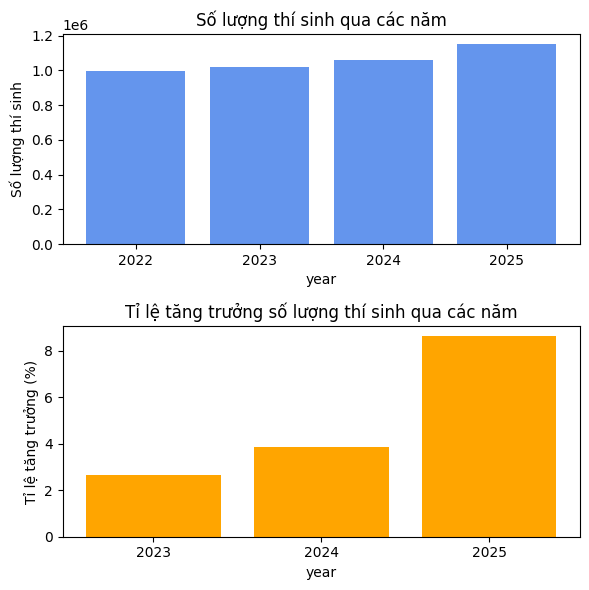

In [26]:
data = df_data_map

# Tính toán số lượng thí sinh mỗi năm
student_per_year = data['year'].value_counts().sort_index()

# Tính tỉ lệ tăng trưởng
growth_rate = student_per_year.pct_change() * 100

# Tạo DataFrame để hiện thị kết quả
students_growth_df = pd.DataFrame({
    'Số lượng thí sinh': student_per_year,
    'Tỉ lệ tăng trưởng (%)': growth_rate
}).reset_index().rename(columns={'index': 'year'})

# Vẽ biểu đồ
fig, ax = plt.subplots(2, 1, figsize = (6,6))

# Vẽ số lượng thí sinh
ax[0].bar(students_growth_df['year'], students_growth_df['Số lượng thí sinh'], color = 'cornflowerblue')
ax[0].set_xlabel('year')
ax[0].set_ylabel('Số lượng thí sinh')
ax[0].set_title('Số lượng thí sinh qua các năm')
ax[0].grid(False)

# Vẽ tỉ lệ tăng trưởng
ax[1].bar(students_growth_df['year'], students_growth_df['Tỉ lệ tăng trưởng (%)'], color = 'orange')
ax[1].set_xlabel('year')
ax[1].set_ylabel('Tỉ lệ tăng trưởng (%)')
ax[1].set_title('Tỉ lệ tăng trưởng số lượng thí sinh qua các năm')
ax[1].grid(False)

plt.tight_layout()
plt.show()

### **Score Distribution Over Year**

In [27]:
from scipy.interpolate import make_interp_spline

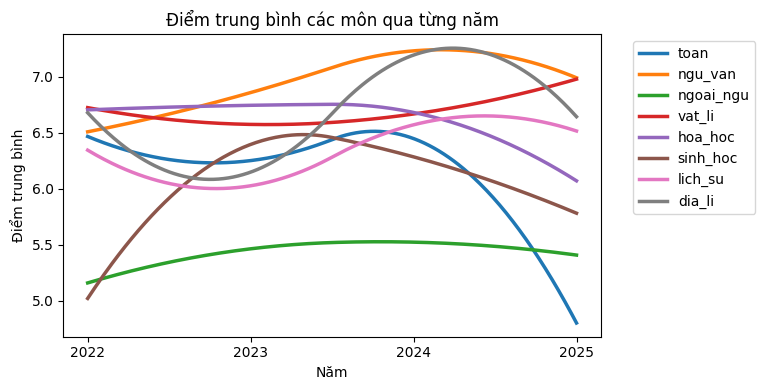

In [28]:
data = df_data_map

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

x_year = [2022, 2023, 2024, 2025]

# Định nghĩa các môn học và tiêu đề
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li']
titles = ['Toán', 'Ngữ văn', 'Ngoại ngữ', 'Lý', 'Hóa', 'Sinh', 'Sử', 'Địa']

# Tính toán điểm tb các môn qua từng năm
mean_scores_by_year = data.groupby(['year'])[subjects].mean().reset_index()

# Vẽ biểu đồ đường cho từng môn với các đường kẻ mềm mại hơn
plt.figure(figsize=(8, 4))

for subject in subjects:
    x = mean_scores_by_year['year']
    y = mean_scores_by_year[subject]

    # Tạo các điểm x mới để làm mịn đường
    x_new = np.linspace(x.min(), x.max(), 300)

    # Tạo spline để làm mịn đường
    spl = make_interp_spline(x, y, k=2)
    y_smooth = spl(x_new)

    # Vẽ đường cho môn học hiện tại
    plt.plot(x_new, y_smooth, label = subject, lw = 2.5, alpha = 1)

plt.title("Điểm trung bình các môn qua từng năm")
plt.xlabel("Năm")
plt.ylabel("Điểm trung bình")
plt.xticks(x_year)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(False)
plt.tight_layout()
plt.show()

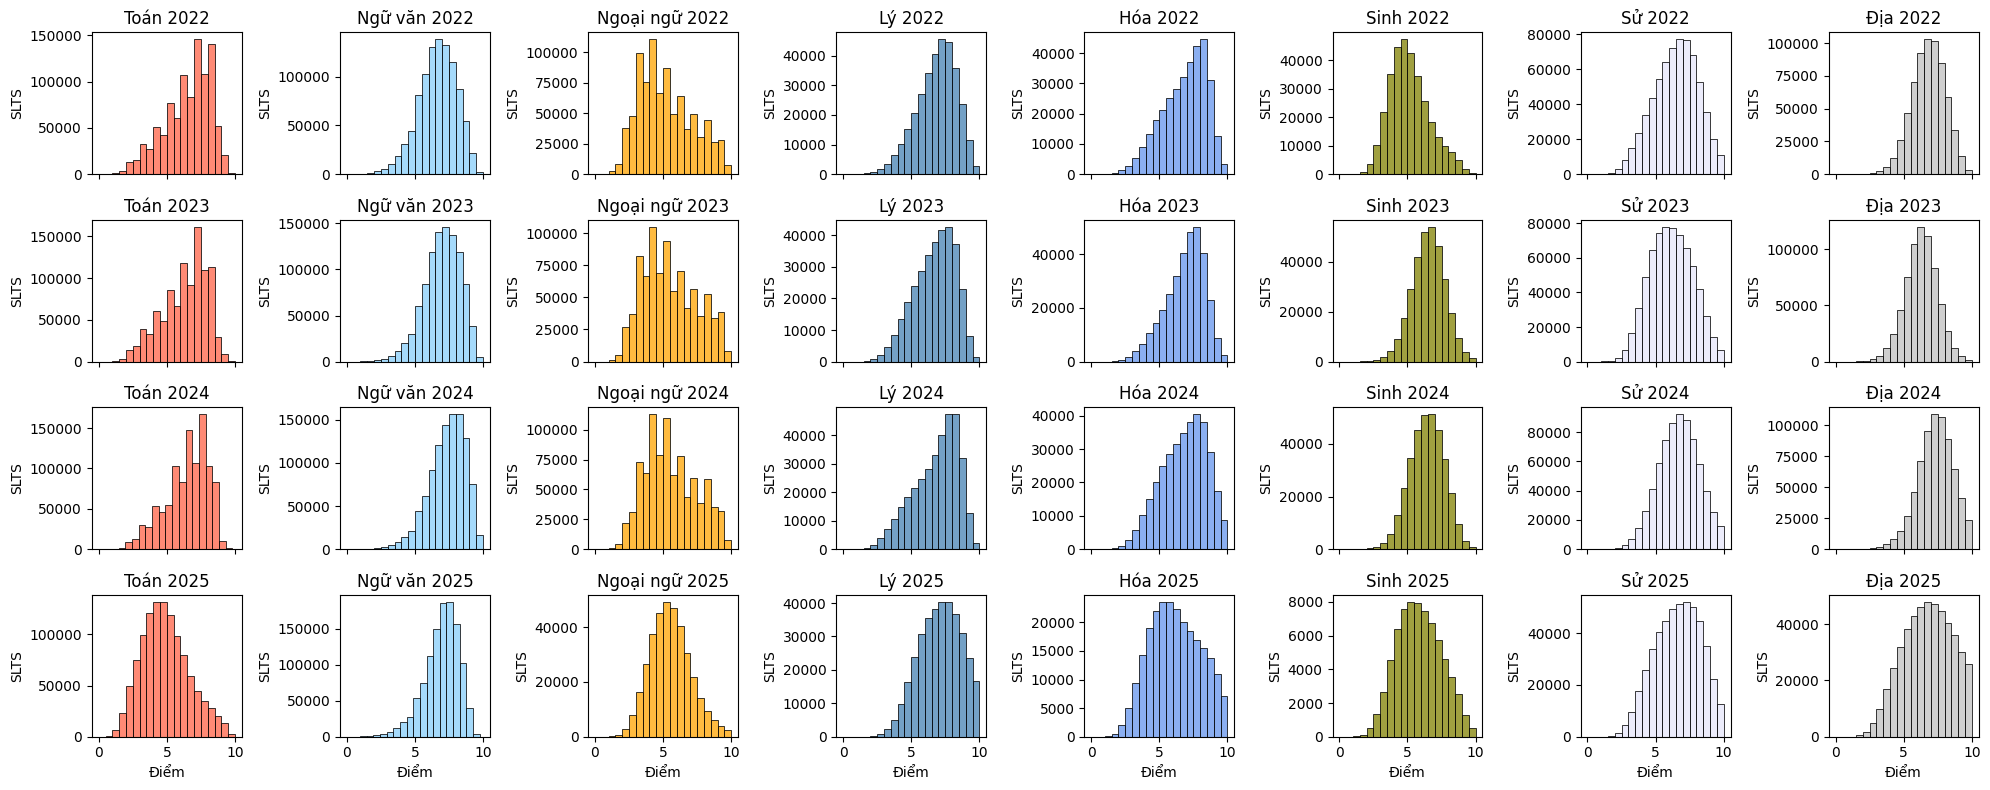

In [29]:
data = df_data_map

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]

# Tạo histogram cho điểm 'toan','ngu_van','ngoai_ngu' cho 5 năm gần đây
fig, axes = plt.subplots(4, 8, figsize=(20,8), sharex=True)

# Định nghĩa các môn học và tiêu đề
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li']
titles = ['Toán', 'Ngữ văn', 'Ngoại ngữ', 'Lý', 'Hóa', 'Sinh', 'Sử', 'Địa']
colors = ['tomato', 'lightskyblue', 'orange', 'steelblue', 'cornflowerblue', 'olive', 'lavender', 'silver']

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và từng môn học
for i, year in enumerate(recent_years_sorted):
  for j, (subject, color) in enumerate(zip(subjects, colors)):
    sns.histplot(recent_years[recent_years['year'] == year][subject], bins=20, kde=False, ax=axes[i,j], edgecolor='black', color=color)
    axes[i,j].set_title(f'{titles[j]} {year}')
    axes[i,j].set_xlabel('Điểm')
    axes[i,j].set_ylabel('SLTS')

plt.tight_layout()
plt.show()

### **Subject**

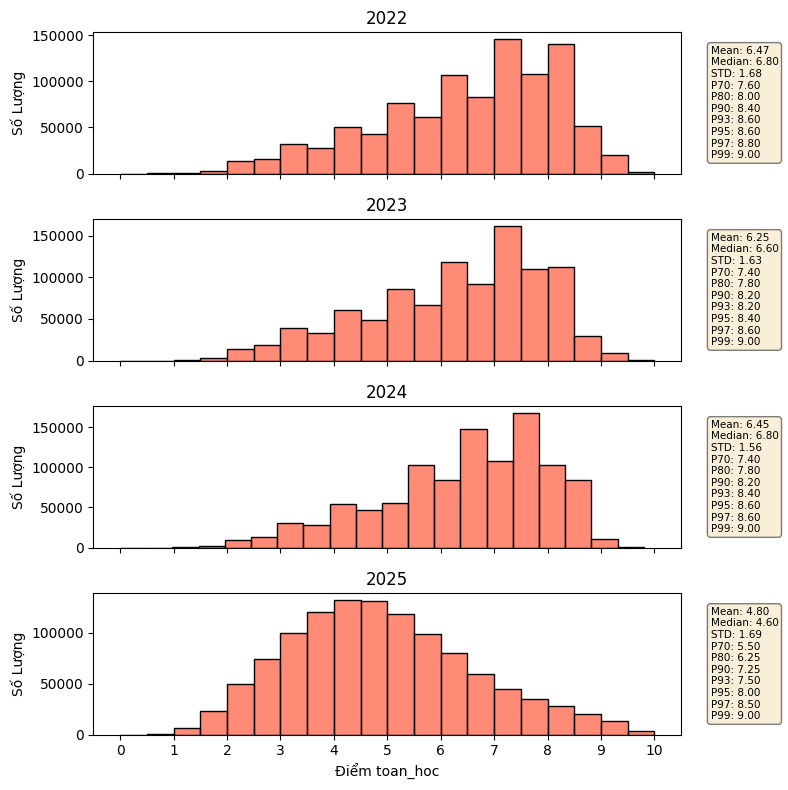

In [30]:
data = df_data_map

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

sub = 'toan_hoc'

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]

score = list(range(0,11,1))

# Tạo histogram cho điểm 'toan' cho 5 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(4, 1, figsize=(8,8), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year]['toan'], bins=20, kde=False, ax=axes[i], edgecolor='black', color='tomato')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Điểm {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year]['toan']
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

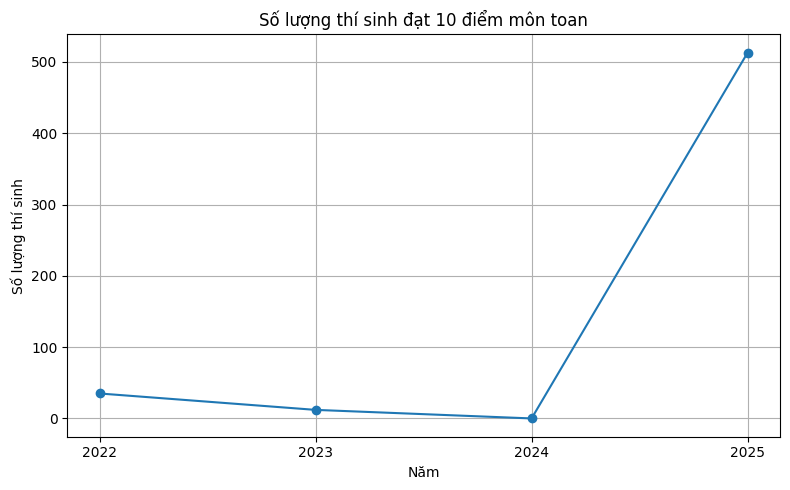

In [31]:
# Thống kê số lượng điểm 10 qua từng năm
data = df_data_map.copy()
data['year'] = pd.to_numeric(data['year'])

# Lọc môn toán và chỉ lấy 4 năm gần đây
sub = 'toan'
recent_years = sorted(data['year'].unique())[-4:]

# Lập bảng thống kê số lượng điểm 10 theo từng năm
max_score_stats = []
for year in recent_years:
    count = data[(data['year'] == year) & (data[sub] == 10)].shape[0]
    max_score_stats.append({'year': year, 'count_10': count})

df_max_scores = pd.DataFrame(max_score_stats)

plt.figure(figsize=(8,5))
plt.plot(df_max_scores['year'].astype(str), df_max_scores['count_10'], marker='o', linestyle='-')
plt.title(f'Số lượng thí sinh đạt 10 điểm môn {sub}')
plt.xlabel('Năm')
plt.ylabel('Số lượng thí sinh')
plt.grid(True)
plt.tight_layout()
plt.show()

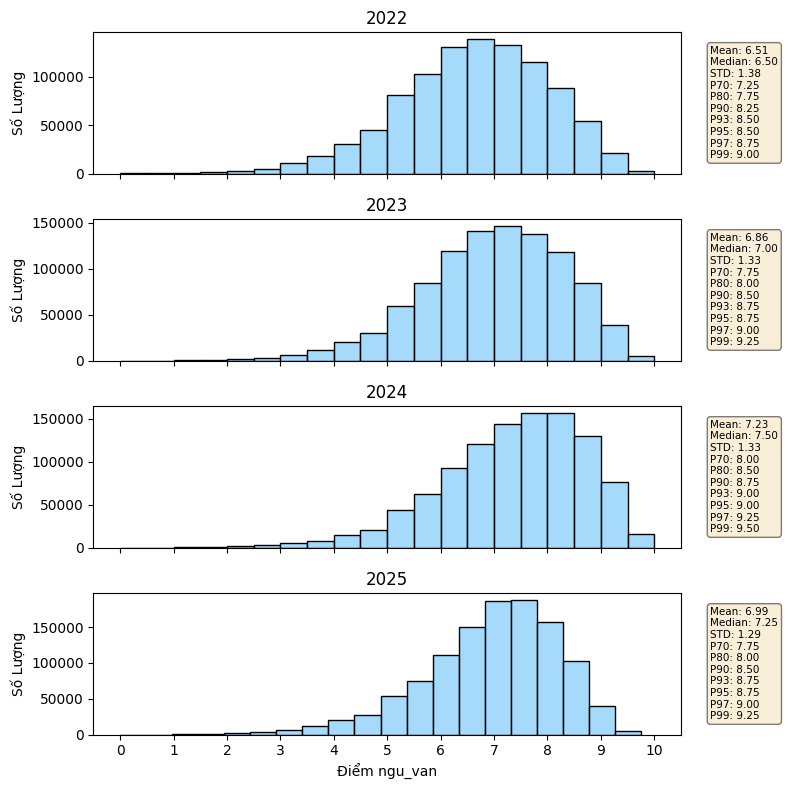

In [32]:
data = df_data_map

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

sub = 'ngu_van'

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]

score = list(range(0,11,1))

# Tạo histogram cho điểm 'ngu_van' cho 5 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(4, 1, figsize=(8,8), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='lightskyblue')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Điểm {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

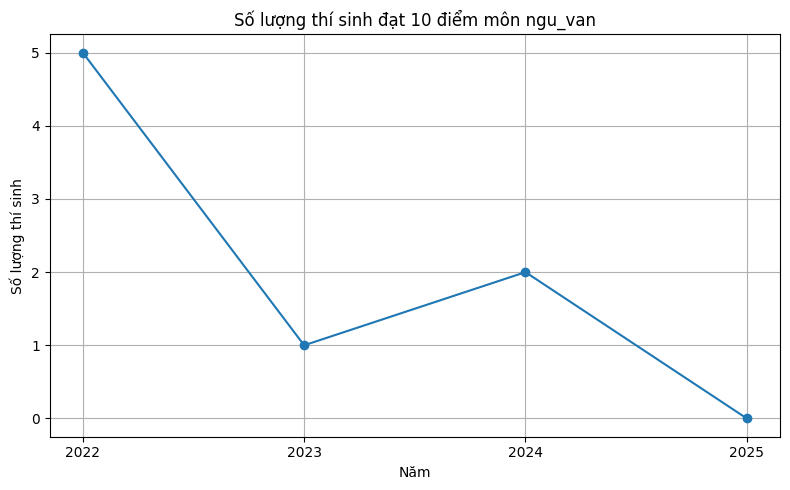

In [33]:
# Thống kê số lượng điểm 10 qua từng năm
data = df_data_map.copy()
data['year'] = pd.to_numeric(data['year'])

# Lọc môn toán và chỉ lấy 4 năm gần đây
sub = 'ngu_van'
recent_years = sorted(data['year'].unique())[-4:]

# Lập bảng thống kê số lượng điểm 10 theo từng năm
max_score_stats = []
for year in recent_years:
    count = data[(data['year'] == year) & (data[sub] == 10)].shape[0]
    max_score_stats.append({'year': year, 'count_10': count})

df_max_scores = pd.DataFrame(max_score_stats)

plt.figure(figsize=(8,5))
plt.plot(df_max_scores['year'].astype(str), df_max_scores['count_10'], marker='o', linestyle='-')
plt.title(f'Số lượng thí sinh đạt 10 điểm môn {sub}')
plt.xlabel('Năm')
plt.ylabel('Số lượng thí sinh')
plt.grid(True)
plt.tight_layout()
plt.show()

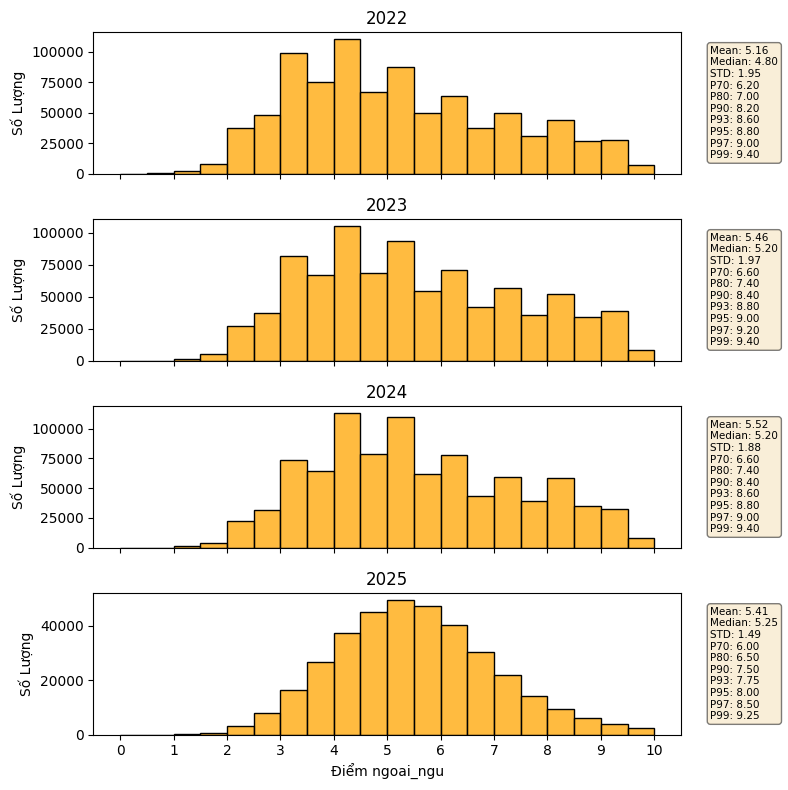

In [34]:
data = df_data_map

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

sub = 'ngoai_ngu'

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]

score = list(range(0,11,1))

# Tạo histogram cho điểm f{sub} cho 5 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(4, 1, figsize=(8,8), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='orange')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Điểm {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

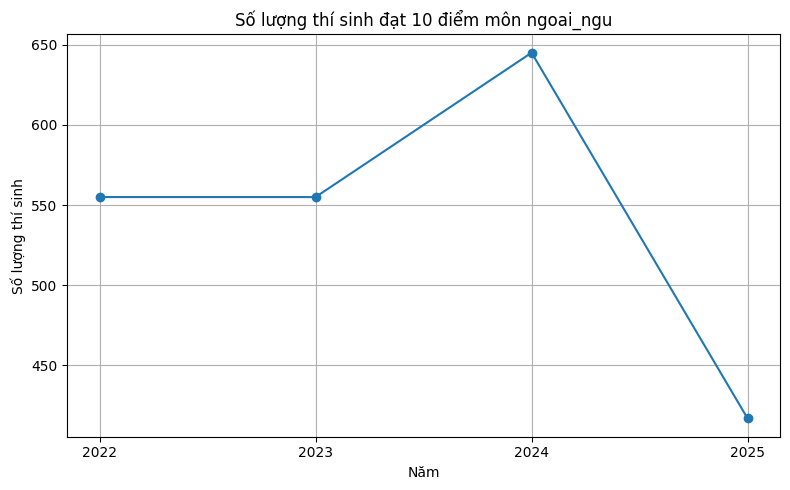

In [35]:
# Thống kê số lượng điểm 10 qua từng năm
data = df_data_map.copy()
data['year'] = pd.to_numeric(data['year'])

# Lọc môn toán và chỉ lấy 4 năm gần đây
sub = 'ngoai_ngu'
recent_years = sorted(data['year'].unique())[-4:]

# Lập bảng thống kê số lượng điểm 10 theo từng năm
max_score_stats = []
for year in recent_years:
    count = data[(data['year'] == year) & (data[sub] == 10)].shape[0]
    max_score_stats.append({'year': year, 'count_10': count})

df_max_scores = pd.DataFrame(max_score_stats)

plt.figure(figsize=(8,5))
plt.plot(df_max_scores['year'].astype(str), df_max_scores['count_10'], marker='o', linestyle='-')
plt.title(f'Số lượng thí sinh đạt 10 điểm môn {sub}')
plt.xlabel('Năm')
plt.ylabel('Số lượng thí sinh')
plt.grid(True)
plt.tight_layout()
plt.show()

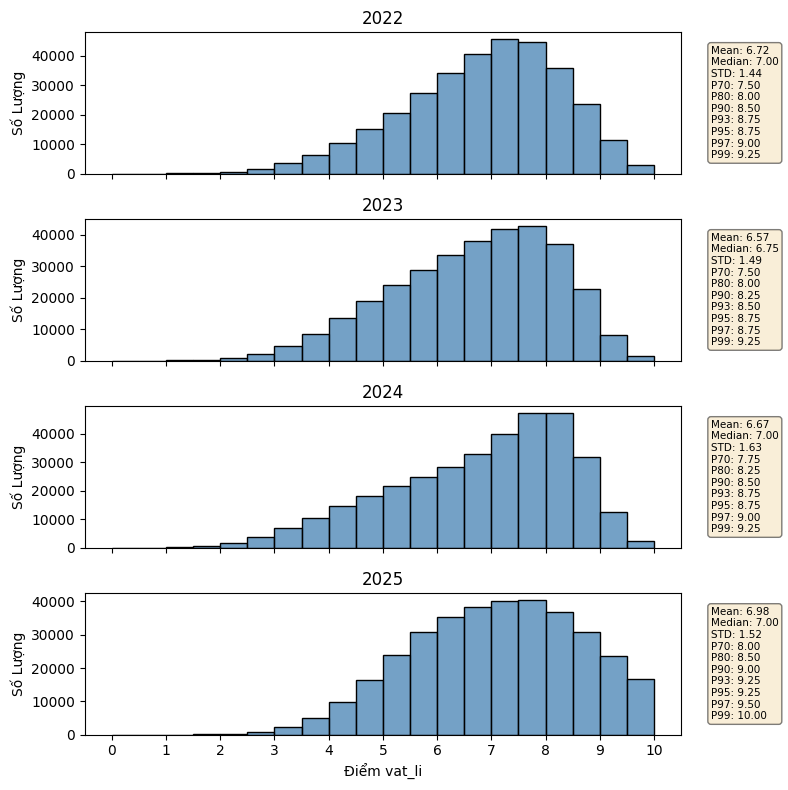

In [36]:
data = df_data_map

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

sub = 'vat_li'

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]

score = list(range(0,11,1))

# Tạo histogram cho điểm 'ngu_van' cho 5 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(4, 1, figsize=(8,8), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='steelblue')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Điểm {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

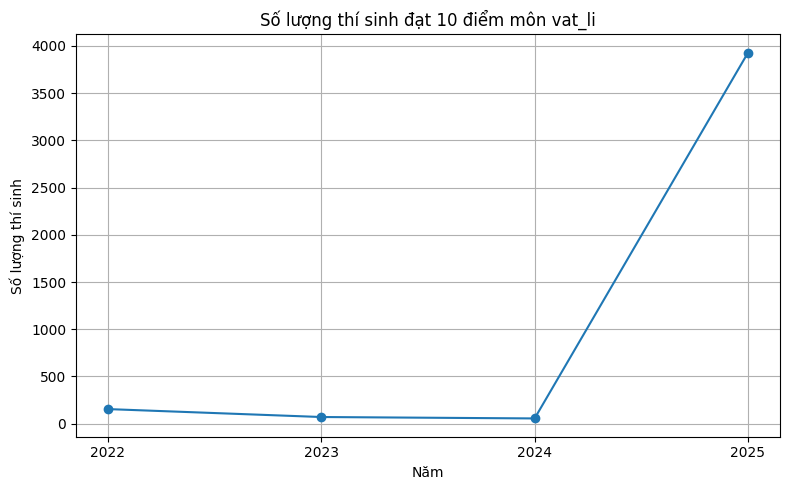

In [37]:
# Thống kê số lượng điểm 10 qua từng năm
data = df_data_map.copy()
data['year'] = pd.to_numeric(data['year'])

# Lọc môn toán và chỉ lấy 4 năm gần đây
sub = 'vat_li'
recent_years = sorted(data['year'].unique())[-4:]

# Lập bảng thống kê số lượng điểm 10 theo từng năm
max_score_stats = []
for year in recent_years:
    count = data[(data['year'] == year) & (data[sub] == 10)].shape[0]
    max_score_stats.append({'year': year, 'count_10': count})

df_max_scores = pd.DataFrame(max_score_stats)

plt.figure(figsize=(8,5))
plt.plot(df_max_scores['year'].astype(str), df_max_scores['count_10'], marker='o', linestyle='-')
plt.title(f'Số lượng thí sinh đạt 10 điểm môn {sub}')
plt.xlabel('Năm')
plt.ylabel('Số lượng thí sinh')
plt.grid(True)
plt.tight_layout()
plt.show()

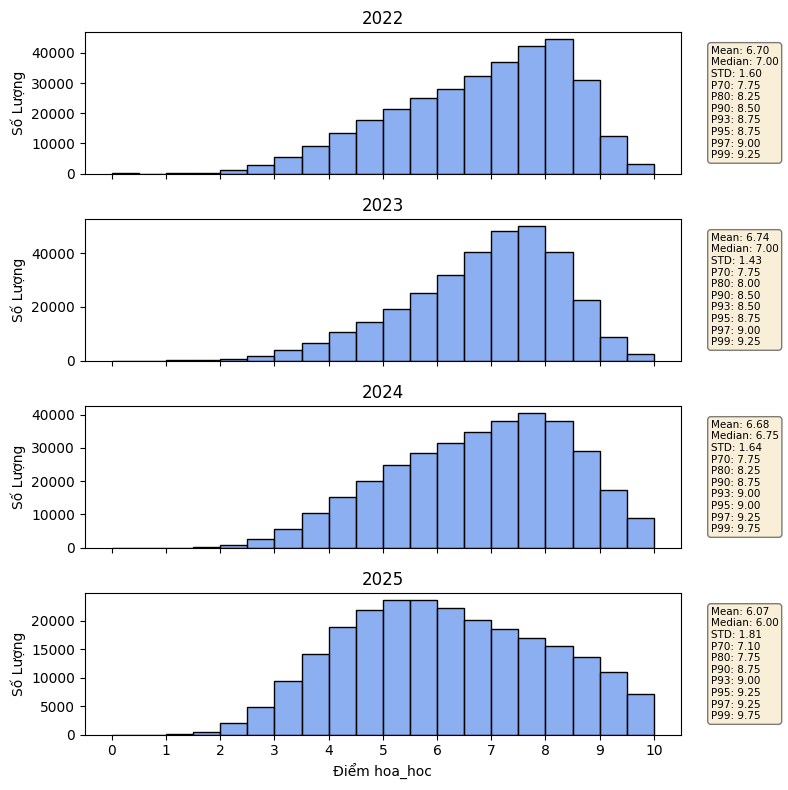

In [38]:
data = df_data_map

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

sub = 'hoa_hoc'

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]

score = list(range(0,11,1))

# Tạo histogram cho điểm 'ngu_van' cho 5 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(4, 1, figsize=(8,8), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='cornflowerblue')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Điểm {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

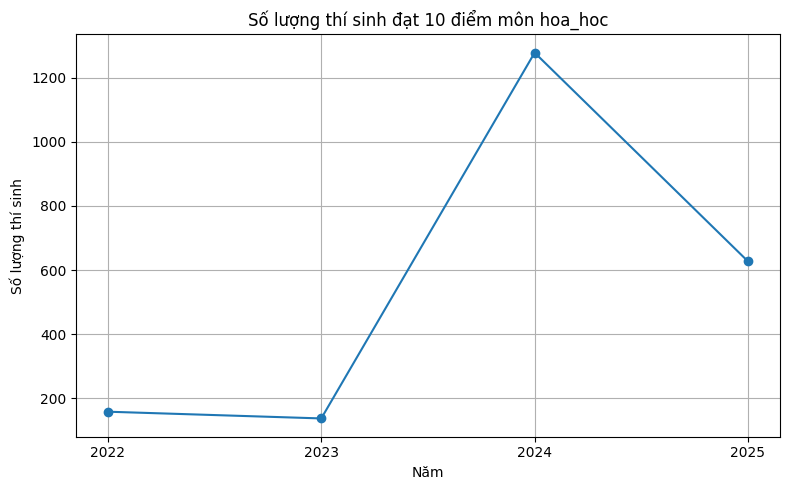

In [39]:
# Thống kê số lượng điểm 10 qua từng năm
data = df_data_map.copy()
data['year'] = pd.to_numeric(data['year'])

# Lọc môn toán và chỉ lấy 4 năm gần đây
sub = 'hoa_hoc'
recent_years = sorted(data['year'].unique())[-4:]

# Lập bảng thống kê số lượng điểm 10 theo từng năm
max_score_stats = []
for year in recent_years:
    count = data[(data['year'] == year) & (data[sub] == 10)].shape[0]
    max_score_stats.append({'year': year, 'count_10': count})

df_max_scores = pd.DataFrame(max_score_stats)

plt.figure(figsize=(8,5))
plt.plot(df_max_scores['year'].astype(str), df_max_scores['count_10'], marker='o', linestyle='-')
plt.title(f'Số lượng thí sinh đạt 10 điểm môn {sub}')
plt.xlabel('Năm')
plt.ylabel('Số lượng thí sinh')
plt.grid(True)
plt.tight_layout()
plt.show()

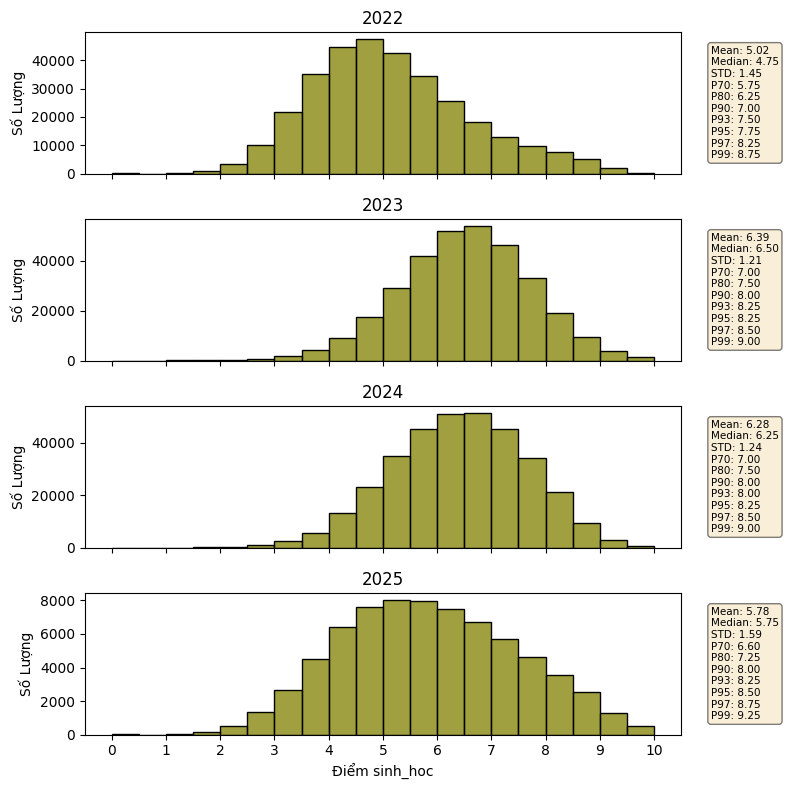

In [40]:
data = df_data_map

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

sub = 'sinh_hoc'

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]

score = list(range(0,11,1))

# Tạo histogram cho điểm 'ngu_van' cho 5 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(4, 1, figsize=(8,8), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='olive')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Điểm {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

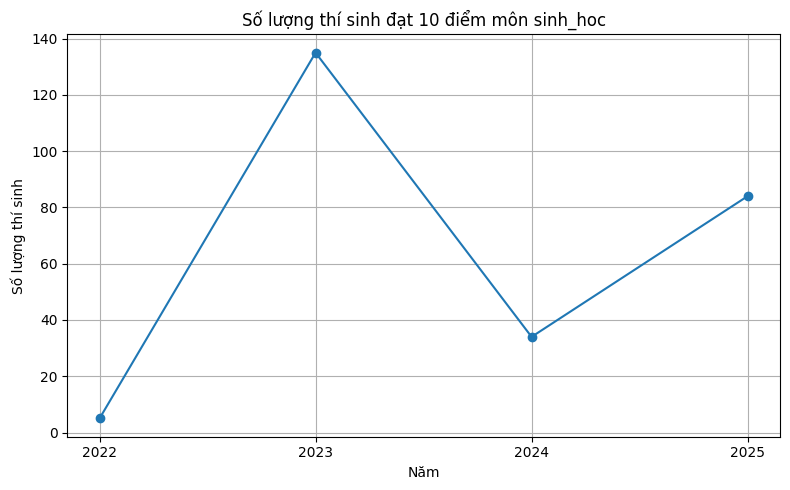

In [41]:
# Thống kê số lượng điểm 10 qua từng năm
data = df_data_map.copy()
data['year'] = pd.to_numeric(data['year'])

# Lọc môn toán và chỉ lấy 4 năm gần đây
sub = 'sinh_hoc'
recent_years = sorted(data['year'].unique())[-4:]

# Lập bảng thống kê số lượng điểm 10 theo từng năm
max_score_stats = []
for year in recent_years:
    count = data[(data['year'] == year) & (data[sub] == 10)].shape[0]
    max_score_stats.append({'year': year, 'count_10': count})

df_max_scores = pd.DataFrame(max_score_stats)

plt.figure(figsize=(8,5))
plt.plot(df_max_scores['year'].astype(str), df_max_scores['count_10'], marker='o', linestyle='-')
plt.title(f'Số lượng thí sinh đạt 10 điểm môn {sub}')
plt.xlabel('Năm')
plt.ylabel('Số lượng thí sinh')
plt.grid(True)
plt.tight_layout()
plt.show()

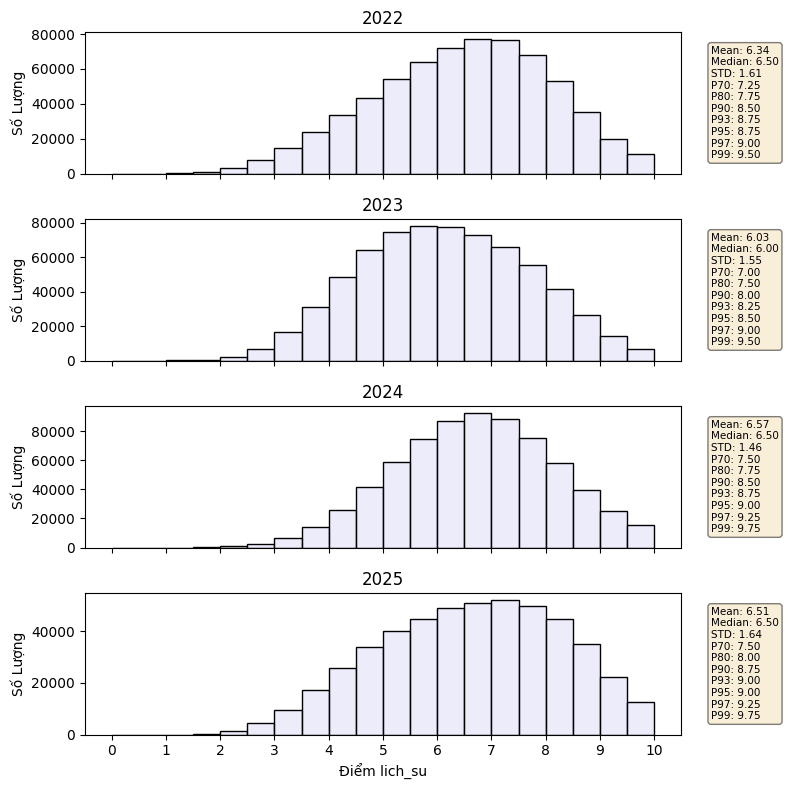

In [42]:
data = df_data_map

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

sub = 'lich_su'

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]

score = list(range(0,11,1))

# Tạo histogram cho điểm 'ngu_van' cho 5 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(4, 1, figsize=(8,8), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='lavender')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Điểm {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

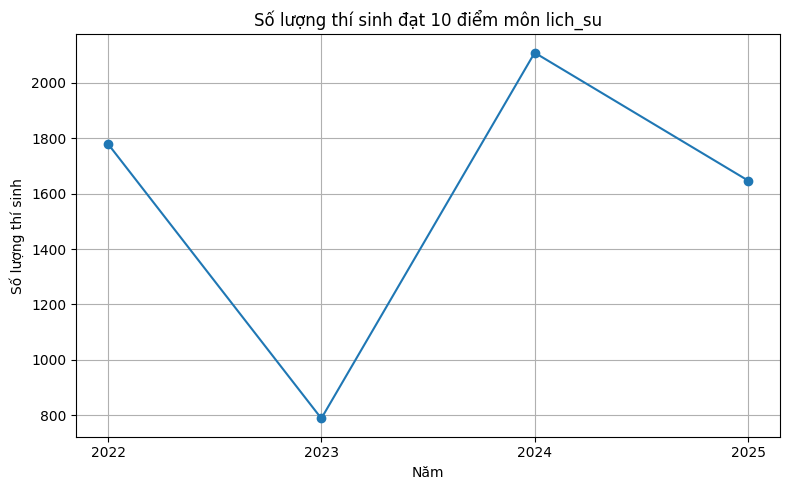

In [43]:
# Thống kê số lượng điểm 10 qua từng năm
data = df_data_map.copy()
data['year'] = pd.to_numeric(data['year'])

# Lọc môn toán và chỉ lấy 4 năm gần đây
sub = 'lich_su'
recent_years = sorted(data['year'].unique())[-4:]

# Lập bảng thống kê số lượng điểm 10 theo từng năm
max_score_stats = []
for year in recent_years:
    count = data[(data['year'] == year) & (data[sub] == 10)].shape[0]
    max_score_stats.append({'year': year, 'count_10': count})

df_max_scores = pd.DataFrame(max_score_stats)

plt.figure(figsize=(8,5))
plt.plot(df_max_scores['year'].astype(str), df_max_scores['count_10'], marker='o', linestyle='-')
plt.title(f'Số lượng thí sinh đạt 10 điểm môn {sub}')
plt.xlabel('Năm')
plt.ylabel('Số lượng thí sinh')
plt.grid(True)
plt.tight_layout()
plt.show()

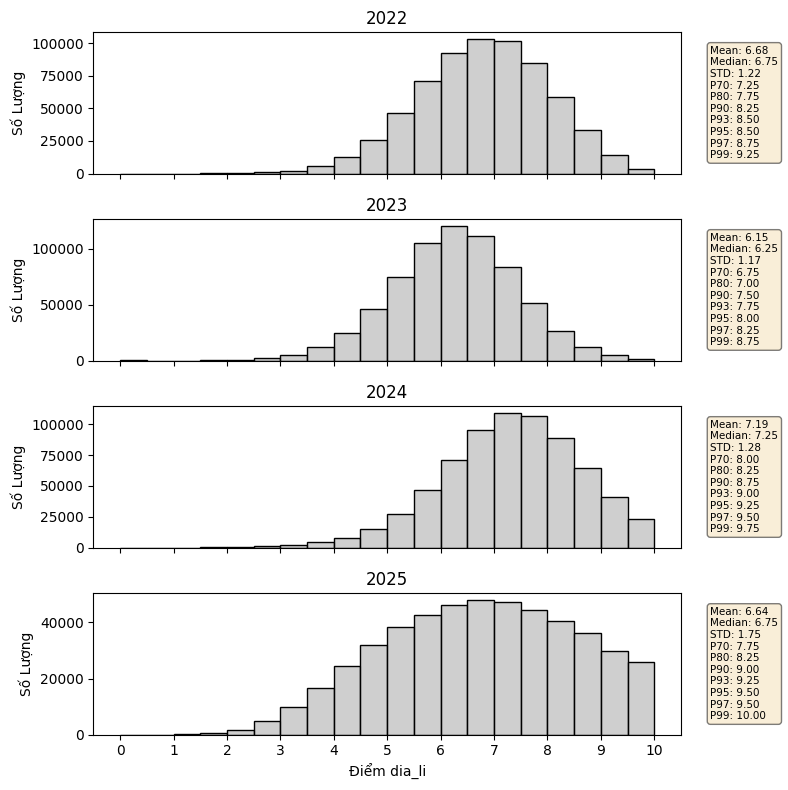

In [44]:
data = df_data_map

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

sub = 'dia_li'

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]

score = list(range(0,11,1))

# Tạo histogram cho điểm 'ngu_van' cho 5 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(4, 1, figsize=(8,8), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='silver')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Điểm {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

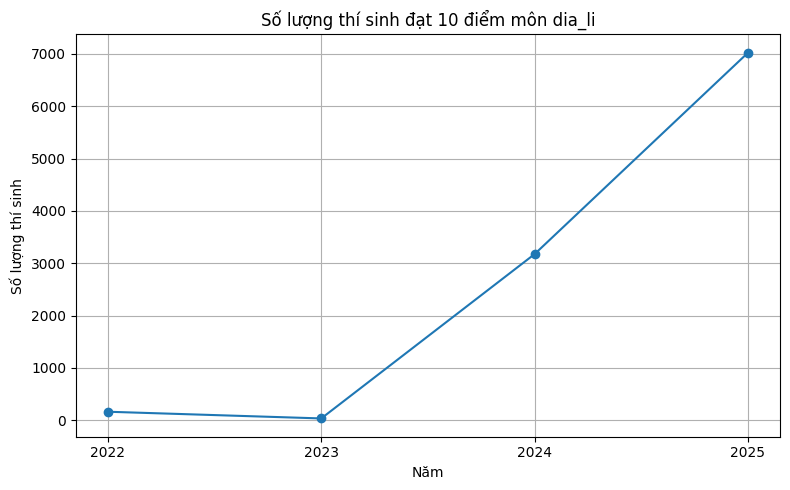

In [45]:
# Thống kê số lượng điểm 10 qua từng năm
data = df_data_map.copy()
data['year'] = pd.to_numeric(data['year'])

# Lọc môn toán và chỉ lấy 4 năm gần đây
sub = 'dia_li'
recent_years = sorted(data['year'].unique())[-4:]

# Lập bảng thống kê số lượng điểm 10 theo từng năm
max_score_stats = []
for year in recent_years:
    count = data[(data['year'] == year) & (data[sub] == 10)].shape[0]
    max_score_stats.append({'year': year, 'count_10': count})

df_max_scores = pd.DataFrame(max_score_stats)

plt.figure(figsize=(8,5))
plt.plot(df_max_scores['year'].astype(str), df_max_scores['count_10'], marker='o', linestyle='-')
plt.title(f'Số lượng thí sinh đạt 10 điểm môn {sub}')
plt.xlabel('Năm')
plt.ylabel('Số lượng thí sinh')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Compare with previous years

In [46]:
sampled_data = df_data_map.sample(frac=0.3, random_state=1)

In [47]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1269700 entries, 601453 to 3263676
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   sbd             1269700 non-null  int64  
 1   toan            1250635 non-null  float64
 2   ngu_van         1254960 non-null  float64
 3   ngoai_ngu       908165 non-null   float64
 4   vat_li          405145 non-null   float64
 5   hoa_hoc         374114 non-null   float64
 6   sinh_hoc        318106 non-null   float64
 7   lich_su         762915 non-null   float64
 8   dia_li          759754 non-null   float64
 9   gdcd            512354 non-null   float64
 10  gdkt_pl         74054 non-null    float64
 11  tin_hoc         2364 non-null     float64
 12  cn_cong_nghiep  672 non-null      float64
 13  cn_nong_nghiep  6681 non-null     float64
 14  year            1269700 non-null  int64  
 15  ma_ngoai_ngu    884577 non-null   object 
 16  province_code   1269700 non-null  ob

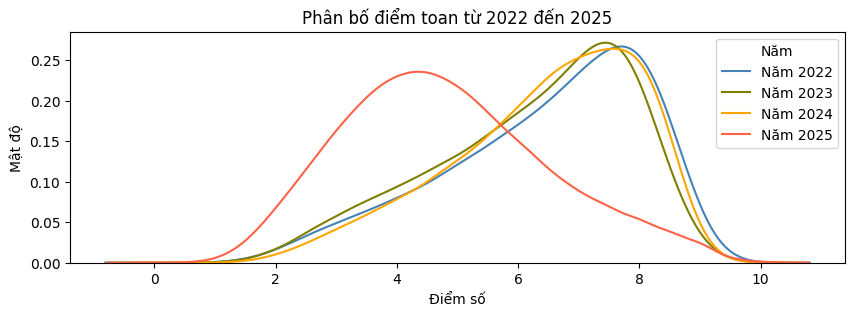

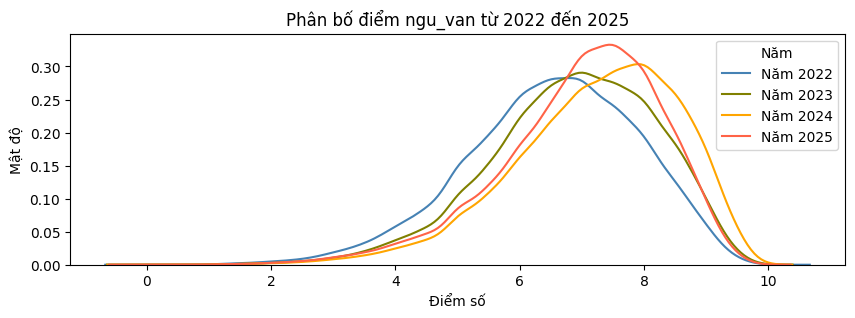

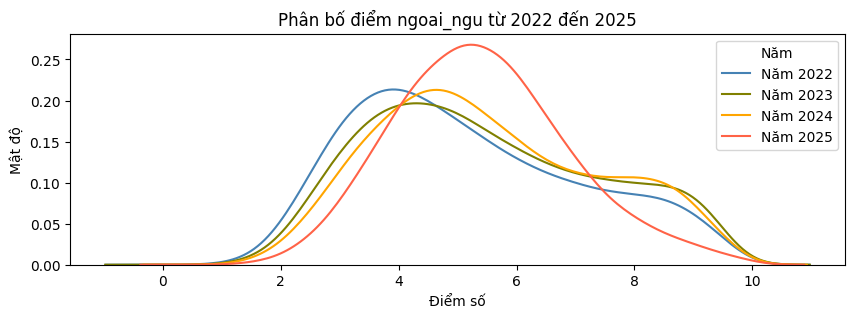

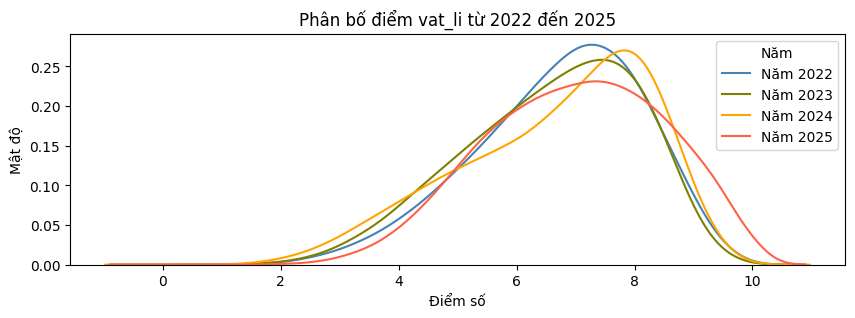

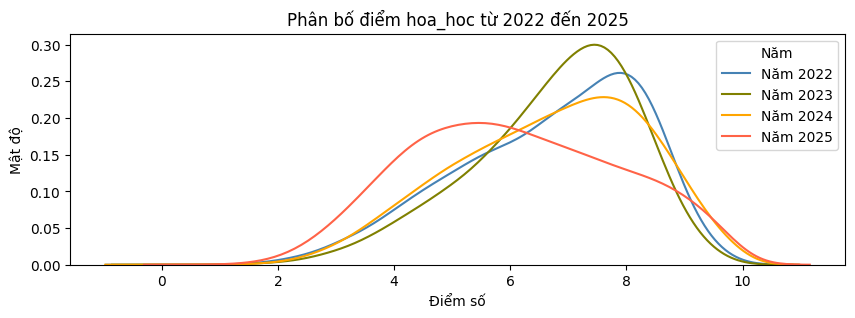

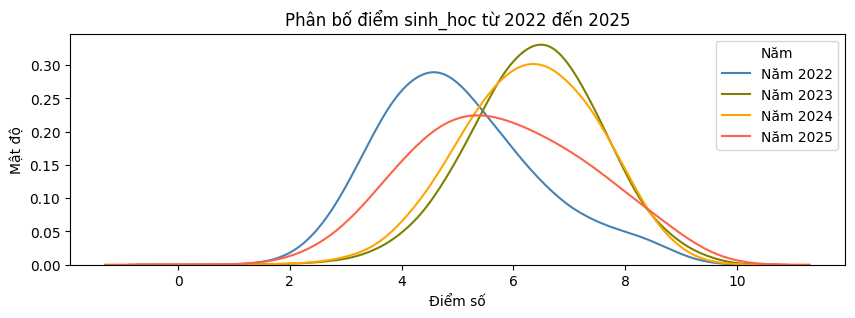

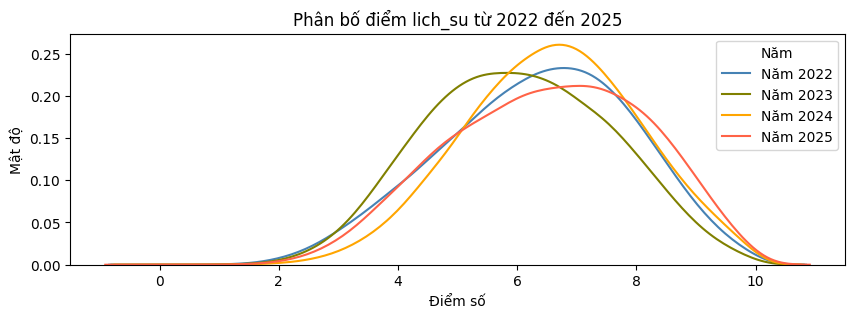

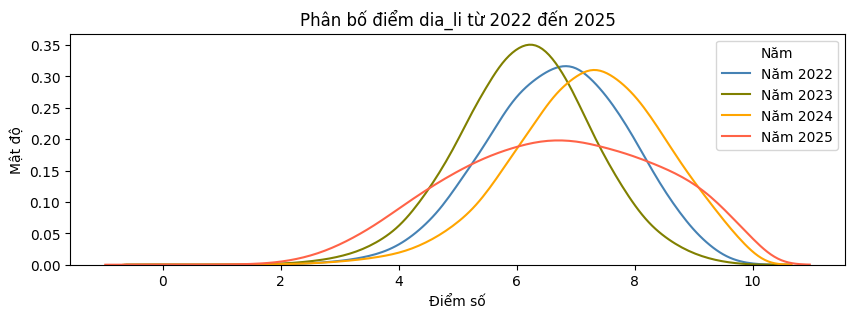

In [48]:
# Lọc dữ liệu từ 2021 đến 2024
df_filtered = sampled_data[sampled_data['year'].isin([2022, 2023, 2024, 2025])]

# Các môn học cần phân tích
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li']
colors = ['steelblue', 'olive', 'orange', 'tomato']

# Vẽ histogram cho từng môn học
for subject in subjects:
  plt.figure(figsize=(10, 3))
  for year, color in zip([2022, 2023, 2024, 2025], colors):
    data = df_filtered[df_filtered['year'] == year][subject].dropna()
    sns.kdeplot(data, label = f'Năm {year}', color=color, bw_adjust=2)
  plt.title(f'Phân bố điểm {subject} từ 2022 đến 2025')
  plt.xlabel('Điểm số')
  plt.ylabel('Mật độ')
  plt.legend(title='Năm')
  plt.grid(False)
  plt.show()

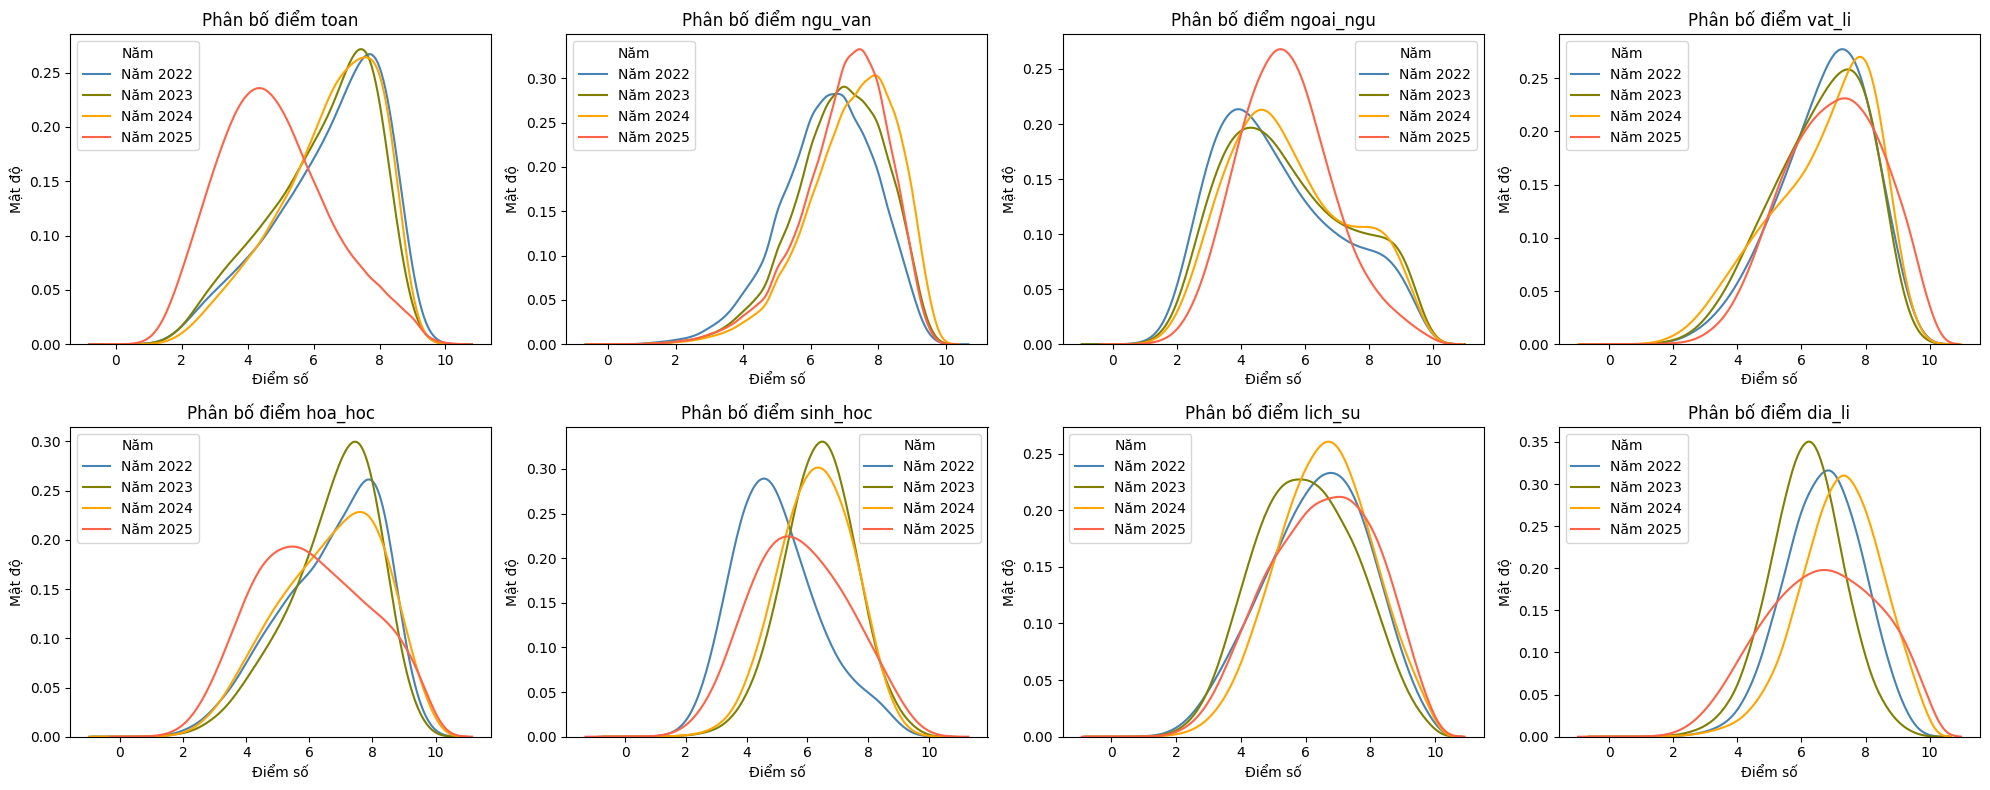

In [49]:
# Lọc dữ liệu từ 2021 đến 2024
df_filtered = sampled_data[sampled_data['year'].isin([2022, 2023, 2024, 2025])]

# Các môn học cần phân tích
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li']
colors = ['steelblue', 'olive', 'orange', 'tomato']

# Tạo figure và axes 2x4
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()  # chuyển thành 1D để dễ truy cập theo chỉ số

# Vẽ biểu đồ cho từng môn học
for i, subject in enumerate(subjects):
    ax = axes[i]
    for year, color in zip([2022, 2023, 2024, 2025], colors):
        data = df_filtered[df_filtered['year'] == year][subject].dropna()
        sns.kdeplot(data, ax=ax, label=f'Năm {year}', color=color, bw_adjust=2)

    ax.set_title(f'Phân bố điểm {subject}')
    ax.set_xlabel('Điểm số')
    ax.set_ylabel('Mật độ')
    ax.legend(title='Năm')
    ax.grid(False)

# Căn chỉnh layout
plt.tight_layout()
plt.show()

## **3.2 Group Distribution**

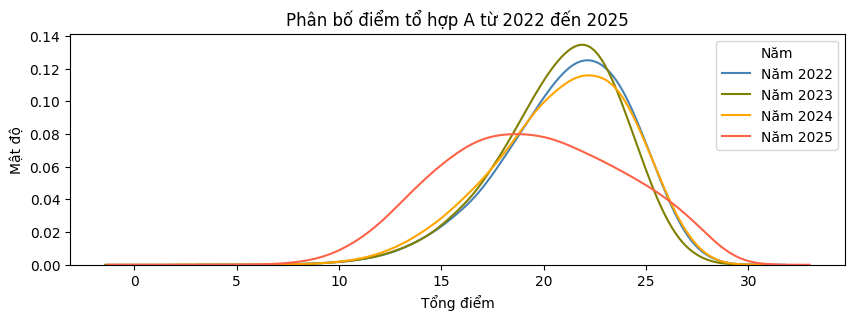

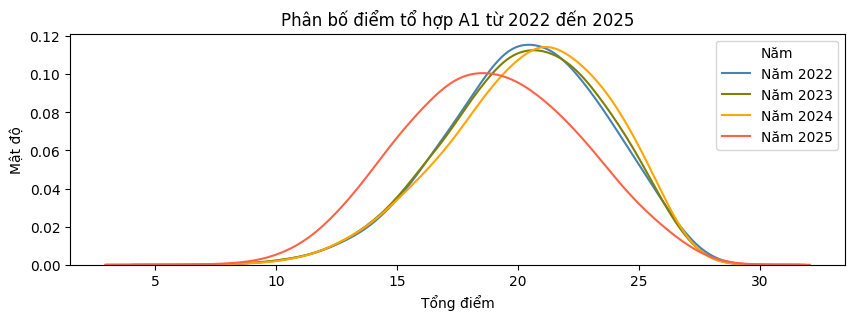

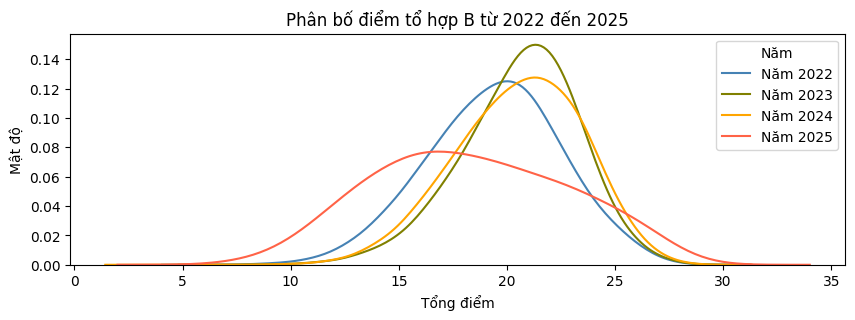

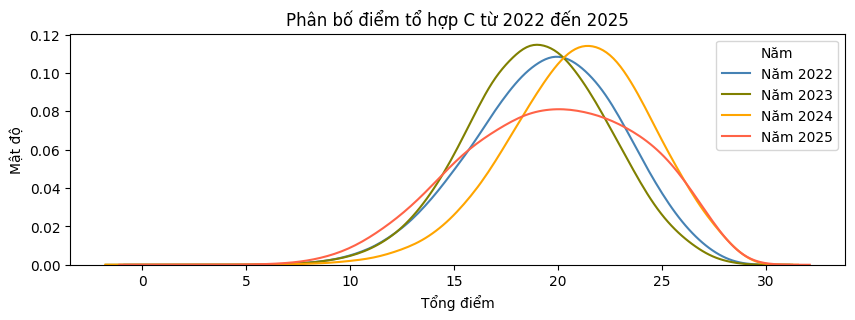

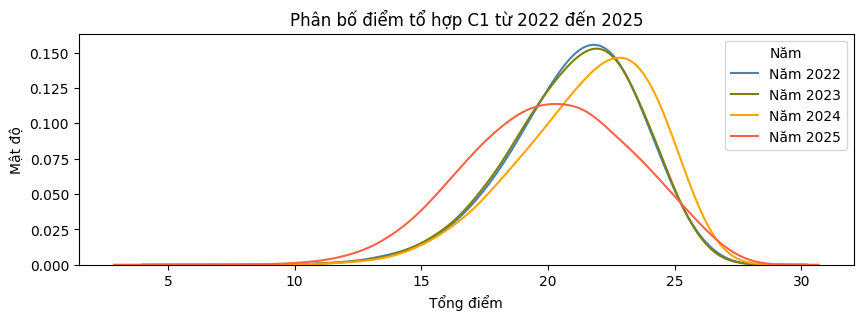

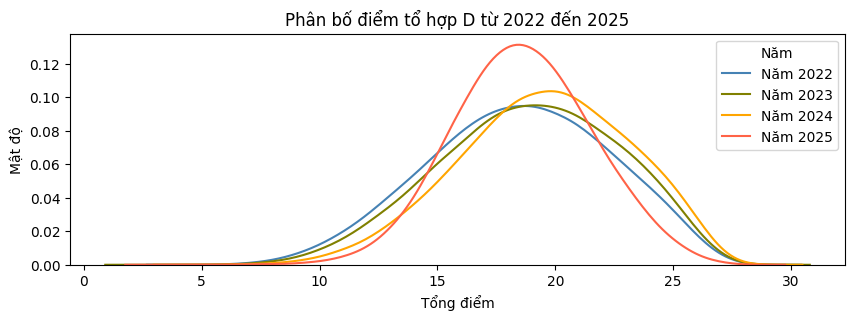

In [50]:
# Tạo các cột tổng điểm cho từng tổ hợp môn
df_filtered['A'] = df_filtered['toan'] + df_filtered['vat_li'] + df_filtered['hoa_hoc']
df_filtered['A1'] = df_filtered['toan'] + df_filtered['vat_li'] + df_filtered['ngoai_ngu']
df_filtered['B'] = df_filtered['toan'] + df_filtered['hoa_hoc'] + df_filtered['sinh_hoc']
df_filtered['C'] = df_filtered['ngu_van'] + df_filtered['lich_su'] + df_filtered['dia_li']
df_filtered['C1'] = df_filtered['ngu_van'] + df_filtered['toan'] + df_filtered['vat_li']
df_filtered['D'] = df_filtered['toan'] + df_filtered['ngoai_ngu'] + df_filtered['ngu_van']

# Các tổ hợp môn cần phân tích
combinations = ['A', 'A1', 'B', 'C', 'C1', 'D']

# Thiết lập các cài đặt cho biểu đồ
colors = ['steelblue', 'olive', 'orange', 'tomato']

# Vẽ histogram cho từng tổ hợp môn
for i, combo in enumerate(combinations):
  plt.figure(figsize=(10, 3))
  for year, color in zip([2022, 2023, 2024, 2025],colors):
    data = df_filtered[df_filtered['year'] == year][combo].dropna()
    sns.kdeplot(data, label = f'Năm {year}', color=color, bw_adjust=2)
  plt.title(f'Phân bố điểm tổ hợp {combo} từ 2022 đến 2025')
  plt.xlabel('Tổng điểm')
  plt.ylabel('Mật độ')
  plt.legend(title='Năm')
  plt.grid(False)
  plt.show()

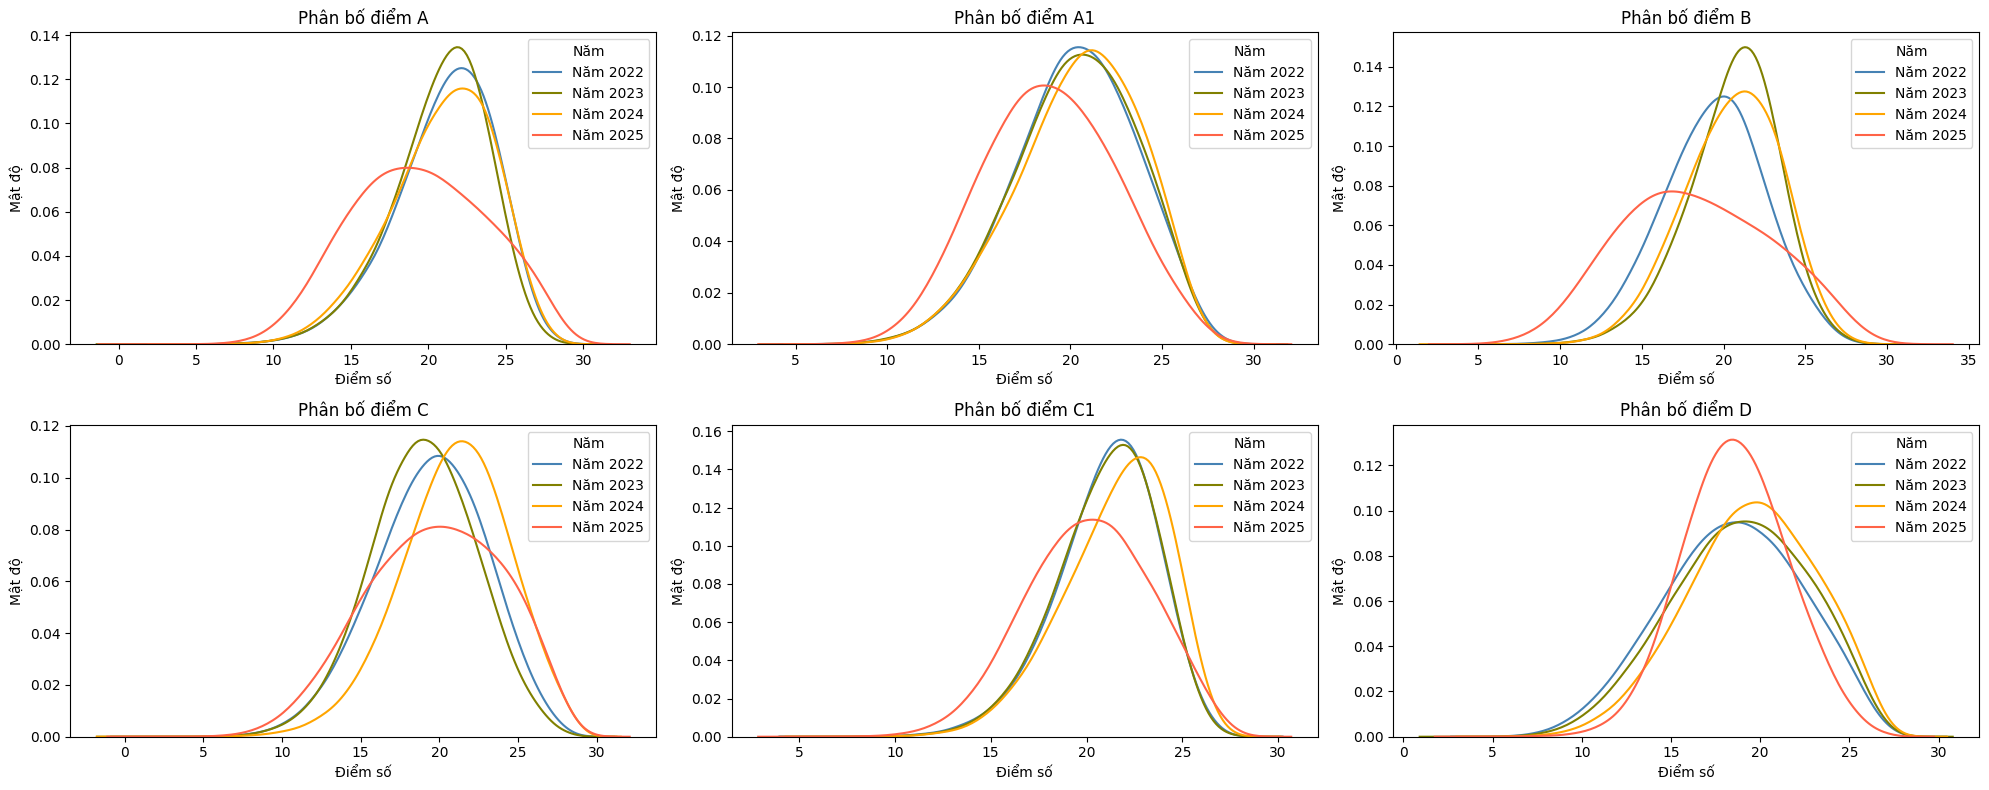

In [51]:
# Các tổ hợp môn cần phân tích
combinations = ['A', 'A1', 'B', 'C', 'C1', 'D']

# Thiết lập các cài đặt cho biểu đồ
colors = ['steelblue', 'olive', 'orange', 'tomato']

# Tạo figure và axes 2x4
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes = axes.flatten()  # chuyển thành 1D để dễ truy cập theo chỉ số

# Vẽ biểu đồ cho từng môn học
for i, combo in enumerate(combinations):
    ax = axes[i]
    for year, color in zip([2022, 2023, 2024, 2025], colors):
        data = df_filtered[df_filtered['year'] == year][combo].dropna()
        sns.kdeplot(data, ax=ax, label=f'Năm {year}', color=color, bw_adjust=2)

    ax.set_title(f'Phân bố điểm {combo}')
    ax.set_xlabel('Điểm số')
    ax.set_ylabel('Mật độ')
    ax.legend(title='Năm')
    ax.grid(False)

# Căn chỉnh layout
plt.tight_layout()
plt.show()

### **Group A**

In [52]:
# Tạo các cột tổng điểm cho từng tổ hợp môn
df_data_map['A'] = df_data_map['toan'] + df_data_map['vat_li'] + df_data_map['hoa_hoc']
df_data_map['A1'] = df_data_map['toan'] + df_data_map['vat_li'] + df_data_map['ngoai_ngu']
df_data_map['B'] = df_data_map['toan'] + df_data_map['hoa_hoc'] + df_data_map['sinh_hoc']
df_data_map['C'] = df_data_map['ngu_van'] + df_data_map['lich_su'] + df_data_map['dia_li']
df_data_map['C1'] = df_data_map['ngu_van'] + df_data_map['toan'] + df_data_map['vat_li']
df_data_map['D'] = df_data_map['toan'] + df_data_map['ngoai_ngu'] + df_data_map['ngu_van']

In [53]:
df_data_map.columns

Index(['sbd', 'toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc',
       'lich_su', 'dia_li', 'gdcd', 'gdkt_pl', 'tin_hoc', 'cn_cong_nghiep',
       'cn_nong_nghiep', 'year', 'ma_ngoai_ngu', 'province_code', 'code',
       'province', 'A', 'A1', 'B', 'C', 'C1', 'D'],
      dtype='object')

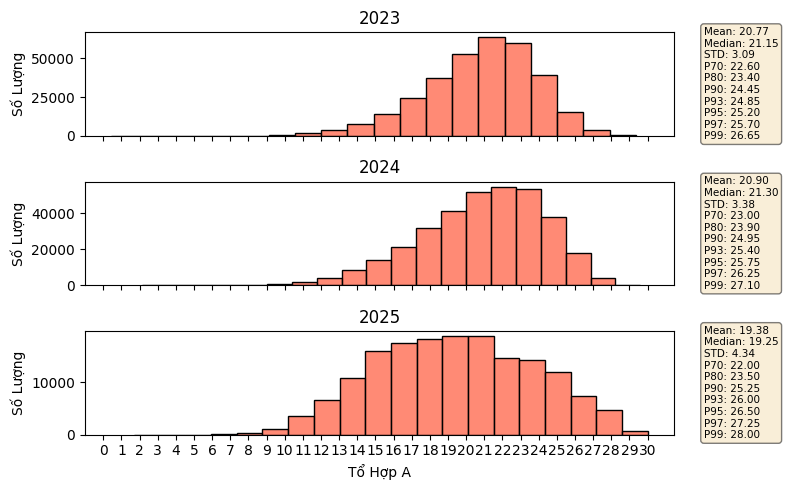

In [54]:
data = df_data_map

sub = 'A'

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin([2023, 2024, 2025])]

score = list(range(0,31,1))

# Tạo histogram cho to hop 'f{sub}' cho 3 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(3, 1, figsize=(8,5), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='tomato')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Tổ Hợp {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

/tmp/ipython-input-55-1395450675.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['bins'] = pd.cut(df_2023[combo], bins)
/tmp/ipython-input-55-1395450675.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['bins'] = pd.cut(df_2024[combo], bins)


Sự chênh lệch trung bình số thí sinh: -6441.578947368422
Khoảng tin cậy 95% cho sự chênh lệch trung bình: (np.float64(-10405.517573561205), np.float64(-2477.6403211756387))


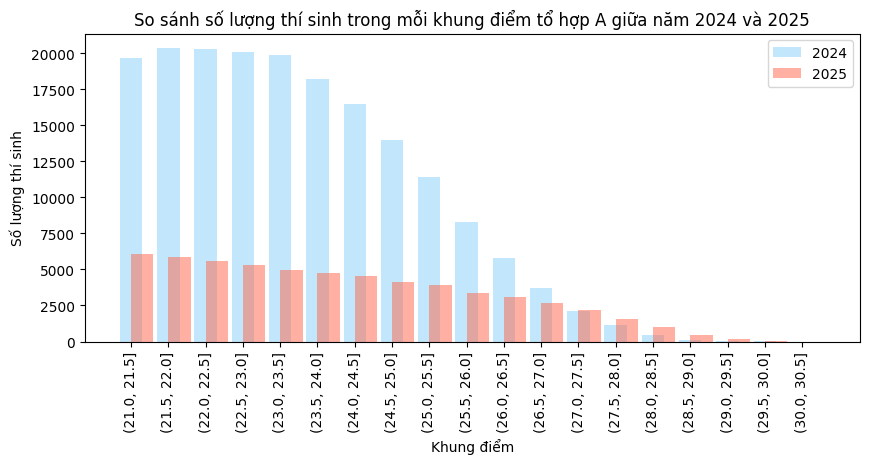

In [55]:
# Ước lượng
from scipy import stats

# Lựa chọn tổ hợp môn cần phân tích, VD: A
combo = 'A'

# Chia khung điểm từ 20 đến 30 điểm, mỗi khoảng 1 điểm
bins = np.arange(21, 31, 0.5)

# Lọc dữ liệu cho các năm 2023 và 2024
df_2023 = df_data_map[df_data_map['year'] == 2024]
df_2024 = df_data_map[df_data_map['year'] == 2025]

# Tạo bảng đếm số lượng thí sinh trong mỗi khung điểm cho từng năm
df_2023['bins'] = pd.cut(df_2023[combo], bins)
df_2024['bins'] = pd.cut(df_2024[combo], bins)

count_2023 = df_2023['bins'].value_counts().sort_index()
count_2024 = df_2024['bins'].value_counts().sort_index()

# Tính toán sự chênh lệch trung bình số thí sinh và khoảng tin cậy
mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))

# Hiển thị kết quả
print(f"Sự chênh lệch trung bình số thí sinh: {mean_diff}")
print(f"Khoảng tin cậy 95% cho sự chênh lệch trung bình: {confidence_interval}")

# Vẽ biểu đồ so sánh số lượng học sinh trong mỗi khung điểm cho 2 năm
plt.figure(figsize = (10,4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2024', align='center', alpha=0.5, color = 'lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2025', align='edge', alpha=0.5, color = 'tomato')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng thí sinh')
plt.title(f'So sánh số lượng thí sinh trong mỗi khung điểm tổ hợp {combo} giữa năm 2024 và 2025')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

### **Group A1**

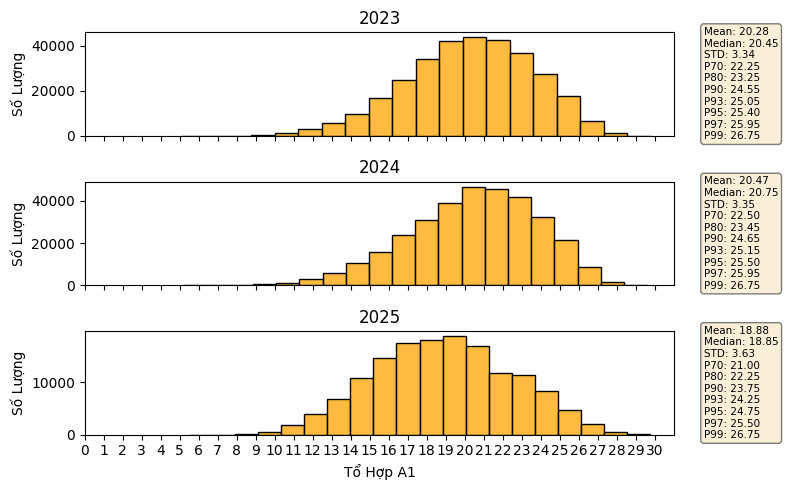

In [56]:
data = df_data_map

sub = 'A1'

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin([2023, 2024, 2025])]

score = list(range(0,31,1))

# Tạo histogram cho to hop 'f{sub}' cho 3 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(3, 1, figsize=(8,5), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='orange')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Tổ Hợp {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

/tmp/ipython-input-57-3492441759.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['bins'] = pd.cut(df_2023[combo], bins)
/tmp/ipython-input-57-3492441759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['bins'] = pd.cut(df_2024[combo], bins)


Sự chênh lệch trung bình số thí sinh: -5876.105263157895
Khoảng tin cậy 95% cho sự chênh lệch trung bình: (np.float64(-9437.805412261396), np.float64(-2314.4051140543947))


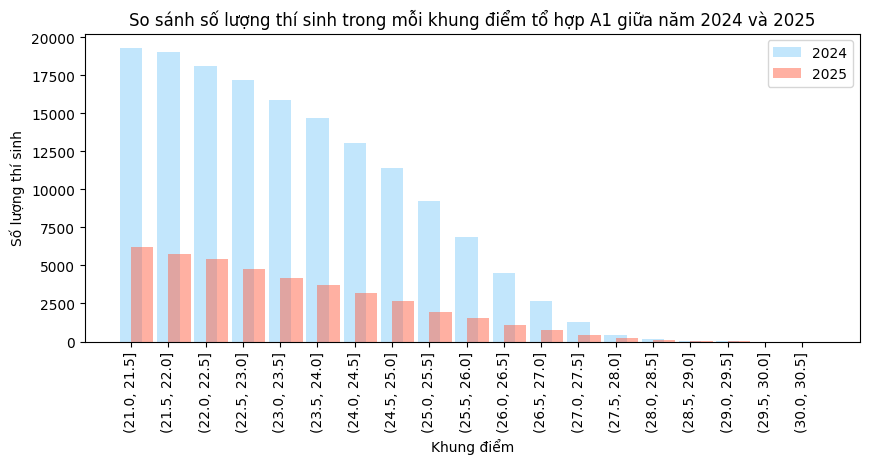

In [57]:
# Lựa chọn tổ hợp môn cần phân tích
combo = 'A1'

# Tạo bảng đếm số lượng thí sinh trong mỗi khung điểm cho từng năm
df_2023['bins'] = pd.cut(df_2023[combo], bins)
df_2024['bins'] = pd.cut(df_2024[combo], bins)

count_2023 = df_2023['bins'].value_counts().sort_index()
count_2024 = df_2024['bins'].value_counts().sort_index()

# Tính toán sự chênh lệch trung bình số thí sinh và khoảng tin cậy
mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))

# Hiển thị kết quả
print(f"Sự chênh lệch trung bình số thí sinh: {mean_diff}")
print(f"Khoảng tin cậy 95% cho sự chênh lệch trung bình: {confidence_interval}")

# Vẽ biểu đồ so sánh số lượng học sinh trong mỗi khung điểm cho 2 năm
plt.figure(figsize = (10,4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2024', align='center', alpha=0.5, color = 'lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2025', align='edge', alpha=0.5, color = 'tomato')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng thí sinh')
plt.title(f'So sánh số lượng thí sinh trong mỗi khung điểm tổ hợp {combo} giữa năm 2024 và 2025')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

### **Group B**

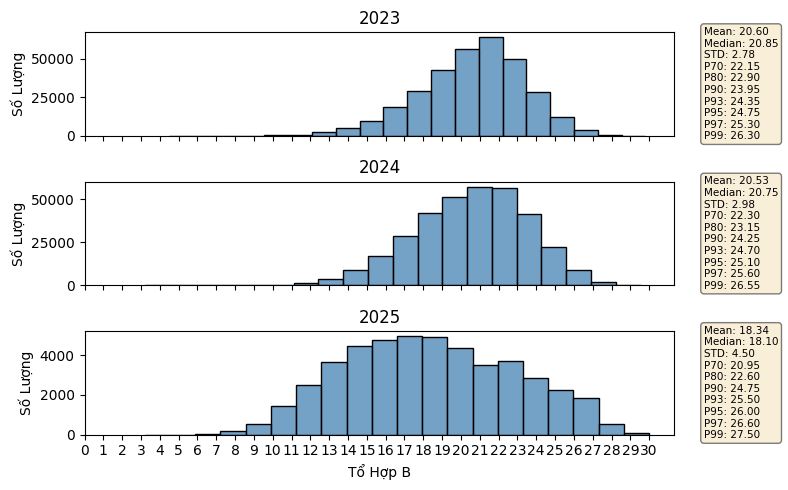

In [58]:
data = df_data_map

sub = 'B'

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin([2025, 2023, 2024])]

score = list(range(0,31,1))

# Tạo histogram cho to hop 'f{sub}' cho 3 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(3, 1, figsize=(8,5), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='steelblue')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Tổ Hợp {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

/tmp/ipython-input-59-1706282889.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['bins'] = pd.cut(df_2023[combo], bins)
/tmp/ipython-input-59-1706282889.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['bins'] = pd.cut(df_2024[combo], bins)


Sự chênh lệch trung bình số thí sinh: -7606.473684210527
Khoảng tin cậy 95% cho sự chênh lệch trung bình: (np.float64(-11544.913569132435), np.float64(-3668.033799288618))


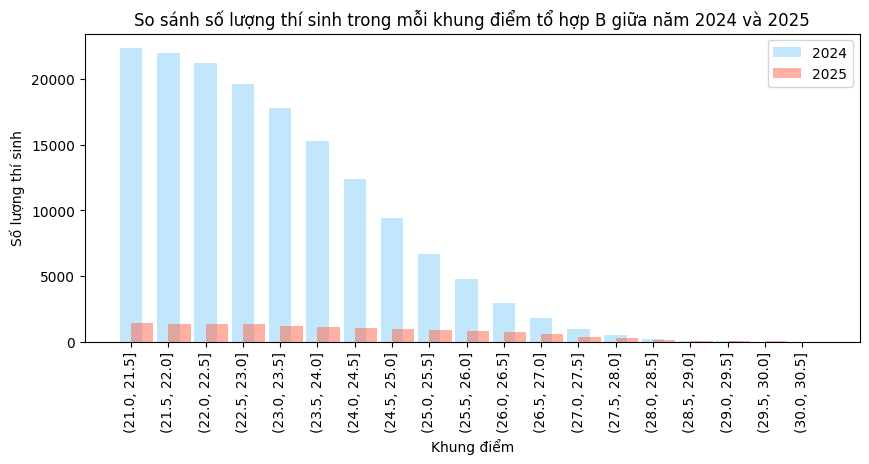

In [59]:
# Lựa chọn tổ hợp môn cần phân tích
combo = 'B'

# Tạo bảng đếm số lượng thí sinh trong mỗi khung điểm cho từng năm
df_2023['bins'] = pd.cut(df_2023[combo], bins)
df_2024['bins'] = pd.cut(df_2024[combo], bins)

count_2023 = df_2023['bins'].value_counts().sort_index()
count_2024 = df_2024['bins'].value_counts().sort_index()

# Tính toán sự chênh lệch trung bình số thí sinh và khoảng tin cậy
mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))

# Hiển thị kết quả
print(f"Sự chênh lệch trung bình số thí sinh: {mean_diff}")
print(f"Khoảng tin cậy 95% cho sự chênh lệch trung bình: {confidence_interval}")

# Vẽ biểu đồ so sánh số lượng học sinh trong mỗi khung điểm cho 2 năm
plt.figure(figsize = (10,4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2024', align='center', alpha=0.5, color = 'lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2025', align='edge', alpha=0.5, color = 'tomato')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng thí sinh')
plt.title(f'So sánh số lượng thí sinh trong mỗi khung điểm tổ hợp {combo} giữa năm 2024 và 2025')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

### **Group C**

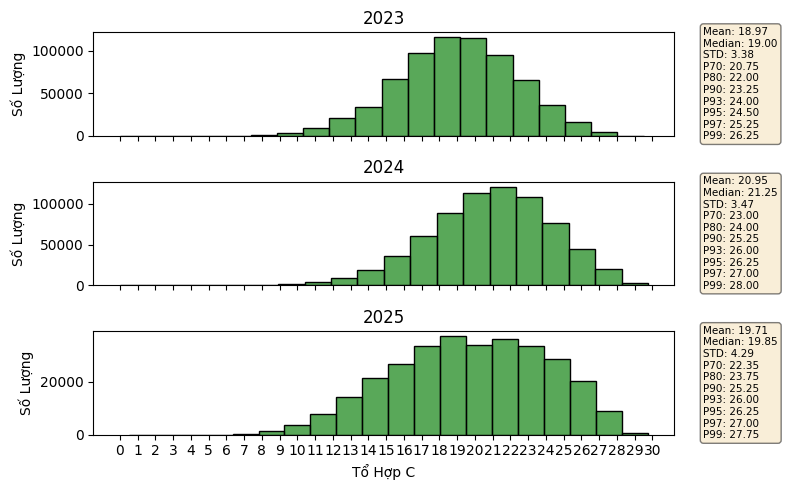

In [60]:
data = df_data_map

sub = 'C'

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin([2025, 2023, 2024])]

score = list(range(0,31,1))

# Tạo histogram cho to hop 'f{sub}' cho 3 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(3, 1, figsize=(8,5), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='forestgreen')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Tổ Hợp {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

/tmp/ipython-input-61-3075488977.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['bins'] = pd.cut(df_2023[combo], bins)
/tmp/ipython-input-61-3075488977.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['bins'] = pd.cut(df_2024[combo], bins)


Sự chênh lệch trung bình số thí sinh: -12003.578947368422
Khoảng tin cậy 95% cho sự chênh lệch trung bình: (np.float64(-19200.384699917173), np.float64(-4806.773194819669))


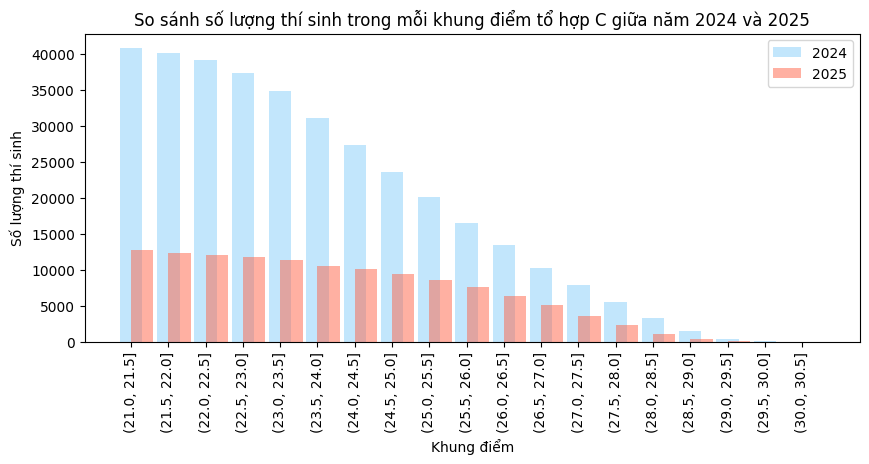

In [61]:
# Lựa chọn tổ hợp môn cần phân tích
combo = 'C'

# Tạo bảng đếm số lượng thí sinh trong mỗi khung điểm cho từng năm
df_2023['bins'] = pd.cut(df_2023[combo], bins)
df_2024['bins'] = pd.cut(df_2024[combo], bins)

count_2023 = df_2023['bins'].value_counts().sort_index()
count_2024 = df_2024['bins'].value_counts().sort_index()

# Tính toán sự chênh lệch trung bình số thí sinh và khoảng tin cậy
mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))

# Hiển thị kết quả
print(f"Sự chênh lệch trung bình số thí sinh: {mean_diff}")
print(f"Khoảng tin cậy 95% cho sự chênh lệch trung bình: {confidence_interval}")

# Vẽ biểu đồ so sánh số lượng học sinh trong mỗi khung điểm cho 2 năm
plt.figure(figsize = (10,4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2024', align='center', alpha=0.5, color = 'lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2025', align='edge', alpha=0.5, color = 'tomato')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng thí sinh')
plt.title(f'So sánh số lượng thí sinh trong mỗi khung điểm tổ hợp {combo} giữa năm 2024 và 2025')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

### **Group C1**

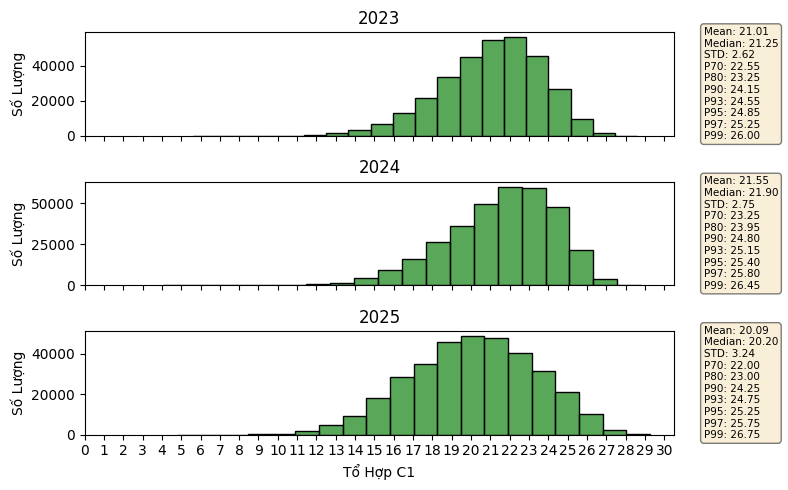

In [62]:
data = df_data_map

sub = 'C1'

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin([2025, 2023, 2024])]

score = list(range(0,31,1))

# Tạo histogram cho to hop 'f{sub}' cho 3 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(3, 1, figsize=(8,5), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='forestgreen')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Tổ Hợp {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

/tmp/ipython-input-63-38670076.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['bins'] = pd.cut(df_2023[combo], bins)
/tmp/ipython-input-63-38670076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['bins'] = pd.cut(df_2024[combo], bins)


Sự chênh lệch trung bình số thí sinh: -3802.0526315789484
Khoảng tin cậy 95% cho sự chênh lệch trung bình: (np.float64(-9622.40218947014), np.float64(2018.2969263122422))


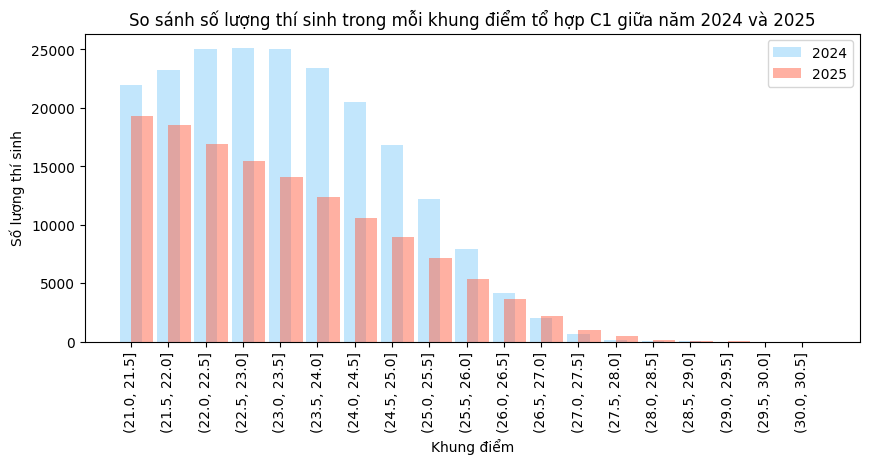

In [63]:
# Lựa chọn tổ hợp môn cần phân tích
combo = 'C1'

# Tạo bảng đếm số lượng thí sinh trong mỗi khung điểm cho từng năm
df_2023['bins'] = pd.cut(df_2023[combo], bins)
df_2024['bins'] = pd.cut(df_2024[combo], bins)

count_2023 = df_2023['bins'].value_counts().sort_index()
count_2024 = df_2024['bins'].value_counts().sort_index()

# Tính toán sự chênh lệch trung bình số thí sinh và khoảng tin cậy
mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))

# Hiển thị kết quả
print(f"Sự chênh lệch trung bình số thí sinh: {mean_diff}")
print(f"Khoảng tin cậy 95% cho sự chênh lệch trung bình: {confidence_interval}")

# Vẽ biểu đồ so sánh số lượng học sinh trong mỗi khung điểm cho 2 năm
plt.figure(figsize = (10,4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2024', align='center', alpha=0.5, color = 'lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2025', align='edge', alpha=0.5, color = 'tomato')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng thí sinh')
plt.title(f'So sánh số lượng thí sinh trong mỗi khung điểm tổ hợp {combo} giữa năm 2024 và 2025')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

### **Group D**

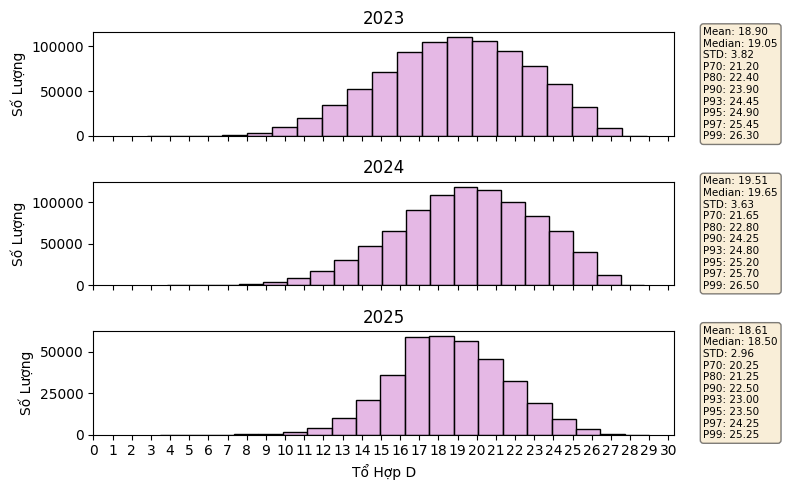

In [64]:
data = df_data_map

sub = 'D'

# Chuyển đổi cột year sang dạng số
data['year'] = pd.to_numeric(data['year'])

# Lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin([2025, 2023, 2024])]

score = list(range(0,31,1))

# Tạo histogram cho to hop 'f{sub}' cho 3 năm gần đây, sắp xếp theo dạng 1 cột với 5 hàng
fig, axes = plt.subplots(3, 1, figsize=(8,5), sharex=True)

# Các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

# Vẽ histogram cho từng năm và hiển thị các thông tin thống kê
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=20, kde=False, ax=axes[i], edgecolor='black', color='plum')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel(f'Tổ Hợp {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year][sub]
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.7)
    p80 = year_data.quantile(0.8)
    p90 = year_data.quantile(0.9)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

/tmp/ipython-input-65-4210745708.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['bins'] = pd.cut(df_2023[combo], bins)
/tmp/ipython-input-65-4210745708.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['bins'] = pd.cut(df_2024[combo], bins)


Sự chênh lệch trung bình số thí sinh: -13201.263157894737
Khoảng tin cậy 95% cho sự chênh lệch trung bình: (np.float64(-20841.20942504942), np.float64(-5561.316890740054))


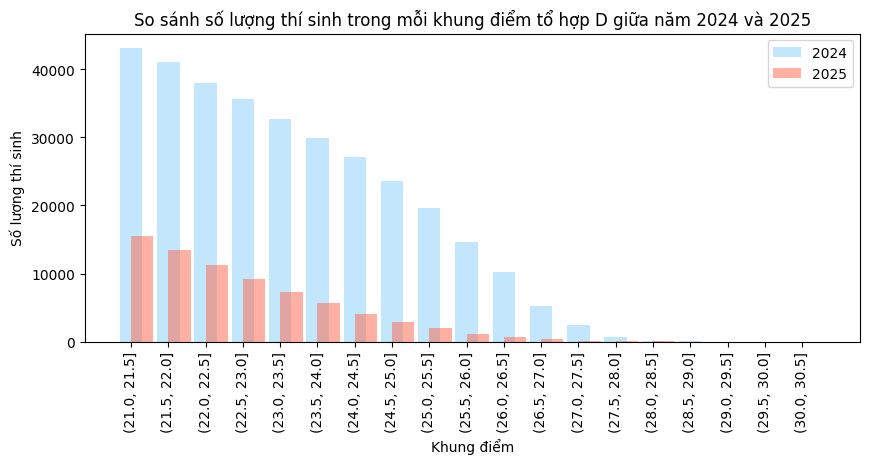

In [65]:
# Lựa chọn tổ hợp môn cần phân tích
combo = 'D'

# Tạo bảng đếm số lượng thí sinh trong mỗi khung điểm cho từng năm
df_2023['bins'] = pd.cut(df_2023[combo], bins)
df_2024['bins'] = pd.cut(df_2024[combo], bins)

count_2023 = df_2023['bins'].value_counts().sort_index()
count_2024 = df_2024['bins'].value_counts().sort_index()

# Tính toán sự chênh lệch trung bình số thí sinh và khoảng tin cậy
mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))

# Hiển thị kết quả
print(f"Sự chênh lệch trung bình số thí sinh: {mean_diff}")
print(f"Khoảng tin cậy 95% cho sự chênh lệch trung bình: {confidence_interval}")

# Vẽ biểu đồ so sánh số lượng học sinh trong mỗi khung điểm cho 2 năm
plt.figure(figsize = (10,4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2024', align='center', alpha=0.5, color = 'lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2025', align='edge', alpha=0.5, color = 'tomato')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng thí sinh')
plt.title(f'So sánh số lượng thí sinh trong mỗi khung điểm tổ hợp {combo} giữa năm 2024 và 2025')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

### **Correlation**

In [66]:
# Percentile
# Các tổ hợp môn cần phân tích
combinations = ['A', 'A1', 'B', 'C', 'C1', 'D']

# Các percentile cần tính toán
percentiles = list(range(80, 101, 2))

# Tạo DataFrame để lưu kết quả
percentile_df = pd.DataFrame(index=percentiles)

# Tính toán các chỉ số percentile
for combo in combinations:
    for year in [2023, 2024, 2025]:
      data = df_data_map[df_data_map['year'] == year][combo].dropna()
      percentile_values = np.percentile(data, percentiles)
      percentile_df[f'{combo}_{year}'] = percentile_values

# Hiển thị kết quả dưới dạng bảng
percentile_df = percentile_df.T
percentile_df.index.name = 'Combination_Year'

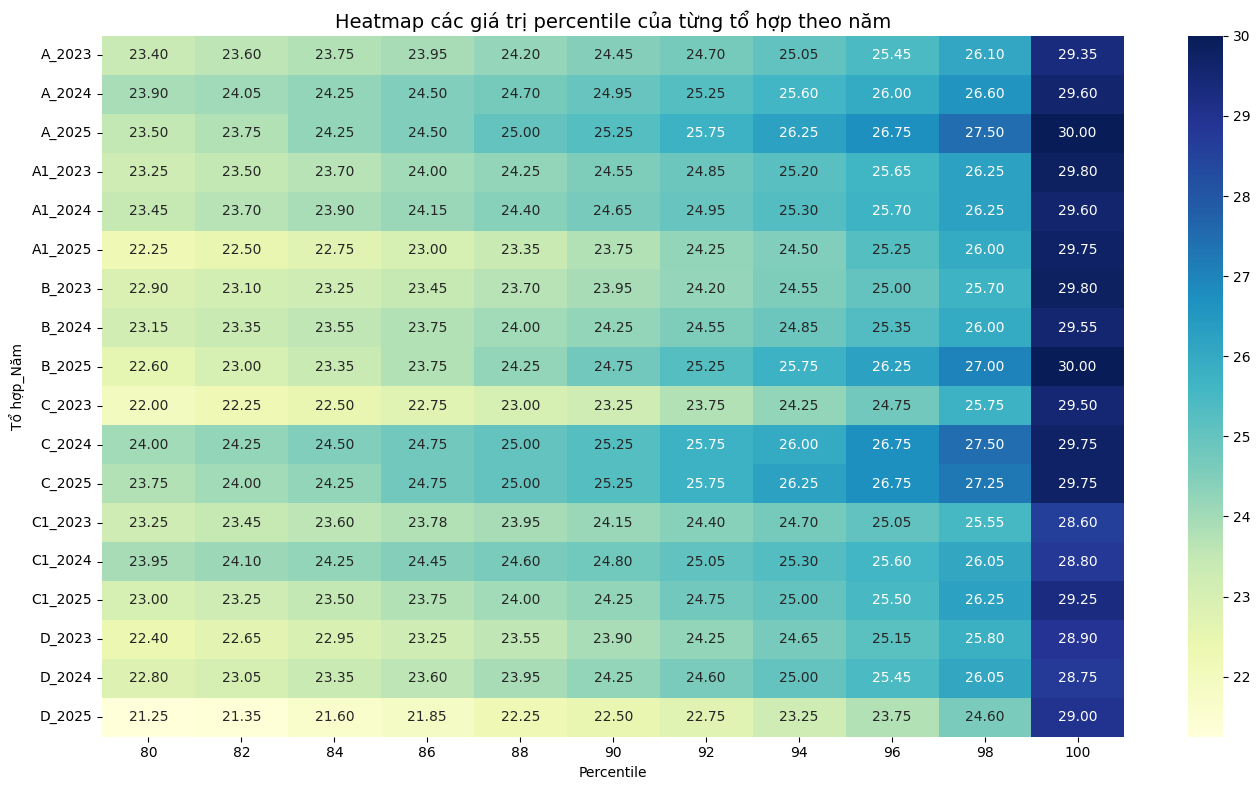

In [67]:
plt.figure(figsize=(14, 8))  # Tuỳ chỉnh kích thước cho đẹp
sns.heatmap(percentile_df, annot=True, fmt=".2f", cmap="YlGnBu")

plt.title("Heatmap các giá trị percentile của từng tổ hợp theo năm", fontsize=14)
plt.xlabel("Percentile")
plt.ylabel("Tổ hợp_Năm")
plt.tight_layout()
plt.show()

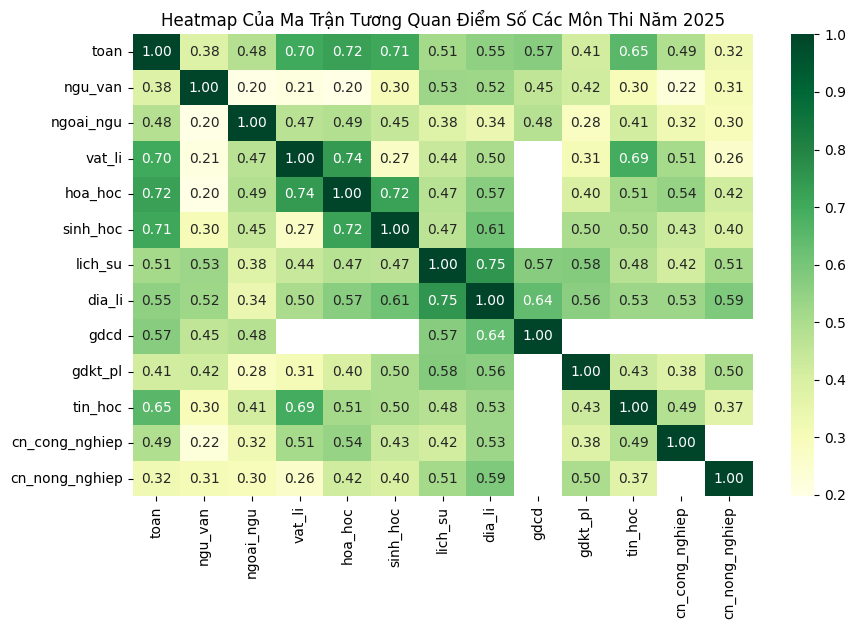

In [68]:
# Lọc dữ liệu cho năm 2024
df_2024 = sampled_data[sampled_data['year'] == 2025]

# Chọn các cột điểm số cho các môn học
subjects_scores = df_2024[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd',
                           'gdkt_pl', 'tin_hoc', 'cn_cong_nghiep', 'cn_nong_nghiep']]

# Tính toán ma trận tương quan
correlation_matrix = subjects_scores.corr()

# Vẽ biểu đồ heatmap của ma trận tương quan
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGn', fmt='.2f')
plt.title('Heatmap Của Ma Trận Tương Quan Điểm Số Các Môn Thi Năm 2025')
plt.show()

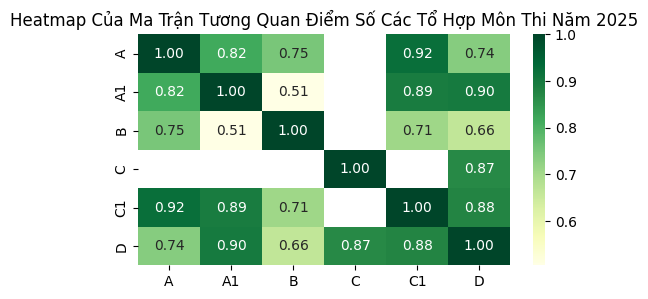

In [69]:
sampled_data['A'] = sampled_data['toan'] + sampled_data['vat_li'] + sampled_data['hoa_hoc']
sampled_data['A1'] = sampled_data['toan'] + sampled_data['vat_li'] + sampled_data['ngoai_ngu']
sampled_data['B'] = sampled_data['toan'] + sampled_data['hoa_hoc'] + sampled_data['sinh_hoc']
sampled_data['C'] = sampled_data['ngu_van'] + sampled_data['dia_li'] + sampled_data['lich_su']
sampled_data['C1'] = sampled_data['ngu_van'] + sampled_data['toan'] + sampled_data['vat_li']
sampled_data['D'] = sampled_data['toan'] + sampled_data['ngu_van'] + sampled_data['ngoai_ngu']

# Lọc dữ liệu cho năm 2024
df_2024 = sampled_data[sampled_data['year'] == 2025]

# Chọn các cột điểm số cho các môn học
group_scores = df_2024[['A', 'A1', 'B', 'C', 'C1', 'D']]

# Tính toán ma trận tương quan
correlation_matrix = group_scores.corr()

# Vẽ biểu đồ heatmap của ma trận tương quan
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGn', fmt='.2f')
plt.title('Heatmap Của Ma Trận Tương Quan Điểm Số Các Tổ Hợp Môn Thi Năm 2025')
plt.show()

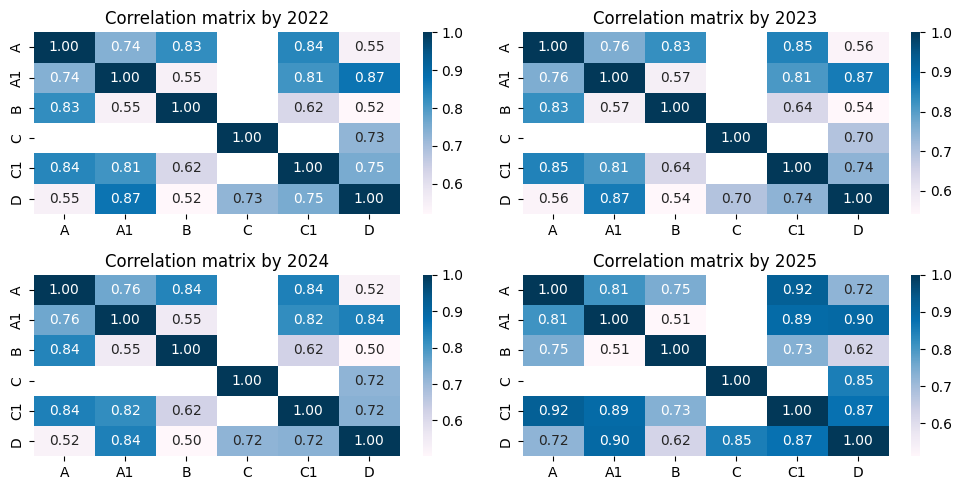

In [70]:
# Danh sách các năm cần phân tích
years = [2022, 2023, 2024, 2025]

# Tạo ra 1 figure để chứa các heatmap
fig, axes = plt.subplots(2,2, figsize=(10,5))
axes = axes.flatten()

# Vẽ heatmap cho từng năm
for i, year in enumerate(years):
    # Lọc dữ liệu cho năm hiện tại
    df_year = df_data_map[df_data_map['year'] == year]
    group_scores = df_year[['A', 'A1', 'B', 'C', 'C1', 'D']]
    correlation_matrix = group_scores.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='PuBu', fmt='.2f', ax=axes[i])
    axes[i].set_title(f'Correlation matrix by {year}')

# Điều chỉnh khoảng cách giữa các subplots
plt.subplots_adjust(wspace=0.5, hspace=0.6)
plt.tight_layout()
plt.show()

## **3.3 Location**

In [71]:
# Dữ liệu đầy đủ của 63 tỉnh thành của Việt Nam
data_province = {
    'province': [
        'Hà Nội', 'Hải Phòng', 'Quảng Ninh', 'Vĩnh Phúc', 'Bắc Ninh',
        'Hải Dương', 'Hưng Yên', 'Hà Nam', 'Thái Bình','Nam Định',
        'Ninh Bình', 'Hà Giang', 'Cao Bằng', 'Bắc Kạn', 'Tuyên Quang',
        'Lào Cai', 'Điện Biên', 'Lai Châu', 'Sơn La', 'Yên Bái',
        'Hòa Bình', 'Thái Nguyên', 'Lạng Sơn', 'Bắc Giang', 'Phú Thọ',
        'Quảng Bình', 'Quảng Trị', 'Thừa Thiên Huế', 'Đà Nẵng', 'Quảng Nam',
        'Quảng Ngãi', 'Bình Định', 'Phú Yên', 'Khánh Hòa', 'Ninh Thuận',
        'Bình Thuận', 'Thanh Hóa', 'Nghệ An', 'Hà Tĩnh', 'Gia Lai',
        'Kon Tum', 'Đắk Lắk', 'Đắk Nông', 'Lâm Đồng', 'Bình Phước',
        'Tây Ninh', 'Bình Dương', 'Đồng Nai', 'Bà Rịa - Vũng Tàu', 'TP. Hồ Chí Minh',
        'Long An', 'Tiền Giang', 'Bến Tre', 'Trà Vinh', 'Vĩnh Long',
        'Đồng Tháp', 'An Giang', 'Kiên Giang', 'Cần Thơ', 'Hậu Giang',
        'Sóc Trăng', 'Bạc Liêu', 'Cà Mau'],
    'region': [
        'Đồng bằng sông Hồng', 'Đồng bằng sông Hồng', 'Đồng bằng sông Hồng', 'Đồng bằng sông Hồng', 'Đồng bằng sông Hồng',
        'Đồng bằng sông Hồng', 'Đồng bằng sông Hồng', 'Đồng bằng sông Hồng', 'Đồng bằng sông Hồng', 'Đồng bằng sông Hồng',
        'Đồng bằng sông Hồng', 'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc',
        'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc',
        'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc', 'Trung du và miền núi phía Bắc',
        'Bắc Trung Bộ', 'Bắc Trung Bộ', 'Bắc Trung Bộ', 'Duyên hải Nam Trung Bộ', 'Duyên hải Nam Trung Bộ',
        'Duyên hải Nam Trung Bộ', 'Duyên hải Nam Trung Bộ', 'Duyên hải Nam Trung Bộ', 'Duyên hải Nam Trung Bộ', 'Duyên hải Nam Trung Bộ',
        'Duyên hải Nam Trung Bộ', 'Bắc Trung Bộ', 'Bắc Trung Bộ', 'Bắc Trung Bộ', 'Tây Nguyên',
        'Tây Nguyên', 'Tây Nguyên', 'Tây Nguyên', 'Tây Nguyên', 'Đông Nam Bộ',
        'Đông Nam Bộ', 'Đông Nam Bộ', 'Đông Nam Bộ', 'Đông Nam Bộ', 'Đông Nam Bộ',
        'Đồng bằng sông Cửu Long', 'Đồng bằng sông Cửu Long', 'Đồng bằng sông Cửu Long', 'Đồng bằng sông Cửu Long', 'Đồng bằng sông Cửu Long',
        'Đồng bằng sông Cửu Long', 'Đồng bằng sông Cửu Long', 'Đồng bằng sông Cửu Long', 'Đồng bằng sông Cửu Long', 'Đồng bằng sông Cửu Long',
        'Đồng bằng sông Cửu Long', 'Đồng bằng sông Cửu Long', 'Đồng bằng sông Cửu Long'
    ]
}

# Tạo DataFrame
data_eco_region = pd.DataFrame(data_province)

In [72]:
df_data_map_region = pd.merge(df_data_map, data_eco_region, on='province', how='left')

In [73]:
df_data_map_region[df_data_map_region['code'] == '31'].head(5)

sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  \
570348  31000001   NaN     5.25        NaN     NaN      NaN       NaN   
570349  31000002   7.0     4.50        5.4     NaN      NaN       NaN   
570350  31000003   6.8     6.25        6.6     NaN      NaN       NaN   
570351  31000004   NaN     7.75        NaN     NaN      NaN       NaN   
570352  31000005   6.0     6.00        5.0     NaN      NaN       NaN   

        lich_su  dia_li  gdcd  gdkt_pl  tin_hoc  cn_cong_nghiep  \
570348     5.75     5.0   NaN      NaN      NaN             NaN   
570349     6.00     6.5  6.25      NaN      NaN             NaN   
570350     7.00     7.0  7.25      NaN      NaN             NaN   
570351     9.50     8.5   NaN      NaN      NaN             NaN   
570352     5.75     6.0  7.50      NaN      NaN             NaN   

        cn_nong_nghiep  year ma_ngoai_ngu province_code code      province  \
570348             NaN  2022          NaN            31   31  Quảng Bình   
570349             NaN  2022          NaN            31   31  Quảng Bình   
570350             NaN  2022          NaN            31   31  Quảng Bình   
570351             NaN  2022          NaN            31   31  Quảng Bình   
570352             NaN  2022          NaN            31   31  Quảng Bình   

         A  A1   B      C  C1      D region  
570348 NaN NaN NaN  16.00 NaN    NaN    NaN  
570349 NaN NaN NaN  17.00 NaN  16.90    NaN  
570350 NaN NaN NaN  20.25 NaN  19.65    NaN  
570351 NaN NaN NaN  25.75 NaN    NaN    NaN  
570352 NaN NaN NaN  17.75 NaN  17.00    NaN

In [74]:
# Thống kê theo tỉnh
df_year_group_region = (
      df_data_map_region
      .pivot_table(index='region', columns='year', aggfunc='count', values='sbd')
      .reset_index()
)

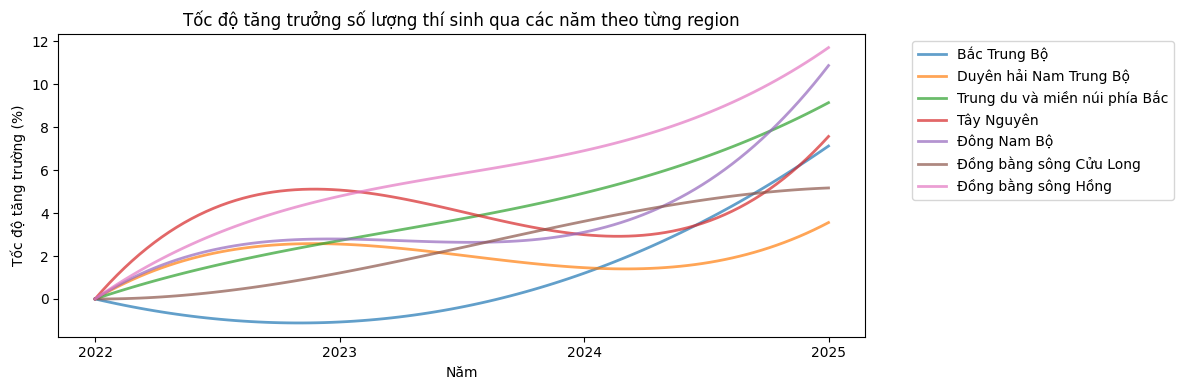

In [75]:
# Tính toán số lượng thí sinh mỗi năm theo region
students_per_year_region = df_data_map_region.groupby(['year','region']).size().unstack()

# Tính toán tốc độ tăng trưởng
growth_rate_region = students_per_year_region.pct_change() * 100

# Xử lý các giá trị inf và nan
growth_rate_region.replace([np.inf, -np.inf], np.nan, inplace=True)
growth_rate_region.fillna(0, inplace=True)

# Vẽ biểu đồ đường cho tốc độ tăng trưởng theo từng region
plt.figure(figsize=(12,4))

for region in growth_rate_region.columns:
    x = growth_rate_region.index
    y = growth_rate_region[region]

    # Tạo các điểm x mới để làm mịn đường
    x_new = np.linspace(x.min(), x.max(), 100)

    # Tạo spline để làm mịn đường
    spl = make_interp_spline(x, y, k=3)
    y_smooth = spl(x_new)

    plt.plot(x_new, y_smooth, label=region, lw=2, alpha=0.7)

plt.title('Tốc độ tăng trưởng số lượng thí sinh qua các năm theo từng region')
plt.xlabel('Năm')
plt.ylabel('Tốc độ tăng trường (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(False)
plt.xticks(x_year)
plt.tight_layout()
plt.show()

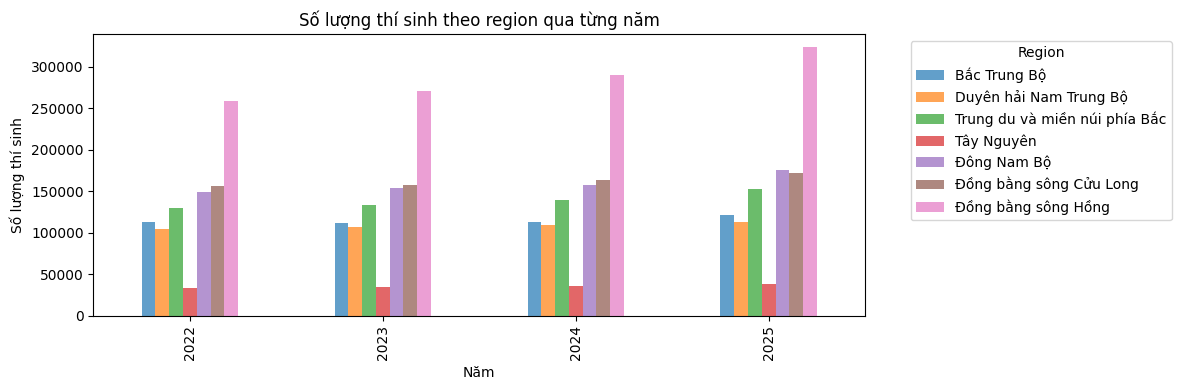

In [76]:
# Tính toán số lượng thí sinh các năm theo từng region
students_per_year_region = df_data_map_region.groupby(['year','region']).size().unstack()

# Vẽ biểu đồ cột so sánh số lượng thí sinh theo region qua từng năm
students_per_year_region.plot(kind='bar', figsize=(12, 4), alpha=0.7)
plt.title('Số lượng thí sinh theo region qua từng năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng thí sinh')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **Bắc Trung Bộ**

In [77]:
# Check BTB
data_kv = df_data_map_region

data_kv['year'] = data_kv['year'].astype(str)

df_year_group_kv = (
      data_kv[data_kv['region'] == 'Bắc Trung Bộ']
      .pivot_table(index='province', columns='year', aggfunc='count', values='sbd')
      .reset_index()
)

# So sánh tỉ lệ tăng giảm số lượng 2 năm
df_year_group_kv['diff_23'] = (
  (df_year_group_kv['2023'] - df_year_group_kv['2022']) / df_year_group_kv['2022']
)

df_year_group_kv['diff_24'] = (
  (df_year_group_kv['2024'] - df_year_group_kv['2023']) / df_year_group_kv['2023']
)

df_year_group_kv['diff_25'] = (
  (df_year_group_kv['2025'] - df_year_group_kv['2024']) / df_year_group_kv['2024']
)

In [78]:
# Tô màu (heatmap) cho table:
(
df_year_group_kv
.sort_values(by='2023', ascending=False).style.format({'diff_23': '{:.0%}', 'diff_24': '{:.0%}', 'diff_25': '{:.0%}'})
.background_gradient(subset=['diff_23', 'diff_24', 'diff_25'], cmap='PuBu')
)

### **Duyên Hải NTB**

In [79]:
# Check NTB
# Thống kê theo tỉnh
data_kv = df_data_map_region

data_kv['year'] = data_kv['year'].astype(str)

df_year_group_kv = (
      data_kv[data_kv['region'] == 'Duyên hải Nam Trung Bộ']
      .pivot_table(index='province', columns='year', aggfunc='count', values='sbd')
      .reset_index()
)

# So sánh tỉ lệ tăng giảm số lượng 2 năm
df_year_group_kv['diff_23'] = (
  (df_year_group_kv['2023'] - df_year_group_kv['2022']) / df_year_group_kv['2022']
)

df_year_group_kv['diff_24'] = (
  (df_year_group_kv['2024'] - df_year_group_kv['2023']) / df_year_group_kv['2023']
)

df_year_group_kv['diff_25'] = (
  (df_year_group_kv['2025'] - df_year_group_kv['2024']) / df_year_group_kv['2024']
)

In [80]:
# Tô màu (heatmap) cho table:
(
df_year_group_kv
.sort_values(by='2023', ascending=False).style.format({'diff_23': '{:.0%}', 'diff_24': '{:.0%}', 'diff_25': '{:.0%}'})
.background_gradient(subset=['diff_23', 'diff_24', 'diff_25'], cmap='PuBu')
)

### **Trung du và miền núi phía Bắc**

In [81]:
# Check TDMNPB
data_kv = df_data_map_region

data_kv['year'] = data_kv['year'].astype(str)

df_year_group_kv = (
      data_kv[data_kv['region'] == 'Trung du và miền núi phía Bắc']
      .pivot_table(index='province', columns='year', aggfunc='count', values='sbd')
      .reset_index()
)

# So sánh tỉ lệ tăng giảm số lượng 2 năm
df_year_group_kv['diff_23'] = (
  (df_year_group_kv['2023'] - df_year_group_kv['2022']) / df_year_group_kv['2022']
)

df_year_group_kv['diff_24'] = (
  (df_year_group_kv['2024'] - df_year_group_kv['2023']) / df_year_group_kv['2023']
)

df_year_group_kv['diff_25'] = (
  (df_year_group_kv['2025'] - df_year_group_kv['2024']) / df_year_group_kv['2024']
)

In [82]:
# Tô màu (heatmap) cho table:
(
df_year_group_kv
.sort_values(by='2023', ascending=False).style.format({'diff_23': '{:.0%}', 'diff_24': '{:.0%}', 'diff_25': '{:.0%}'})
.background_gradient(subset=['diff_23', 'diff_24', 'diff_25'], cmap='PuBu')
)

### **Tây Nguyên**

In [83]:
# Check TN
data_kv = df_data_map_region

data_kv['year'] = data_kv['year'].astype(str)

df_year_group_kv = (
      data_kv[data_kv['region'] == 'Tây Nguyên']
      .pivot_table(index='province', columns='year', aggfunc='count', values='sbd')
      .reset_index()
)

# So sánh tỉ lệ tăng giảm số lượng 2 năm
df_year_group_kv['diff_23'] = (
  (df_year_group_kv['2023'] - df_year_group_kv['2022']) / df_year_group_kv['2022']
)

df_year_group_kv['diff_24'] = (
  (df_year_group_kv['2024'] - df_year_group_kv['2023']) / df_year_group_kv['2023']
)

df_year_group_kv['diff_25'] = (
  (df_year_group_kv['2025'] - df_year_group_kv['2024']) / df_year_group_kv['2024']
)

In [84]:
# Tô màu (heatmap) cho table:
(
df_year_group_kv
.sort_values(by='2023', ascending=False).style.format({'diff_23': '{:.0%}', 'diff_24': '{:.0%}', 'diff_25': '{:.0%}'})
.background_gradient(subset=['diff_23', 'diff_24', 'diff_25'], cmap='PuBu')
)

### **Đông Nam Bộ**

In [85]:
# Check ĐNB
data_kv = df_data_map_region

data_kv['year'] = data_kv['year'].astype(str)

df_year_group_kv = (
      data_kv[data_kv['region'] == 'Đông Nam Bộ']
      .pivot_table(index='province', columns='year', aggfunc='count', values='sbd')
      .reset_index()
)

# So sánh tỉ lệ tăng giảm số lượng 2 năm
df_year_group_kv['diff_23'] = (
  (df_year_group_kv['2023'] - df_year_group_kv['2022']) / df_year_group_kv['2022']
)

df_year_group_kv['diff_24'] = (
  (df_year_group_kv['2024'] - df_year_group_kv['2023']) / df_year_group_kv['2023']
)

df_year_group_kv['diff_25'] = (
  (df_year_group_kv['2025'] - df_year_group_kv['2024']) / df_year_group_kv['2024']
)

In [86]:
# Tô màu (heatmap) cho table:
(
df_year_group_kv
.sort_values(by='2023', ascending=False).style.format({'diff_23': '{:.0%}', 'diff_24': '{:.0%}', 'diff_25': '{:.0%}'})
.background_gradient(subset=['diff_23', 'diff_24', 'diff_25'], cmap='PuBu')
)

### **ĐB Sông Hồng**

In [87]:
# Check ĐBSH
data_kv = df_data_map_region

data_kv['year'] = data_kv['year'].astype(str)

df_year_group_kv = (
      data_kv[data_kv['region'] == 'Đồng bằng sông Hồng']
      .pivot_table(index='province', columns='year', aggfunc='count', values='sbd')
      .reset_index()
)

# So sánh tỉ lệ tăng giảm số lượng 2 năm
df_year_group_kv['diff_23'] = (
  (df_year_group_kv['2023'] - df_year_group_kv['2022']) / df_year_group_kv['2022']
)

df_year_group_kv['diff_24'] = (
  (df_year_group_kv['2024'] - df_year_group_kv['2023']) / df_year_group_kv['2023']
)

df_year_group_kv['diff_25'] = (
  (df_year_group_kv['2025'] - df_year_group_kv['2024']) / df_year_group_kv['2024']
)

In [88]:
# Tô màu (heatmap) cho table:
(
df_year_group_kv
.sort_values(by='2023', ascending=False).style.format({'diff_23': '{:.0%}', 'diff_24': '{:.0%}', 'diff_25': '{:.0%}'})
.background_gradient(subset=['diff_23', 'diff_24', 'diff_25'], cmap='PuBu')
)

### **ĐB Sông Cửu Long**

In [89]:
# Check ĐBSCL
data_kv = df_data_map_region

data_kv['year'] = data_kv['year'].astype(str)

df_year_group_kv = (
      data_kv[data_kv['region'] == 'Đồng bằng sông Cửu Long']
      .pivot_table(index='province', columns='year', aggfunc='count', values='sbd')
      .reset_index()
)

# So sánh tỉ lệ tăng giảm số lượng 2 năm
df_year_group_kv['diff_23'] = (
  (df_year_group_kv['2023'] - df_year_group_kv['2022']) / df_year_group_kv['2022']
)

df_year_group_kv['diff_24'] = (
  (df_year_group_kv['2024'] - df_year_group_kv['2023']) / df_year_group_kv['2023']
)

df_year_group_kv['diff_25'] = (
  (df_year_group_kv['2025'] - df_year_group_kv['2024']) / df_year_group_kv['2024']
)

In [90]:
# Tô màu (heatmap) cho table:
(
df_year_group_kv
.sort_values(by='2023', ascending=False).style.format({'diff_23': '{:.0%}', 'diff_24': '{:.0%}', 'diff_25': '{:.0%}'})
.background_gradient(subset=['diff_23', 'diff_24', 'diff_25'], cmap='PuBu')
)

## **3.4 Map**

In [91]:
import geopandas as gpd
df_map = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Datasets/THPTQG_2024/vnprovince.geojson')

In [92]:
df_map['province'] = df_map['Name_VI'].replace({'Bình  Dương':'Bình Dương', 'Thái  Nguyên':'Thái Nguyên', 'Quảng  Nam':'Quảng Nam',
                                                'Khánh  Hòa':'Khánh Hòa', 'Quảng  Ngãi':'Quảng Ngãi', 'Kiên  Giang':'Kiên Giang',
                                                'Đắk Nông':'Đăk Nông', 'Thừa Thiên-Huế':'Thừa Thiên Huế', 'Ninh  Thuận':'Ninh Thuận',
                                                'Quảng Bình':'Quảng Bình', 'Bà Rịa - Vũng Tàu':'Bà Rịa -Vũng Tàu',
                                                'Đắk Lắk':'Đăk Lăk'})

In [93]:
# Gộp hình theo tỉnh (MultiPolygon về 1 tỉnh duy nhất)
df_map_clean = df_map.dissolve(by='province', as_index=False)

### **Subject**

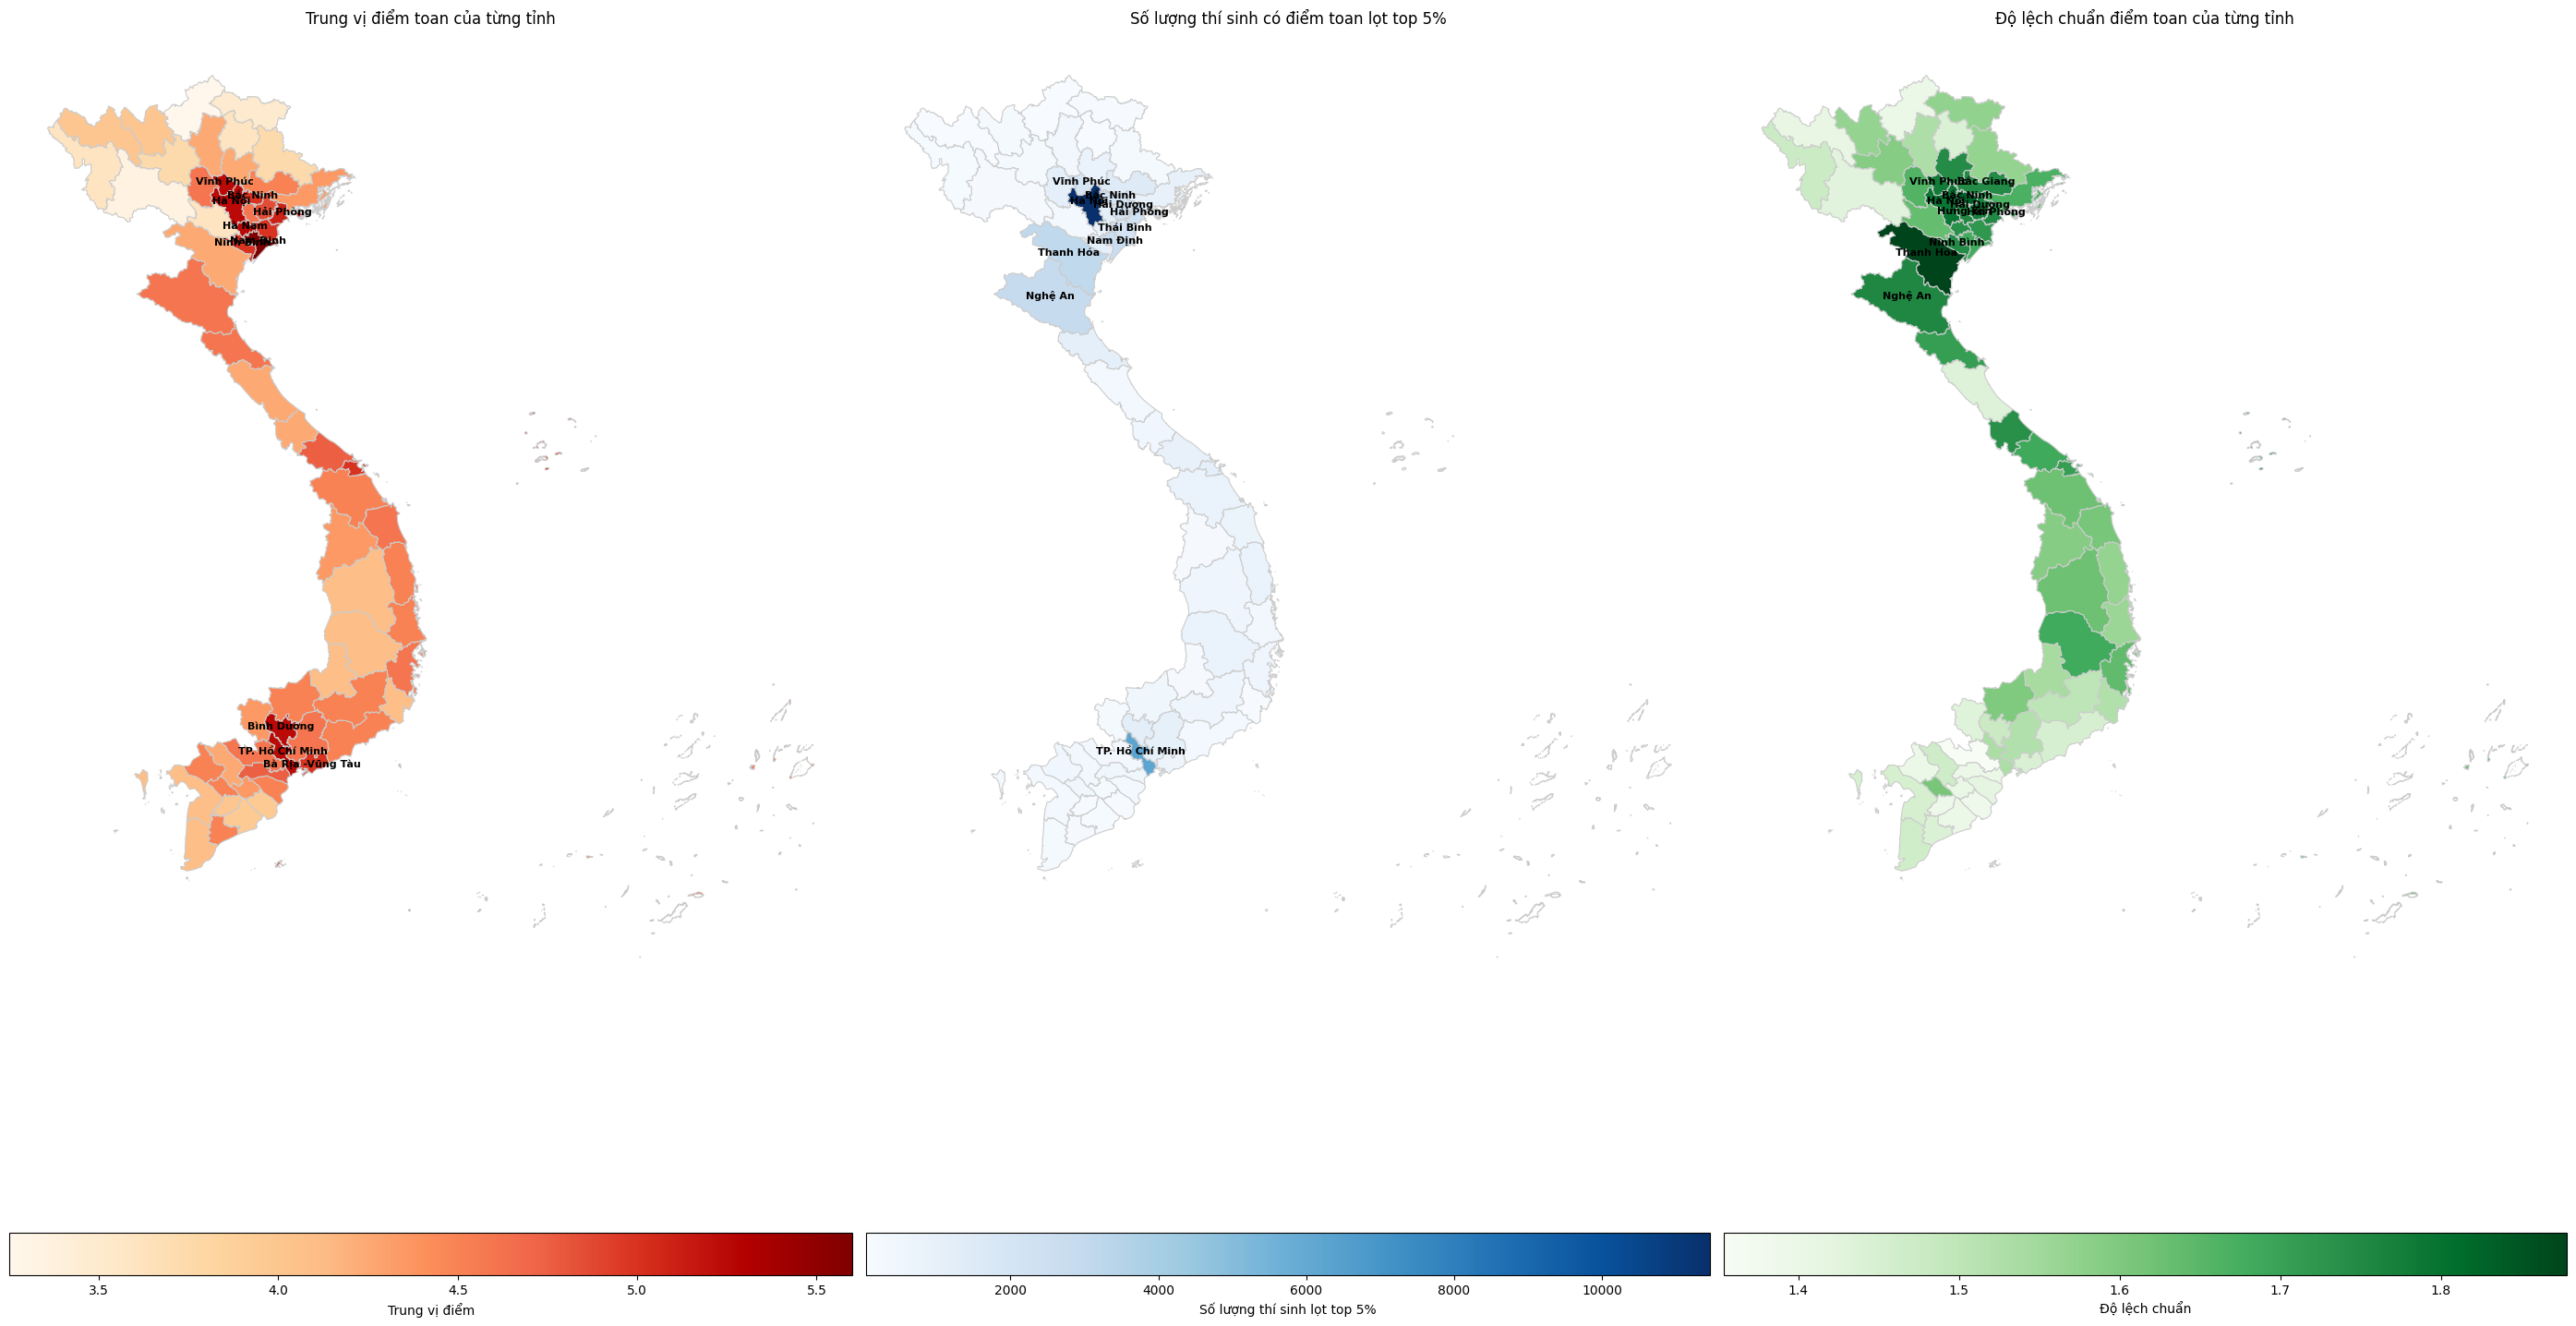

In [94]:
sub = 'toan'

# Lọc dữ liệu cho năm 2025
df = df_data_map_region[df_data_map_region['year'] == '2025']

# Tính toán trung vị điểm Toán của từng tỉnh
median_scores = df.groupby('province')[sub].median().reset_index()
median_scores.columns = ['province', f'median_{sub}']

# Tính toán số lượng thí sinh có điểm top 5%
high_scores_count = df[df[sub] >= df[sub].quantile(0.95)].groupby('province').size().reset_index(name=f'high_{sub}')

# Tính toán độ lệch chuẩn điểm Toán của từng tỉnh
std_dev_scores = df.groupby('province')[sub].std().reset_index()
std_dev_scores.columns = ['province', f'std_{sub}']

# Đọc dữ liệu Multipolygon của từng tỉnh
gdf = df_map_clean[['province', 'geometry']]

# Kết hợp dữ liệu trung vị điểm Toán, số lượng thí sinh có điểm toán top 5% và độ lệch chuẩn
gdf = gdf.merge(median_scores, on='province', how='left')
gdf = gdf.merge(high_scores_count, on='province', how='left')
gdf = gdf.merge(std_dev_scores, on='province', how='left')

# Lấy top 10 tỉnh có trung vị điểm Toán cao nhất
top_10_provinces_median = gdf.nlargest(10, f'median_{sub}')
top_10_provinces_high_scores = gdf.nlargest(10, f'high_{sub}')
top_10_provinces_std = gdf.nlargest(10, f'std_{sub}')

# Tạo figure với 3 subplot
fig, axes = plt.subplots(1, 3, figsize=(28, 17))
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

# Vẽ bản đồ trung bị điểm toán
gdf.plot(column=f'median_{sub}', ax=axes[0], legend=True, cmap='OrRd',
         legend_kwds={'label': f'Trung vị điểm', 'orientation': 'horizontal'},
         linewidth=0.8, edgecolor='0.8')
axes[0].set_title(f'Trung vị điểm {sub} của từng tỉnh')

# Vẽ nhãn cho top 10 tỉnh trung bị điểm Toán cao nhất
for idx, row in top_10_provinces_median.iterrows():
  axes[0].annotate(text=row['province'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment = 'center', fontsize=8, color='black', weight='bold')

# Vẽ bản đồ số lượng thí sinh có điểm Toán lọt top 5%
gdf.plot(column=f'high_{sub}', ax=axes[1], legend=True, cmap='Blues',
         legend_kwds={'label': f'Số lượng thí sinh lọt top 5%', 'orientation': 'horizontal'},
         linewidth=0.8, edgecolor='0.8')
axes[1].set_title(f'Số lượng thí sinh có điểm {sub} lọt top 5%')

# Vẽ nhãn cho top 10 tỉnh có số lượng thí sinh có điểm toán lọt top 5%
for idx, row in top_10_provinces_high_scores.iterrows():
  axes[1].annotate(text=row['province'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment = 'center', fontsize=8, color='black', weight='bold')

# Vẽ bản đồ độ lệch chuẩn của điểm Toán
gdf.plot(column=f'std_{sub}', ax=axes[2], legend=True, cmap='Greens',
         legend_kwds={'label': f'Độ lệch chuẩn', 'orientation': 'horizontal'},
         linewidth=0.8, edgecolor='0.8')
axes[2].set_title(f'Độ lệch chuẩn điểm {sub} của từng tỉnh')

# Vẽ nhãn cho top 10 tỉnh có độ lệch chuẩn điểm Toán cao nhất
for idx, row in top_10_provinces_std.iterrows():
  axes[2].annotate(text=row['province'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment = 'center', fontsize=8, color='black', weight='bold')

plt.tight_layout()
plt.show()

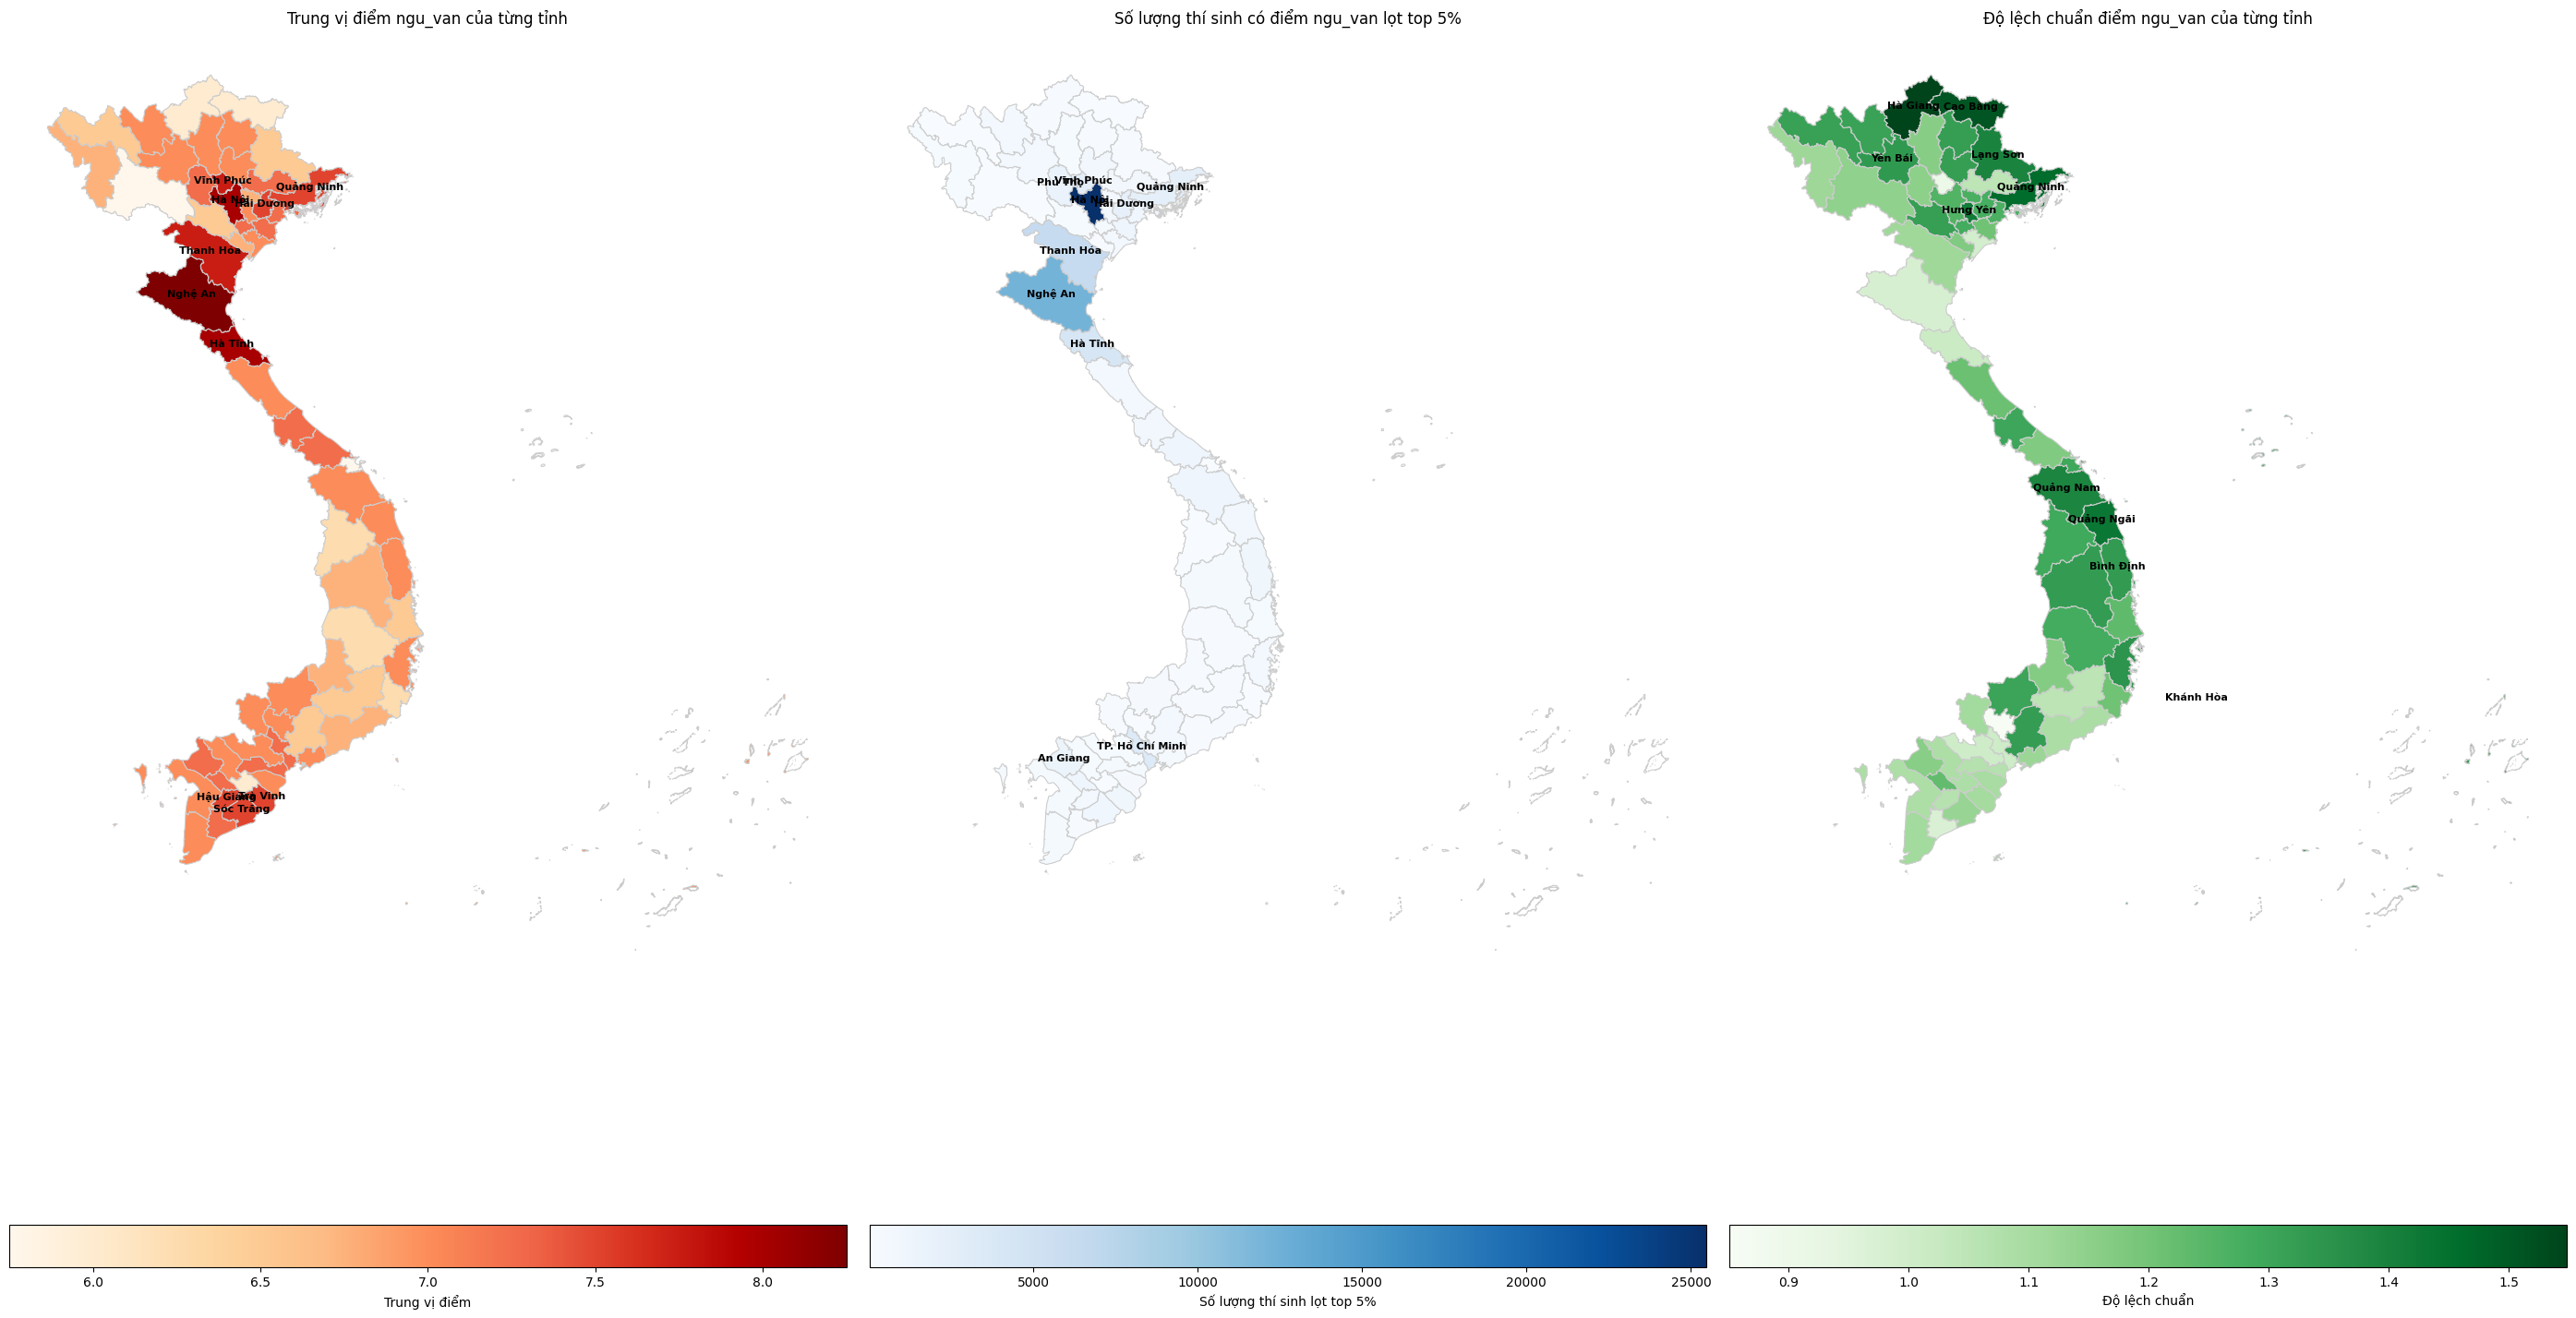

In [95]:
sub = 'ngu_van'

# Lọc dữ liệu cho năm 2025
df = df_data_map_region[df_data_map_region['year'] == '2025']

# Tính toán trung bị điểm Toán của từng tỉnh
median_scores = df.groupby('province')[sub].median().reset_index()
median_scores.columns = ['province', f'median_{sub}']

# Tính toán số lượng thí sinh có điểm top 5%
high_scores_count = df[df[sub] >= df[sub].quantile(0.95)].groupby('province').size().reset_index(name=f'high_{sub}')

# Tính toán độ lệch chuẩn điểm Toán của từng tỉnh
std_dev_scores = df.groupby('province')[sub].std().reset_index()
std_dev_scores.columns = ['province', f'std_{sub}']

# Đọc dữ liệu Multipolygon của từng tỉnh
gdf = df_map_clean[['province', 'geometry']]

# Kết hợp dữ liệu trung vị điểm Toán, số lượng thí sinh có điểm toán top 5% và độ lệch chuẩn
gdf = gdf.merge(median_scores, on='province', how='left')
gdf = gdf.merge(high_scores_count, on='province', how='left')
gdf = gdf.merge(std_dev_scores, on='province', how='left')

# Lấy top 10 tỉnh có trung vị điểm Toán cao nhất
top_10_provinces_median = gdf.nlargest(10, f'median_{sub}')
top_10_provinces_high_scores = gdf.nlargest(10, f'high_{sub}')
top_10_provinces_std = gdf.nlargest(10, f'std_{sub}')

# Tạo figure với 3 subplot
fig, axes = plt.subplots(1, 3, figsize=(28, 17))
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

# Vẽ bản đồ trung bị điểm toán
gdf.plot(column=f'median_{sub}', ax=axes[0], legend=True, cmap='OrRd',
         legend_kwds={'label': f'Trung vị điểm', 'orientation': 'horizontal'},
         linewidth=0.8, edgecolor='0.8')
axes[0].set_title(f'Trung vị điểm {sub} của từng tỉnh')

# Vẽ nhãn cho top 10 tỉnh trung bị điểm Toán cao nhất
for idx, row in top_10_provinces_median.iterrows():
  axes[0].annotate(text=row['province'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment = 'center', fontsize=8, color='black', weight='bold')

# Vẽ bản đồ số lượng thí sinh có điểm Toán lọt top 5%
gdf.plot(column=f'high_{sub}', ax=axes[1], legend=True, cmap='Blues',
         legend_kwds={'label': f'Số lượng thí sinh lọt top 5%', 'orientation': 'horizontal'},
         linewidth=0.8, edgecolor='0.8')
axes[1].set_title(f'Số lượng thí sinh có điểm {sub} lọt top 5%')

# Vẽ nhãn cho top 10 tỉnh có số lượng thí sinh có điểm toán lọt top 5%
for idx, row in top_10_provinces_high_scores.iterrows():
  axes[1].annotate(text=row['province'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment = 'center', fontsize=8, color='black', weight='bold')

# Vẽ bản đồ độ lệch chuẩn của điểm Toán
gdf.plot(column=f'std_{sub}', ax=axes[2], legend=True, cmap='Greens',
         legend_kwds={'label': f'Độ lệch chuẩn', 'orientation': 'horizontal'},
         linewidth=0.8, edgecolor='0.8')
axes[2].set_title(f'Độ lệch chuẩn điểm {sub} của từng tỉnh')

# Vẽ nhãn cho top 10 tỉnh có độ lệch chuẩn điểm Toán cao nhất
for idx, row in top_10_provinces_std.iterrows():
  axes[2].annotate(text=row['province'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment = 'center', fontsize=8, color='black', weight='bold')

plt.tight_layout()
plt.show()

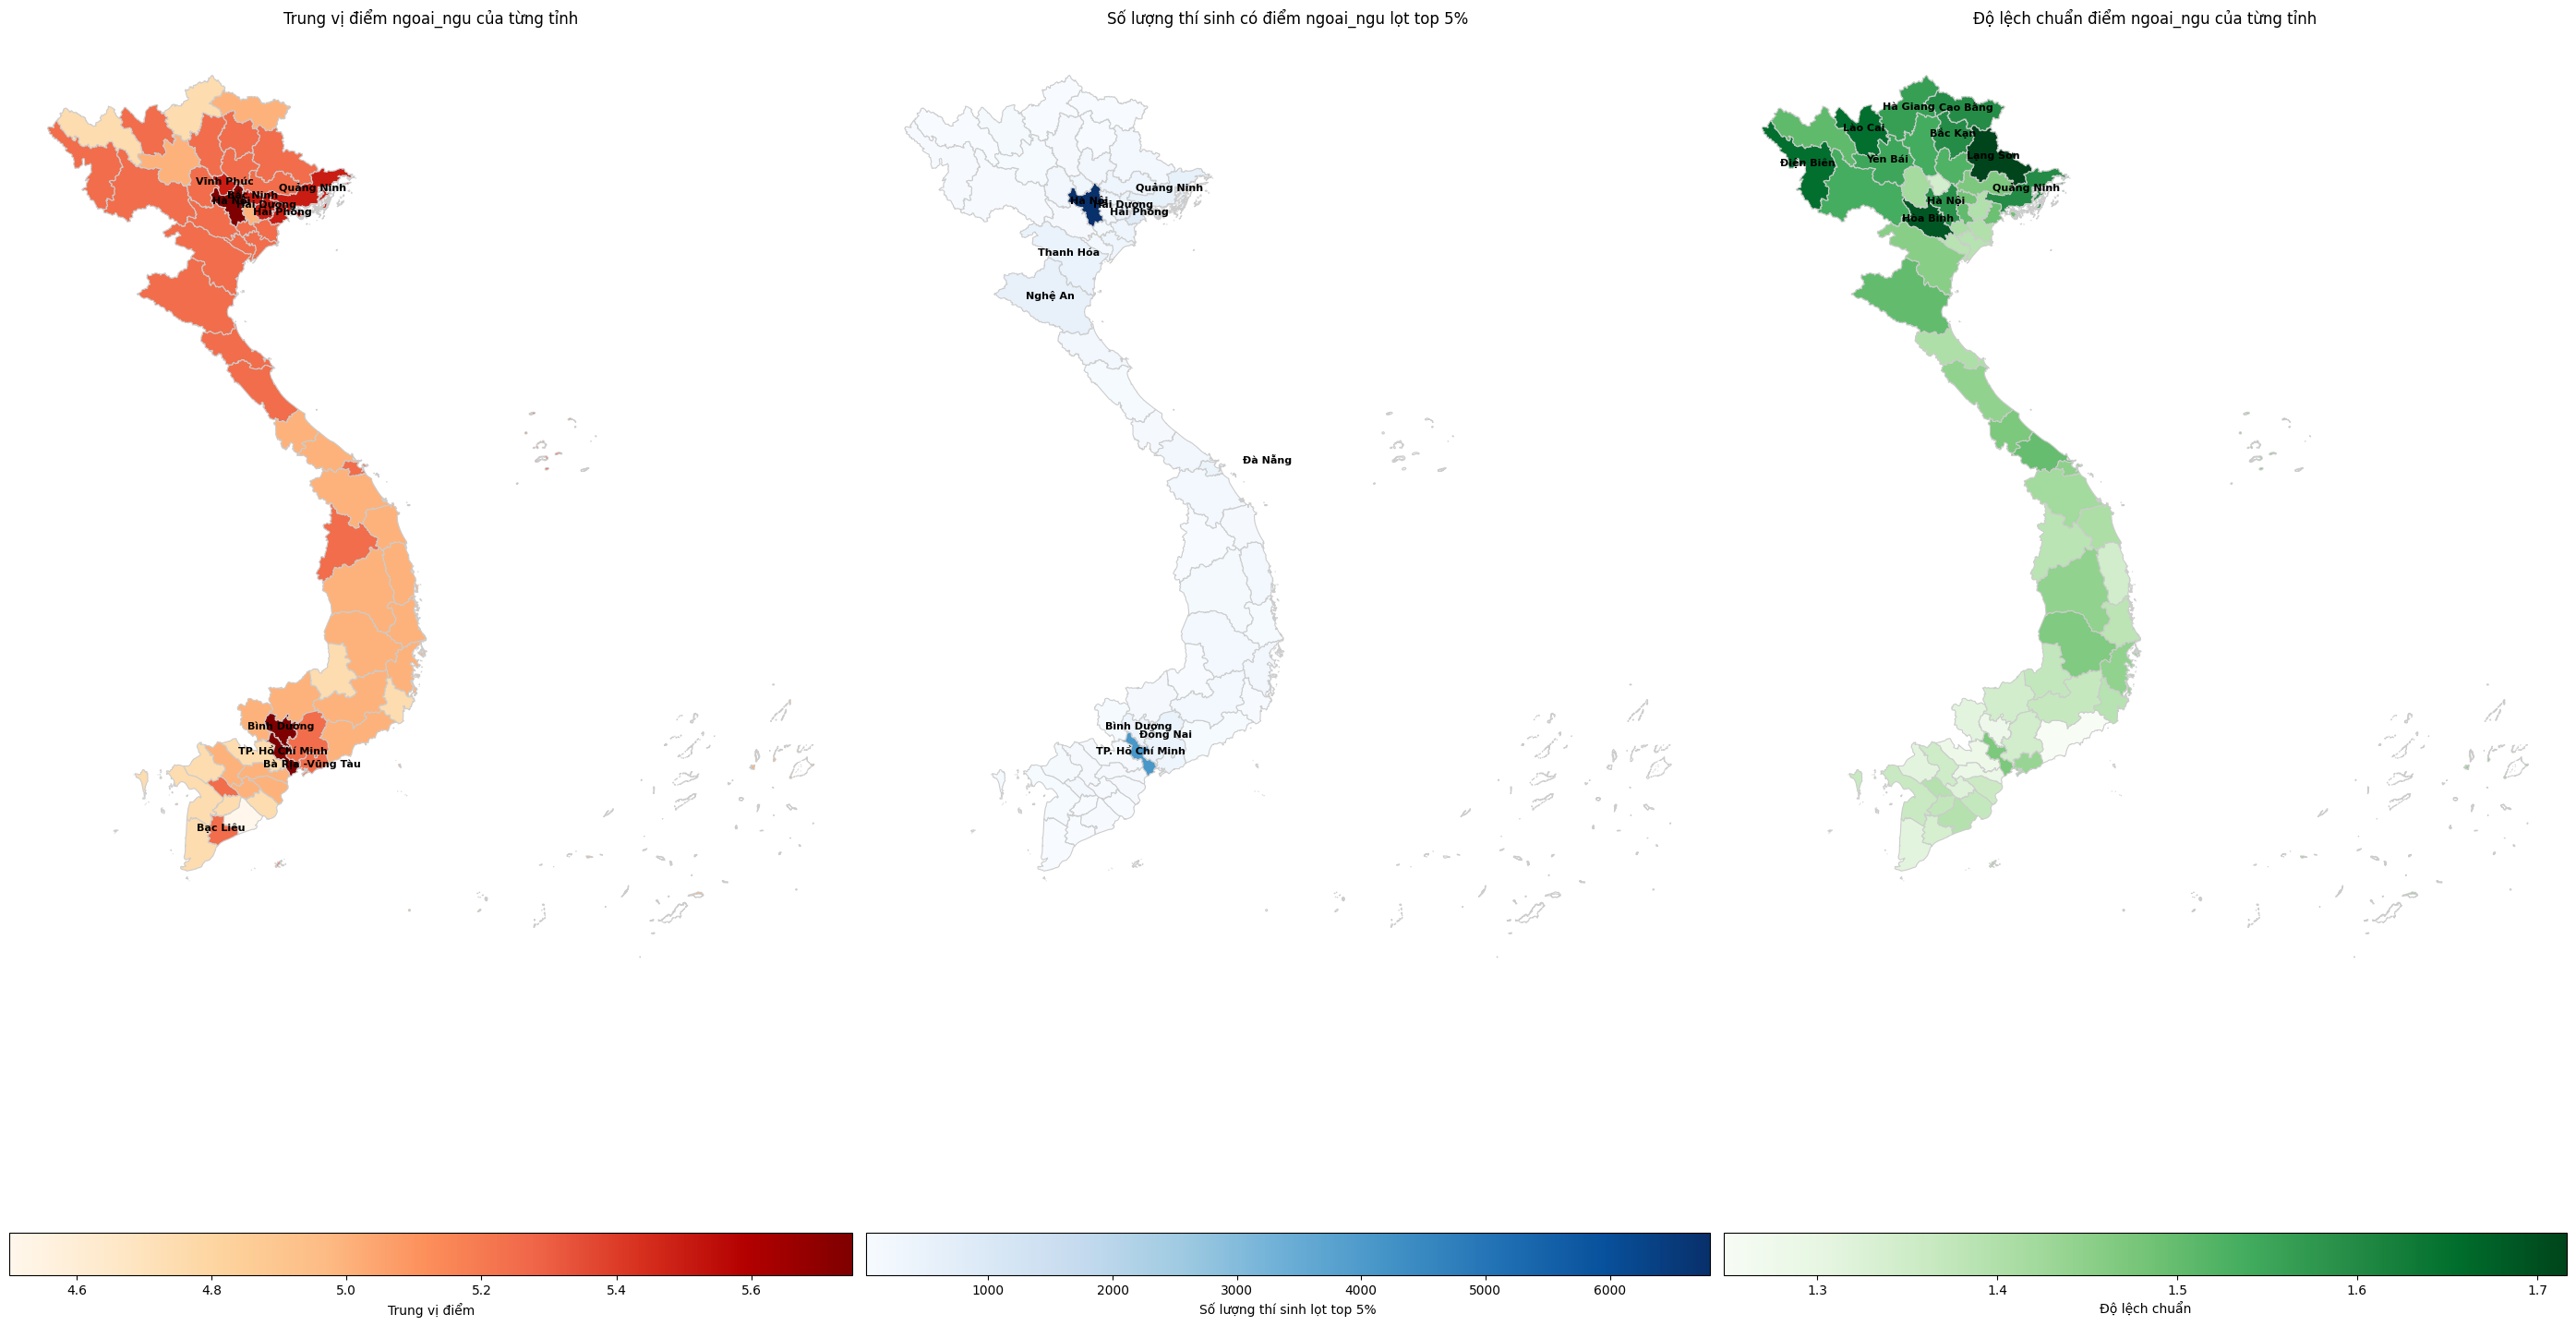

In [96]:
sub = 'ngoai_ngu'

# Lọc dữ liệu cho năm 2025
df = df_data_map_region[df_data_map_region['year'] == '2025']

# Tính toán trung bị điểm Toán của từng tỉnh
median_scores = df.groupby('province')[sub].median().reset_index()
median_scores.columns = ['province', f'median_{sub}']

# Tính toán số lượng thí sinh có điểm top 5%
high_scores_count = df[df[sub] >= df[sub].quantile(0.95)].groupby('province').size().reset_index(name=f'high_{sub}')

# Tính toán độ lệch chuẩn điểm Toán của từng tỉnh
std_dev_scores = df.groupby('province')[sub].std().reset_index()
std_dev_scores.columns = ['province', f'std_{sub}']

# Đọc dữ liệu Multipolygon của từng tỉnh
gdf = df_map_clean[['province', 'geometry']]

# Kết hợp dữ liệu trung vị điểm Toán, số lượng thí sinh có điểm toán top 5% và độ lệch chuẩn
gdf = gdf.merge(median_scores, on='province', how='left')
gdf = gdf.merge(high_scores_count, on='province', how='left')
gdf = gdf.merge(std_dev_scores, on='province', how='left')

# Lấy top 10 tỉnh có trung vị điểm Toán cao nhất
top_10_provinces_median = gdf.nlargest(10, f'median_{sub}')
top_10_provinces_high_scores = gdf.nlargest(10, f'high_{sub}')
top_10_provinces_std = gdf.nlargest(10, f'std_{sub}')

# Tạo figure với 3 subplot
fig, axes = plt.subplots(1, 3, figsize=(28, 17))
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

# Vẽ bản đồ trung bị điểm toán
gdf.plot(column=f'median_{sub}', ax=axes[0], legend=True, cmap='OrRd',
         legend_kwds={'label': f'Trung vị điểm', 'orientation': 'horizontal'},
         linewidth=0.8, edgecolor='0.8')
axes[0].set_title(f'Trung vị điểm {sub} của từng tỉnh')

# Vẽ nhãn cho top 10 tỉnh trung bị điểm Toán cao nhất
for idx, row in top_10_provinces_median.iterrows():
  axes[0].annotate(text=row['province'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment = 'center', fontsize=8, color='black', weight='bold')

# Vẽ bản đồ số lượng thí sinh có điểm Toán lọt top 5%
gdf.plot(column=f'high_{sub}', ax=axes[1], legend=True, cmap='Blues',
         legend_kwds={'label': f'Số lượng thí sinh lọt top 5%', 'orientation': 'horizontal'},
         linewidth=0.8, edgecolor='0.8')
axes[1].set_title(f'Số lượng thí sinh có điểm {sub} lọt top 5%')

# Vẽ nhãn cho top 10 tỉnh có số lượng thí sinh có điểm toán lọt top 5%
for idx, row in top_10_provinces_high_scores.iterrows():
  axes[1].annotate(text=row['province'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment = 'center', fontsize=8, color='black', weight='bold')

# Vẽ bản đồ độ lệch chuẩn của điểm Toán
gdf.plot(column=f'std_{sub}', ax=axes[2], legend=True, cmap='Greens',
         legend_kwds={'label': f'Độ lệch chuẩn', 'orientation': 'horizontal'},
         linewidth=0.8, edgecolor='0.8')
axes[2].set_title(f'Độ lệch chuẩn điểm {sub} của từng tỉnh')

# Vẽ nhãn cho top 10 tỉnh có độ lệch chuẩn điểm Toán cao nhất
for idx, row in top_10_provinces_std.iterrows():
  axes[2].annotate(text=row['province'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment = 'center', fontsize=8, color='black', weight='bold')

plt.tight_layout()
plt.show()

## **3.5 Area**

In [97]:
# Tạo bản sao để tránh warning
data_mien = df_data_map_region[df_data_map_region['year']=='2025'].copy()

# Gộp các region thành 3 miền
def group_to_main_region(r):
    if r in ['Đồng bằng sông Hồng', 'Trung du và miền núi phía Bắc']:
        return 'Miền Bắc'
    elif r in ['Bắc Trung Bộ', 'Duyên hải Nam Trung Bộ', 'Tây Nguyên']:
        return 'Miền Trung'
    elif r in ['Đông Nam Bộ', 'Đồng bằng sông Cửu Long']:
        return 'Miền Nam'
    else:
        return 'Khác'

data_mien['main_region'] = data_mien['region'].apply(group_to_main_region)

### **Group A**

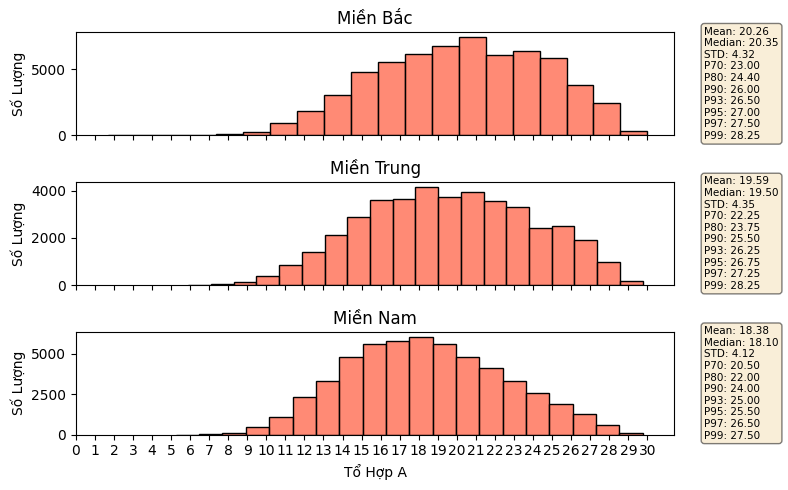

In [98]:
data = data_mien

sub = 'A'

# Gom miền Bắc – Trung – Nam theo thứ tự mong muốn
region_order = ['Miền Bắc', 'Miền Trung', 'Miền Nam']
score = list(range(0, 31, 1))

# Chỉ lấy các dòng thuộc 3 miền chính
data_filtered = data[data['main_region'].isin(region_order)]

# Tạo biểu đồ histogram cho từng miền
fig, axes = plt.subplots(3, 1, figsize=(8,5), sharex=True)

# Vẽ histogram cho từng miền
for i, region in enumerate(region_order):
    region_data = data_filtered[data_filtered['main_region'] == region][sub]
    sns.histplot(region_data, bins=20, kde=False, ax=axes[i], edgecolor='black', color='tomato')
    axes[i].set_title(f'{region}')
    axes[i].set_xlabel(f'Tổ Hợp {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    mean = region_data.mean()
    median = region_data.median()
    std_dev = region_data.std()
    # p25 = region_data.quantile(0.25)
    p70 = region_data.quantile(0.7)
    p80 = region_data.quantile(0.8)
    p90 = region_data.quantile(0.9)
    p93 = region_data.quantile(0.93)
    p95 = region_data.quantile(0.95)
    p97 = region_data.quantile(0.97)
    p99 = region_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

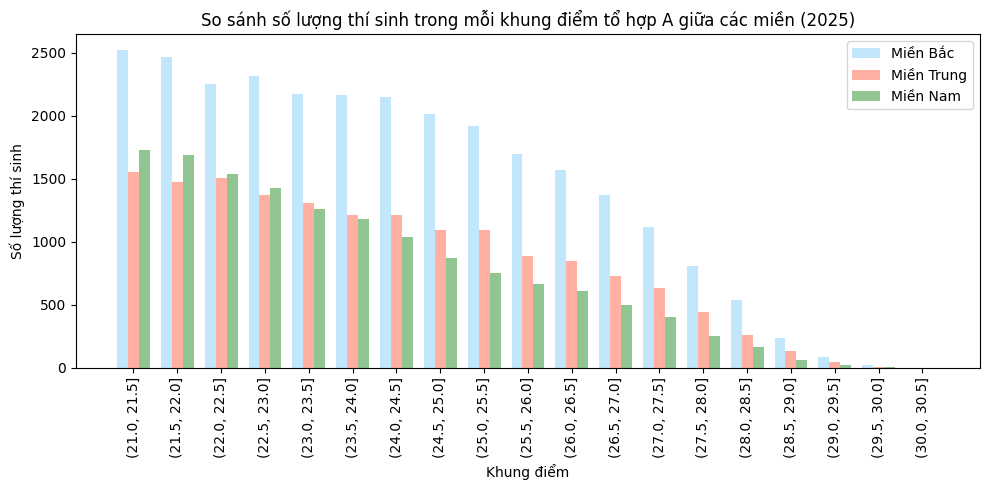

In [99]:
# Ước lượng
from scipy import stats

# Lựa chọn tổ hợp môn cần phân tích, VD: A
combo = 'A'

# Chia khung điểm từ 20 đến 30 điểm, mỗi khoảng 1 điểm
bins = np.arange(21, 31, 0.5)

# Tạo cột 'bins' theo khung điểm
data['bins'] = pd.cut(data[combo], bins)

# Lọc từng miền
mien_bac = data[data['main_region'] == 'Miền Bắc']
mien_trung = data[data['main_region'] == 'Miền Trung']
mien_nam = data[data['main_region'] == 'Miền Nam']

# Đếm số lượng theo từng khung điểm
count_bac = mien_bac['bins'].value_counts().sort_index()
count_trung = mien_trung['bins'].value_counts().sort_index()
count_nam = mien_nam['bins'].value_counts().sort_index()

# Vẽ biểu đồ bar
plt.figure(figsize=(10, 5))

bar_width = 0.25
x = np.arange(len(count_bac))

plt.bar(x, count_bac.values, width=bar_width, label='Miền Bắc', color='lightskyblue', alpha=0.5)
plt.bar(x + bar_width, count_trung.values, width=bar_width, label='Miền Trung', color='tomato', alpha=0.5)
plt.bar(x + 2*bar_width, count_nam.values, width=bar_width, label='Miền Nam', color='forestgreen', alpha=0.5)

# Gán nhãn trục x
plt.xticks(x + bar_width, count_bac.index.astype(str), rotation='vertical')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng thí sinh')
plt.title(f'So sánh số lượng thí sinh trong mỗi khung điểm tổ hợp {combo} giữa các miền (2025)')
plt.legend()
plt.tight_layout()
plt.show()

### **Group A1**

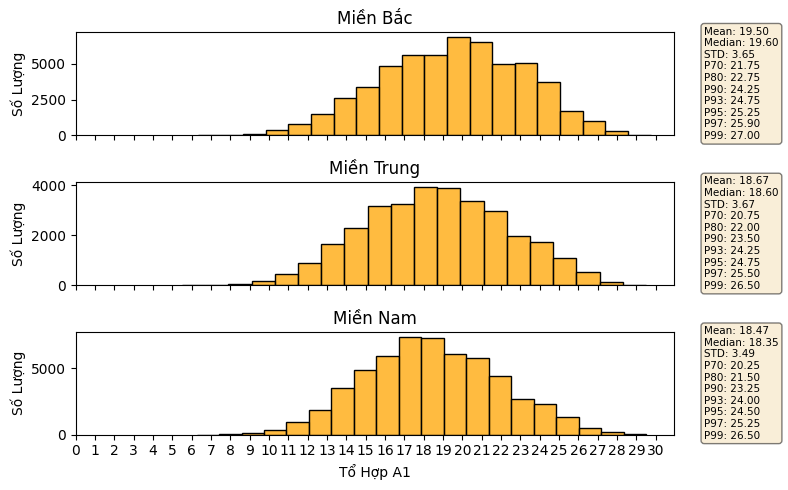

In [100]:
data = data_mien

sub = 'A1'

# Gom miền Bắc – Trung – Nam theo thứ tự mong muốn
region_order = ['Miền Bắc', 'Miền Trung', 'Miền Nam']
score = list(range(0, 31, 1))

# Chỉ lấy các dòng thuộc 3 miền chính
data_filtered = data[data['main_region'].isin(region_order)]

# Tạo biểu đồ histogram cho từng miền
fig, axes = plt.subplots(3, 1, figsize=(8,5), sharex=True)

# Vẽ histogram cho từng miền
for i, region in enumerate(region_order):
    region_data = data_filtered[data_filtered['main_region'] == region][sub]
    sns.histplot(region_data, bins=20, kde=False, ax=axes[i], edgecolor='black', color='orange')
    axes[i].set_title(f'{region}')
    axes[i].set_xlabel(f'Tổ Hợp {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    mean = region_data.mean()
    median = region_data.median()
    std_dev = region_data.std()
    # p25 = region_data.quantile(0.25)
    p70 = region_data.quantile(0.7)
    p80 = region_data.quantile(0.8)
    p90 = region_data.quantile(0.9)
    p93 = region_data.quantile(0.93)
    p95 = region_data.quantile(0.95)
    p97 = region_data.quantile(0.97)
    p99 = region_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

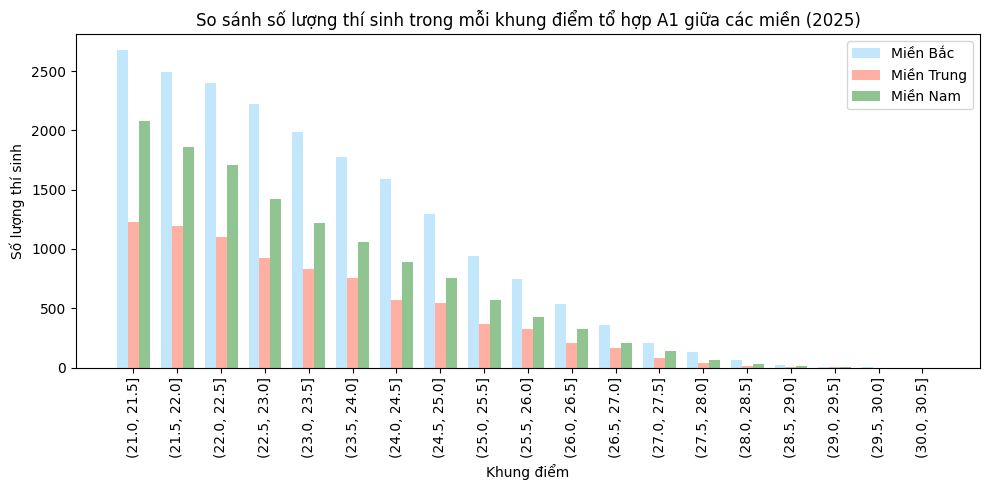

In [101]:
# Ước lượng
from scipy import stats

# Lựa chọn tổ hợp môn cần phân tích, VD: A
combo = 'A1'

# Chia khung điểm từ 20 đến 30 điểm, mỗi khoảng 1 điểm
bins = np.arange(21, 31, 0.5)

# Tạo cột 'bins' theo khung điểm
data['bins'] = pd.cut(data[combo], bins)

# Lọc từng miền
mien_bac = data[data['main_region'] == 'Miền Bắc']
mien_trung = data[data['main_region'] == 'Miền Trung']
mien_nam = data[data['main_region'] == 'Miền Nam']

# Đếm số lượng theo từng khung điểm
count_bac = mien_bac['bins'].value_counts().sort_index()
count_trung = mien_trung['bins'].value_counts().sort_index()
count_nam = mien_nam['bins'].value_counts().sort_index()

# Vẽ biểu đồ bar
plt.figure(figsize=(10, 5))

bar_width = 0.25
x = np.arange(len(count_bac))

plt.bar(x, count_bac.values, width=bar_width, label='Miền Bắc', color='lightskyblue', alpha=0.5)
plt.bar(x + bar_width, count_trung.values, width=bar_width, label='Miền Trung', color='tomato', alpha=0.5)
plt.bar(x + 2*bar_width, count_nam.values, width=bar_width, label='Miền Nam', color='forestgreen', alpha=0.5)

# Gán nhãn trục x
plt.xticks(x + bar_width, count_bac.index.astype(str), rotation='vertical')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng thí sinh')
plt.title(f'So sánh số lượng thí sinh trong mỗi khung điểm tổ hợp {combo} giữa các miền (2025)')
plt.legend()
plt.tight_layout()
plt.show()

### **Group B**

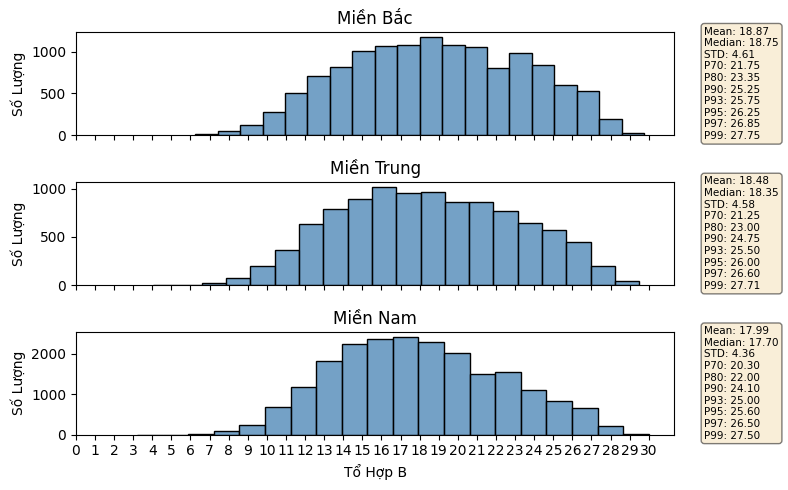

In [102]:
data = data_mien

sub = 'B'

# Gom miền Bắc – Trung – Nam theo thứ tự mong muốn
region_order = ['Miền Bắc', 'Miền Trung', 'Miền Nam']
score = list(range(0, 31, 1))

# Chỉ lấy các dòng thuộc 3 miền chính
data_filtered = data[data['main_region'].isin(region_order)]

# Tạo biểu đồ histogram cho từng miền
fig, axes = plt.subplots(3, 1, figsize=(8,5), sharex=True)

# Vẽ histogram cho từng miền
for i, region in enumerate(region_order):
    region_data = data_filtered[data_filtered['main_region'] == region][sub]
    sns.histplot(region_data, bins=20, kde=False, ax=axes[i], edgecolor='black', color='steelblue')
    axes[i].set_title(f'{region}')
    axes[i].set_xlabel(f'Tổ Hợp {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    mean = region_data.mean()
    median = region_data.median()
    std_dev = region_data.std()
    # p25 = region_data.quantile(0.25)
    p70 = region_data.quantile(0.7)
    p80 = region_data.quantile(0.8)
    p90 = region_data.quantile(0.9)
    p93 = region_data.quantile(0.93)
    p95 = region_data.quantile(0.95)
    p97 = region_data.quantile(0.97)
    p99 = region_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

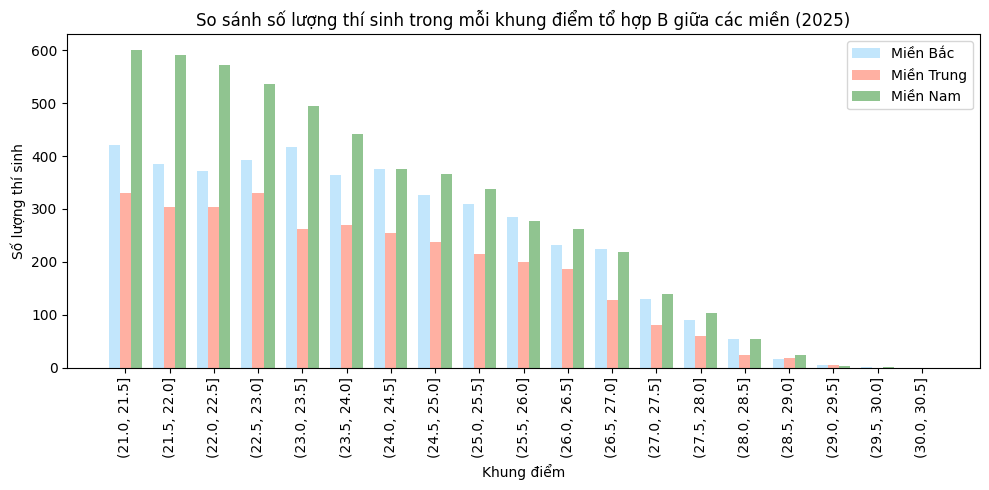

In [103]:
# Ước lượng
from scipy import stats

# Lựa chọn tổ hợp môn cần phân tích, VD: A
combo = 'B'

# Chia khung điểm từ 20 đến 30 điểm, mỗi khoảng 1 điểm
bins = np.arange(21, 31, 0.5)

# Tạo cột 'bins' theo khung điểm
data['bins'] = pd.cut(data[combo], bins)

# Lọc từng miền
mien_bac = data[data['main_region'] == 'Miền Bắc']
mien_trung = data[data['main_region'] == 'Miền Trung']
mien_nam = data[data['main_region'] == 'Miền Nam']

# Đếm số lượng theo từng khung điểm
count_bac = mien_bac['bins'].value_counts().sort_index()
count_trung = mien_trung['bins'].value_counts().sort_index()
count_nam = mien_nam['bins'].value_counts().sort_index()

# Vẽ biểu đồ bar
plt.figure(figsize=(10, 5))

bar_width = 0.25
x = np.arange(len(count_bac))

plt.bar(x, count_bac.values, width=bar_width, label='Miền Bắc', color='lightskyblue', alpha=0.5)
plt.bar(x + bar_width, count_trung.values, width=bar_width, label='Miền Trung', color='tomato', alpha=0.5)
plt.bar(x + 2*bar_width, count_nam.values, width=bar_width, label='Miền Nam', color='forestgreen', alpha=0.5)

# Gán nhãn trục x
plt.xticks(x + bar_width, count_bac.index.astype(str), rotation='vertical')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng thí sinh')
plt.title(f'So sánh số lượng thí sinh trong mỗi khung điểm tổ hợp {combo} giữa các miền (2025)')
plt.legend()
plt.tight_layout()
plt.show()

### **Group C**

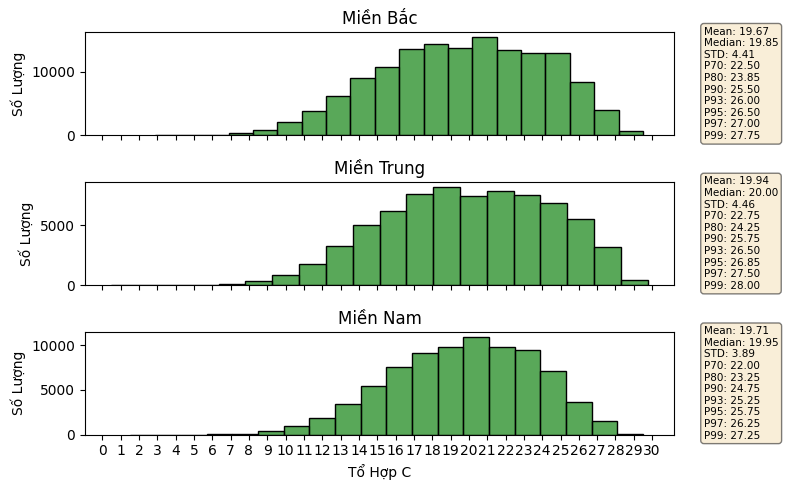

In [112]:
data = data_mien

sub = 'C'

# Gom miền Bắc – Trung – Nam theo thứ tự mong muốn
region_order = ['Miền Bắc', 'Miền Trung', 'Miền Nam']
score = list(range(0, 31, 1))

# Chỉ lấy các dòng thuộc 3 miền chính
data_filtered = data[data['main_region'].isin(region_order)]

# Tạo biểu đồ histogram cho từng miền
fig, axes = plt.subplots(3, 1, figsize=(8,5), sharex=True)

# Vẽ histogram cho từng miền
for i, region in enumerate(region_order):
    region_data = data_filtered[data_filtered['main_region'] == region][sub]
    sns.histplot(region_data, bins=20, kde=False, ax=axes[i], edgecolor='black', color='forestgreen')
    axes[i].set_title(f'{region}')
    axes[i].set_xlabel(f'Tổ Hợp {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    mean = region_data.mean()
    median = region_data.median()
    std_dev = region_data.std()
    # p25 = region_data.quantile(0.25)
    p70 = region_data.quantile(0.7)
    p80 = region_data.quantile(0.8)
    p90 = region_data.quantile(0.9)
    p93 = region_data.quantile(0.93)
    p95 = region_data.quantile(0.95)
    p97 = region_data.quantile(0.97)
    p99 = region_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

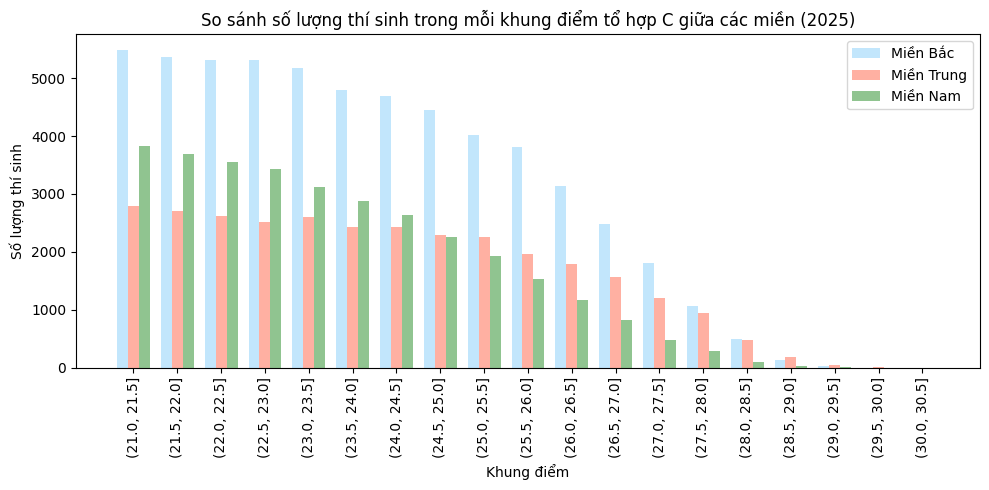

In [105]:
# Ước lượng
from scipy import stats

# Lựa chọn tổ hợp môn cần phân tích, VD: A
combo = 'C'

# Chia khung điểm từ 20 đến 30 điểm, mỗi khoảng 1 điểm
bins = np.arange(21, 31, 0.5)

# Tạo cột 'bins' theo khung điểm
data['bins'] = pd.cut(data[combo], bins)

# Lọc từng miền
mien_bac = data[data['main_region'] == 'Miền Bắc']
mien_trung = data[data['main_region'] == 'Miền Trung']
mien_nam = data[data['main_region'] == 'Miền Nam']

# Đếm số lượng theo từng khung điểm
count_bac = mien_bac['bins'].value_counts().sort_index()
count_trung = mien_trung['bins'].value_counts().sort_index()
count_nam = mien_nam['bins'].value_counts().sort_index()

# Vẽ biểu đồ bar
plt.figure(figsize=(10, 5))

bar_width = 0.25
x = np.arange(len(count_bac))

plt.bar(x, count_bac.values, width=bar_width, label='Miền Bắc', color='lightskyblue', alpha=0.5)
plt.bar(x + bar_width, count_trung.values, width=bar_width, label='Miền Trung', color='tomato', alpha=0.5)
plt.bar(x + 2*bar_width, count_nam.values, width=bar_width, label='Miền Nam', color='forestgreen', alpha=0.5)

# Gán nhãn trục x
plt.xticks(x + bar_width, count_bac.index.astype(str), rotation='vertical')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng thí sinh')
plt.title(f'So sánh số lượng thí sinh trong mỗi khung điểm tổ hợp {combo} giữa các miền (2025)')
plt.legend()
plt.tight_layout()
plt.show()

### **Group C1**

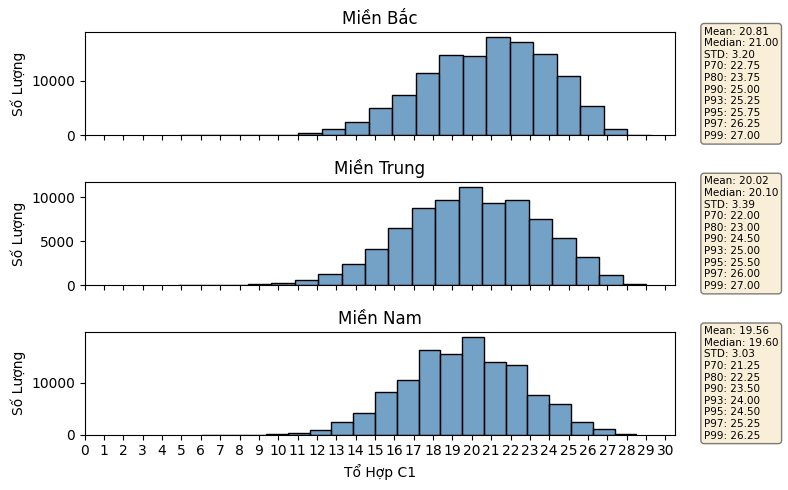

In [110]:
data = data_mien

sub = 'C1'

# Gom miền Bắc – Trung – Nam theo thứ tự mong muốn
region_order = ['Miền Bắc', 'Miền Trung', 'Miền Nam']
score = list(range(0, 31, 1))

# Chỉ lấy các dòng thuộc 3 miền chính
data_filtered = data[data['main_region'].isin(region_order)]

# Tạo biểu đồ histogram cho từng miền
fig, axes = plt.subplots(3, 1, figsize=(8,5), sharex=True)

# Vẽ histogram cho từng miền
for i, region in enumerate(region_order):
    region_data = data_filtered[data_filtered['main_region'] == region][sub]
    sns.histplot(region_data, bins=20, kde=False, ax=axes[i], edgecolor='black', color='steelblue')
    axes[i].set_title(f'{region}')
    axes[i].set_xlabel(f'Tổ Hợp {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    mean = region_data.mean()
    median = region_data.median()
    std_dev = region_data.std()
    # p25 = region_data.quantile(0.25)
    p70 = region_data.quantile(0.7)
    p80 = region_data.quantile(0.8)
    p90 = region_data.quantile(0.9)
    p93 = region_data.quantile(0.93)
    p95 = region_data.quantile(0.95)
    p97 = region_data.quantile(0.97)
    p99 = region_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

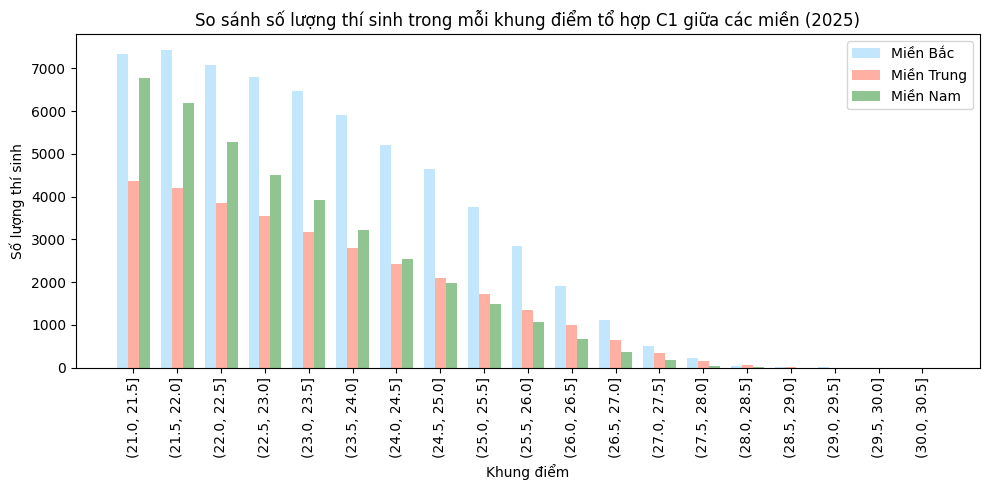

In [111]:
# Ước lượng
from scipy import stats

# Lựa chọn tổ hợp môn cần phân tích, VD: A
combo = 'C1'

# Chia khung điểm từ 20 đến 30 điểm, mỗi khoảng 1 điểm
bins = np.arange(21, 31, 0.5)

# Tạo cột 'bins' theo khung điểm
data['bins'] = pd.cut(data[combo], bins)

# Lọc từng miền
mien_bac = data[data['main_region'] == 'Miền Bắc']
mien_trung = data[data['main_region'] == 'Miền Trung']
mien_nam = data[data['main_region'] == 'Miền Nam']

# Đếm số lượng theo từng khung điểm
count_bac = mien_bac['bins'].value_counts().sort_index()
count_trung = mien_trung['bins'].value_counts().sort_index()
count_nam = mien_nam['bins'].value_counts().sort_index()

# Vẽ biểu đồ bar
plt.figure(figsize=(10, 5))

bar_width = 0.25
x = np.arange(len(count_bac))

plt.bar(x, count_bac.values, width=bar_width, label='Miền Bắc', color='lightskyblue', alpha=0.5)
plt.bar(x + bar_width, count_trung.values, width=bar_width, label='Miền Trung', color='tomato', alpha=0.5)
plt.bar(x + 2*bar_width, count_nam.values, width=bar_width, label='Miền Nam', color='forestgreen', alpha=0.5)

# Gán nhãn trục x
plt.xticks(x + bar_width, count_bac.index.astype(str), rotation='vertical')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng thí sinh')
plt.title(f'So sánh số lượng thí sinh trong mỗi khung điểm tổ hợp {combo} giữa các miền (2025)')
plt.legend()
plt.tight_layout()
plt.show()

### **Group D**

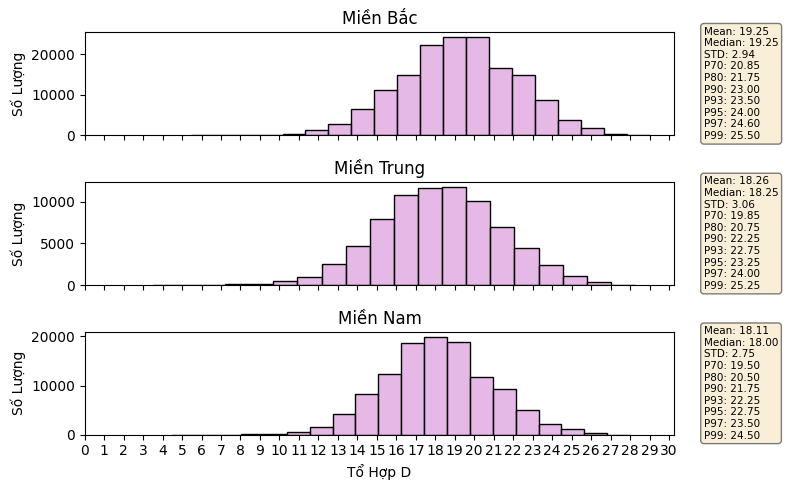

In [113]:
data = data_mien

sub = 'D'

# Gom miền Bắc – Trung – Nam theo thứ tự mong muốn
region_order = ['Miền Bắc', 'Miền Trung', 'Miền Nam']
score = list(range(0, 31, 1))

# Chỉ lấy các dòng thuộc 3 miền chính
data_filtered = data[data['main_region'].isin(region_order)]

# Tạo biểu đồ histogram cho từng miền
fig, axes = plt.subplots(3, 1, figsize=(8,5), sharex=True)

# Vẽ histogram cho từng miền
for i, region in enumerate(region_order):
    region_data = data_filtered[data_filtered['main_region'] == region][sub]
    sns.histplot(region_data, bins=20, kde=False, ax=axes[i], edgecolor='black', color='plum')
    axes[i].set_title(f'{region}')
    axes[i].set_xlabel(f'Tổ Hợp {sub}')
    axes[i].set_ylabel('Số Lượng')

    # Tính toán các thông tin thống kê
    mean = region_data.mean()
    median = region_data.median()
    std_dev = region_data.std()
    # p25 = region_data.quantile(0.25)
    p70 = region_data.quantile(0.7)
    p80 = region_data.quantile(0.8)
    p90 = region_data.quantile(0.9)
    p93 = region_data.quantile(0.93)
    p95 = region_data.quantile(0.95)
    p97 = region_data.quantile(0.97)
    p99 = region_data.quantile(0.99)

    # Hiển thị thông tin thống kê trên biểu đồ
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
               f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

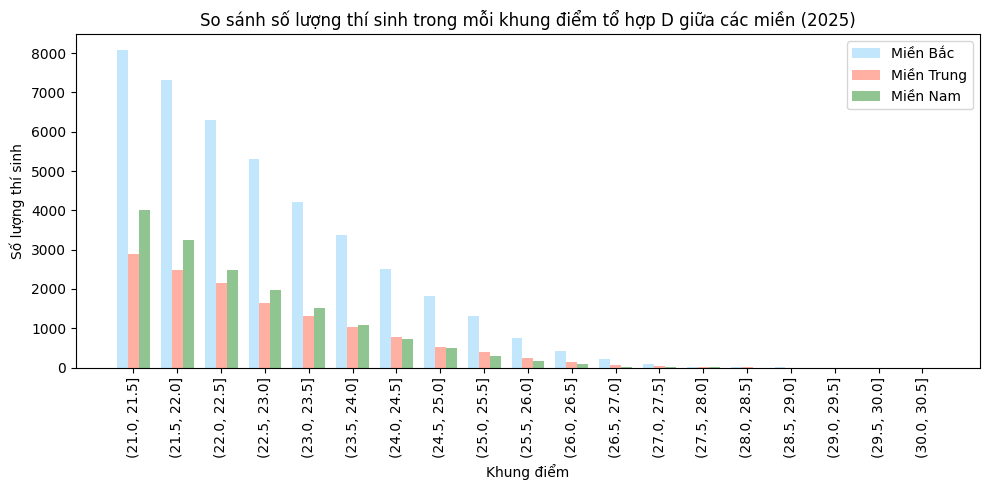

In [109]:
# Ước lượng
from scipy import stats

# Lựa chọn tổ hợp môn cần phân tích, VD: A
combo = 'D'

# Chia khung điểm từ 20 đến 30 điểm, mỗi khoảng 1 điểm
bins = np.arange(21, 31, 0.5)

# Tạo cột 'bins' theo khung điểm
data['bins'] = pd.cut(data[combo], bins)

# Lọc từng miền
mien_bac = data[data['main_region'] == 'Miền Bắc']
mien_trung = data[data['main_region'] == 'Miền Trung']
mien_nam = data[data['main_region'] == 'Miền Nam']

# Đếm số lượng theo từng khung điểm
count_bac = mien_bac['bins'].value_counts().sort_index()
count_trung = mien_trung['bins'].value_counts().sort_index()
count_nam = mien_nam['bins'].value_counts().sort_index()

# Vẽ biểu đồ bar
plt.figure(figsize=(10, 5))

bar_width = 0.25
x = np.arange(len(count_bac))

plt.bar(x, count_bac.values, width=bar_width, label='Miền Bắc', color='lightskyblue', alpha=0.5)
plt.bar(x + bar_width, count_trung.values, width=bar_width, label='Miền Trung', color='tomato', alpha=0.5)
plt.bar(x + 2*bar_width, count_nam.values, width=bar_width, label='Miền Nam', color='forestgreen', alpha=0.5)

# Gán nhãn trục x
plt.xticks(x + bar_width, count_bac.index.astype(str), rotation='vertical')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng thí sinh')
plt.title(f'So sánh số lượng thí sinh trong mỗi khung điểm tổ hợp {combo} giữa các miền (2025)')
plt.legend()
plt.tight_layout()
plt.show()